In [1]:
import numpy as np
import matplotlib.pyplot as pl
from matplotlib.pyplot import figure
import json
from sklearn.utils import class_weight
from keras import Sequential
from keras.models import Model
from tensorflow.keras.layers import (
    BatchNormalization, Activation, SpatialDropout2D, GlobalAveragePooling2D,
    Dense, Dropout, Flatten,
    Conv2D, MaxPooling2D, SeparableConv2D
)
# Import project utils scripts
import os
import sys

src_path = os.path.abspath(os.path.join('../src/'))

if src_path not in sys.path:
    sys.path.append(src_path)

from statisticsUtils import recall_precision_fscore_from_confusion_matrix
from labelsUtils import Label
from regionUtils import vietnam_labels_coordinates
from rasterUtils import make_dataset_from_raster_files
from bandUtils import Band
from convNetUtils import cross_validation_with_metrics_evolution
from visualizationUtils import plot_confusion_matrix

/home/simon/miniconda3/envs/tb/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  warnings.warn(


In [3]:
TRAIN_TEST_RATIO = 0.8
DATA_ROOT_PATH ='../data/'
LABELS_COORDINATES = vietnam_labels_coordinates()

In [4]:
labels = [
    Label.COFFEE,
    Label.NATIVEVEGE,
    Label.URBAN,
    Label.WATER,
    Label.PEPPER,
    Label.TEA,
]

In [5]:
NB_PIXEL_AROUND=4

dataset_args = dict(
    labels = labels,
    raster_paths = [DATA_ROOT_PATH + 'Vietnam_2017_january_february/merged.tif'],
    labels_coordinates_list = [LABELS_COORDINATES],
    nb_pixel_around = NB_PIXEL_AROUND
)

dataset = make_dataset_from_raster_files(**dataset_args)

In [6]:
BANDS = [
    Band.NIR.value,
    Band.RED.value,
    Band.SWIR1.value
]

NB_TESTS = 1
EPOCHS = 5000
EPOCHS_PER_METRICS=500

In [7]:
# images have all the same shapes, take the shape of the first image
image_width = len(dataset[0][1][0][0])
image_height = len(dataset[0][1][0])
image_depth = len(BANDS)
nb_outputs = len(labels)

# Create model
model = Sequential([
    Rescaling(1./2**16, input_shape=(image_width, image_height, image_depth)),
    Conv2D(filters=16, kernel_size=(3, 3), padding="same", activation="relu"),
    Conv2D(filters=16, kernel_size=(3, 3), padding="same", activation="relu"),
    MaxPooling2D(pool_size=(3, 3)),
    Conv2D(filters=16, kernel_size=(2, 2), padding="same", activation="relu"),
    Conv2D(filters=16, kernel_size=(2, 2), padding="same", activation="relu"),
    Flatten(name='flat'),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(nb_outputs, activation='softmax'),
])
    
mean_losses, mean_accuracies, histories, conf_matrices = cross_validation_with_metrics_evolution(model, dataset, BANDS, labels, EPOCHS, EPOCHS_PER_METRICS, NB_TESTS)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 9, 9, 3)           0         
_________________________________________________________________
conv2d (Conv2D)              (None, 9, 9, 16)          448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 9, 9, 16)          2320      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 3, 3, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 16)          1040      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 16)          1040      
_________________________________________________________________
flat (Flatten)               (None, 144)               0

Epoch 47/500
57/57 [==============================] - 0s 8ms/step - loss: 0.9525 - accuracy: 0.5155 - val_loss: 1.0440 - val_accuracy: 0.5577
Epoch 48/500
57/57 [==============================] - 0s 8ms/step - loss: 0.9146 - accuracy: 0.5371 - val_loss: 1.0880 - val_accuracy: 0.5045
Epoch 49/500
57/57 [==============================] - 0s 8ms/step - loss: 1.0170 - accuracy: 0.4981 - val_loss: 1.0574 - val_accuracy: 0.5886
Epoch 50/500
57/57 [==============================] - 0s 8ms/step - loss: 0.9183 - accuracy: 0.5302 - val_loss: 1.0939 - val_accuracy: 0.4963
Epoch 51/500
57/57 [==============================] - 0s 8ms/step - loss: 0.9851 - accuracy: 0.5110 - val_loss: 1.0891 - val_accuracy: 0.5417
Epoch 52/500
57/57 [==============================] - 0s 8ms/step - loss: 0.9497 - accuracy: 0.5381 - val_loss: 1.0942 - val_accuracy: 0.5387
Epoch 53/500
57/57 [==============================] - 0s 8ms/step - loss: 1.0120 - accuracy: 0.5147 - val_loss: 1.0658 - val_accuracy: 0.5660
Epoch 

57/57 [==============================] - 0s 8ms/step - loss: 0.7969 - accuracy: 0.6284 - val_loss: 0.9381 - val_accuracy: 0.6188
Epoch 162/500
57/57 [==============================] - 0s 8ms/step - loss: 0.8234 - accuracy: 0.6136 - val_loss: 0.9708 - val_accuracy: 0.6145
Epoch 163/500
57/57 [==============================] - 0s 8ms/step - loss: 0.7541 - accuracy: 0.6231 - val_loss: 1.0310 - val_accuracy: 0.5513
Epoch 164/500
57/57 [==============================] - 0s 8ms/step - loss: 0.7880 - accuracy: 0.5734 - val_loss: 1.0322 - val_accuracy: 0.5836
Epoch 165/500
57/57 [==============================] - 0s 8ms/step - loss: 0.9276 - accuracy: 0.5621 - val_loss: 0.9651 - val_accuracy: 0.6095
Epoch 166/500
57/57 [==============================] - 0s 8ms/step - loss: 0.8340 - accuracy: 0.5948 - val_loss: 1.0673 - val_accuracy: 0.5600
Epoch 167/500
57/57 [==============================] - 0s 8ms/step - loss: 0.7887 - accuracy: 0.6073 - val_loss: 0.9374 - val_accuracy: 0.6269
Epoch 168/500

57/57 [==============================] - 0s 8ms/step - loss: 0.7118 - accuracy: 0.6370 - val_loss: 0.9786 - val_accuracy: 0.5877
Epoch 276/500
57/57 [==============================] - 0s 8ms/step - loss: 0.7454 - accuracy: 0.5913 - val_loss: 1.0255 - val_accuracy: 0.6002
Epoch 277/500
57/57 [==============================] - 0s 8ms/step - loss: 0.7182 - accuracy: 0.6144 - val_loss: 0.9878 - val_accuracy: 0.5908
Epoch 278/500
57/57 [==============================] - 0s 8ms/step - loss: 0.6841 - accuracy: 0.6269 - val_loss: 0.9746 - val_accuracy: 0.6037
Epoch 279/500
57/57 [==============================] - 0s 8ms/step - loss: 0.7167 - accuracy: 0.6352 - val_loss: 0.9847 - val_accuracy: 0.5931
Epoch 280/500
57/57 [==============================] - 0s 8ms/step - loss: 0.7363 - accuracy: 0.6045 - val_loss: 0.9597 - val_accuracy: 0.6129
Epoch 281/500
57/57 [==============================] - 0s 8ms/step - loss: 0.7805 - accuracy: 0.6070 - val_loss: 1.0349 - val_accuracy: 0.5846
Epoch 282/500

57/57 [==============================] - 0s 8ms/step - loss: 0.6987 - accuracy: 0.6308 - val_loss: 0.9753 - val_accuracy: 0.6135
Epoch 390/500
57/57 [==============================] - 0s 8ms/step - loss: 0.6394 - accuracy: 0.6439 - val_loss: 0.9963 - val_accuracy: 0.6003
Epoch 391/500
57/57 [==============================] - 0s 8ms/step - loss: 0.6516 - accuracy: 0.6535 - val_loss: 0.9699 - val_accuracy: 0.6030
Epoch 392/500
57/57 [==============================] - 0s 8ms/step - loss: 0.6815 - accuracy: 0.6504 - val_loss: 0.9343 - val_accuracy: 0.6298
Epoch 393/500
57/57 [==============================] - 0s 8ms/step - loss: 0.6589 - accuracy: 0.6638 - val_loss: 0.9761 - val_accuracy: 0.6150
Epoch 394/500
57/57 [==============================] - 0s 8ms/step - loss: 0.6789 - accuracy: 0.6499 - val_loss: 0.9088 - val_accuracy: 0.6448
Epoch 395/500
57/57 [==============================] - 0s 8ms/step - loss: 0.6514 - accuracy: 0.6534 - val_loss: 0.9400 - val_accuracy: 0.6421
Epoch 396/500

57/57 [==============================] - 0s 8ms/step - loss: 0.6456 - accuracy: 0.6647 - val_loss: 0.9342 - val_accuracy: 0.6365
Epoch 4/500
57/57 [==============================] - 0s 8ms/step - loss: 0.6073 - accuracy: 0.6744 - val_loss: 0.9160 - val_accuracy: 0.6469
Epoch 5/500
57/57 [==============================] - 0s 8ms/step - loss: 0.5935 - accuracy: 0.6815 - val_loss: 0.9671 - val_accuracy: 0.6369
Epoch 6/500
57/57 [==============================] - 0s 8ms/step - loss: 0.6249 - accuracy: 0.6603 - val_loss: 1.0305 - val_accuracy: 0.6169
Epoch 7/500
57/57 [==============================] - 0s 8ms/step - loss: 0.6104 - accuracy: 0.6766 - val_loss: 0.8694 - val_accuracy: 0.6707
Epoch 8/500
57/57 [==============================] - 0s 8ms/step - loss: 0.5927 - accuracy: 0.6891 - val_loss: 0.9881 - val_accuracy: 0.6118
Epoch 9/500
57/57 [==============================] - 0s 8ms/step - loss: 0.5650 - accuracy: 0.6826 - val_loss: 0.9988 - val_accuracy: 0.6121
Epoch 10/500
57/57 [=====

Epoch 61/500
57/57 [==============================] - 0s 8ms/step - loss: 0.5487 - accuracy: 0.7027 - val_loss: 0.9652 - val_accuracy: 0.6587
Epoch 62/500
57/57 [==============================] - 0s 8ms/step - loss: 0.5895 - accuracy: 0.6744 - val_loss: 0.9260 - val_accuracy: 0.6489
Epoch 63/500
57/57 [==============================] - 0s 8ms/step - loss: 0.5848 - accuracy: 0.6896 - val_loss: 0.9417 - val_accuracy: 0.6402
Epoch 64/500
57/57 [==============================] - 0s 8ms/step - loss: 0.5767 - accuracy: 0.6728 - val_loss: 0.9495 - val_accuracy: 0.6410
Epoch 65/500
57/57 [==============================] - 0s 8ms/step - loss: 0.5812 - accuracy: 0.6864 - val_loss: 0.9423 - val_accuracy: 0.6394
Epoch 66/500
57/57 [==============================] - 0s 8ms/step - loss: 0.5573 - accuracy: 0.7065 - val_loss: 0.9502 - val_accuracy: 0.6485
Epoch 67/500
57/57 [==============================] - 0s 8ms/step - loss: 0.5624 - accuracy: 0.6886 - val_loss: 0.9567 - val_accuracy: 0.6326
Epoch 

57/57 [==============================] - 0s 8ms/step - loss: 0.5845 - accuracy: 0.6744 - val_loss: 1.0400 - val_accuracy: 0.6231
Epoch 176/500
57/57 [==============================] - 0s 8ms/step - loss: 0.5346 - accuracy: 0.6858 - val_loss: 0.9753 - val_accuracy: 0.6642
Epoch 177/500
57/57 [==============================] - 0s 8ms/step - loss: 0.5652 - accuracy: 0.7151 - val_loss: 0.9682 - val_accuracy: 0.6378
Epoch 178/500
57/57 [==============================] - 0s 8ms/step - loss: 0.5905 - accuracy: 0.6772 - val_loss: 0.8989 - val_accuracy: 0.6694
Epoch 179/500
57/57 [==============================] - 0s 8ms/step - loss: 0.5365 - accuracy: 0.7075 - val_loss: 1.0907 - val_accuracy: 0.6167
Epoch 180/500
57/57 [==============================] - 0s 8ms/step - loss: 0.5687 - accuracy: 0.6875 - val_loss: 0.9449 - val_accuracy: 0.6570
Epoch 181/500
57/57 [==============================] - 0s 8ms/step - loss: 0.5439 - accuracy: 0.7151 - val_loss: 0.9418 - val_accuracy: 0.6454
Epoch 182/500

57/57 [==============================] - 0s 8ms/step - loss: 0.4799 - accuracy: 0.7222 - val_loss: 0.9961 - val_accuracy: 0.6478
Epoch 290/500
57/57 [==============================] - 0s 8ms/step - loss: 0.5210 - accuracy: 0.7157 - val_loss: 1.0133 - val_accuracy: 0.6223
Epoch 291/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4858 - accuracy: 0.7108 - val_loss: 1.0274 - val_accuracy: 0.6357
Epoch 292/500
57/57 [==============================] - 0s 8ms/step - loss: 0.5018 - accuracy: 0.7086 - val_loss: 0.9575 - val_accuracy: 0.6553
Epoch 293/500
57/57 [==============================] - 0s 8ms/step - loss: 0.5216 - accuracy: 0.7135 - val_loss: 0.9249 - val_accuracy: 0.6794
Epoch 294/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4800 - accuracy: 0.7244 - val_loss: 0.9618 - val_accuracy: 0.6606
Epoch 295/500
57/57 [==============================] - 0s 8ms/step - loss: 0.5103 - accuracy: 0.7222 - val_loss: 0.9638 - val_accuracy: 0.6592
Epoch 296/500

57/57 [==============================] - 0s 8ms/step - loss: 0.4655 - accuracy: 0.7466 - val_loss: 0.9910 - val_accuracy: 0.6713
Epoch 404/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4525 - accuracy: 0.7406 - val_loss: 0.9806 - val_accuracy: 0.6745
Epoch 405/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4885 - accuracy: 0.7162 - val_loss: 0.9653 - val_accuracy: 0.6673
Epoch 406/500
57/57 [==============================] - 0s 8ms/step - loss: 0.5095 - accuracy: 0.7227 - val_loss: 1.0031 - val_accuracy: 0.6534
Epoch 407/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4478 - accuracy: 0.7341 - val_loss: 0.9872 - val_accuracy: 0.6686
Epoch 408/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4695 - accuracy: 0.7282 - val_loss: 0.9632 - val_accuracy: 0.6749
Epoch 409/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4799 - accuracy: 0.7216 - val_loss: 1.1668 - val_accuracy: 0.5983
Epoch 410/500

57/57 [==============================] - 0s 8ms/step - loss: 0.4599 - accuracy: 0.7347 - val_loss: 1.0396 - val_accuracy: 0.6494
Epoch 18/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4181 - accuracy: 0.7509 - val_loss: 1.0272 - val_accuracy: 0.6614
Epoch 19/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4356 - accuracy: 0.7547 - val_loss: 1.0343 - val_accuracy: 0.6714
Epoch 20/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4377 - accuracy: 0.7520 - val_loss: 1.0628 - val_accuracy: 0.6595
Epoch 21/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4371 - accuracy: 0.7504 - val_loss: 0.9701 - val_accuracy: 0.6797
Epoch 22/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4582 - accuracy: 0.7347 - val_loss: 1.0041 - val_accuracy: 0.6709
Epoch 23/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4212 - accuracy: 0.7499 - val_loss: 1.0761 - val_accuracy: 0.6546
Epoch 24/500
57/57 

Epoch 75/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4567 - accuracy: 0.7379 - val_loss: 0.9995 - val_accuracy: 0.6659
Epoch 76/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4191 - accuracy: 0.7450 - val_loss: 1.0122 - val_accuracy: 0.6728
Epoch 77/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4002 - accuracy: 0.7651 - val_loss: 1.0642 - val_accuracy: 0.6714
Epoch 78/500
57/57 [==============================] - 0s 8ms/step - loss: 0.5036 - accuracy: 0.7330 - val_loss: 1.0175 - val_accuracy: 0.6603
Epoch 79/500
57/57 [==============================] - 0s 8ms/step - loss: 0.5009 - accuracy: 0.7314 - val_loss: 1.0217 - val_accuracy: 0.6724
Epoch 80/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4933 - accuracy: 0.7358 - val_loss: 0.9979 - val_accuracy: 0.6823
Epoch 81/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4674 - accuracy: 0.7189 - val_loss: 1.0081 - val_accuracy: 0.6633
Epoch 

57/57 [==============================] - 0s 8ms/step - loss: 0.4131 - accuracy: 0.7678 - val_loss: 1.0116 - val_accuracy: 0.6800
Epoch 190/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4289 - accuracy: 0.7439 - val_loss: 1.0415 - val_accuracy: 0.6653
Epoch 191/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4428 - accuracy: 0.7526 - val_loss: 1.0393 - val_accuracy: 0.6573
Epoch 192/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4436 - accuracy: 0.7493 - val_loss: 1.0969 - val_accuracy: 0.6455
Epoch 193/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4099 - accuracy: 0.7423 - val_loss: 1.0271 - val_accuracy: 0.6813
Epoch 194/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4176 - accuracy: 0.7640 - val_loss: 1.0080 - val_accuracy: 0.6702
Epoch 195/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4563 - accuracy: 0.7466 - val_loss: 1.0488 - val_accuracy: 0.6587
Epoch 196/500

57/57 [==============================] - 0s 8ms/step - loss: 0.4006 - accuracy: 0.7607 - val_loss: 1.1017 - val_accuracy: 0.6610
Epoch 304/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3723 - accuracy: 0.7634 - val_loss: 1.0684 - val_accuracy: 0.6540
Epoch 305/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3801 - accuracy: 0.7640 - val_loss: 1.1276 - val_accuracy: 0.6445
Epoch 306/500
57/57 [==============================] - 0s 8ms/step - loss: 0.5358 - accuracy: 0.7048 - val_loss: 0.9915 - val_accuracy: 0.6653
Epoch 307/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3879 - accuracy: 0.7667 - val_loss: 1.0664 - val_accuracy: 0.6722
Epoch 308/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3916 - accuracy: 0.7699 - val_loss: 1.0251 - val_accuracy: 0.6789
Epoch 309/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3976 - accuracy: 0.7716 - val_loss: 1.0655 - val_accuracy: 0.6825
Epoch 310/500

57/57 [==============================] - 0s 8ms/step - loss: 0.4043 - accuracy: 0.7721 - val_loss: 1.0859 - val_accuracy: 0.6908
Epoch 418/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4109 - accuracy: 0.7623 - val_loss: 1.0622 - val_accuracy: 0.6907
Epoch 419/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3886 - accuracy: 0.7754 - val_loss: 1.0442 - val_accuracy: 0.6726
Epoch 420/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3682 - accuracy: 0.7651 - val_loss: 1.0742 - val_accuracy: 0.6815
Epoch 421/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3852 - accuracy: 0.7862 - val_loss: 1.1001 - val_accuracy: 0.6732
Epoch 422/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3743 - accuracy: 0.7699 - val_loss: 1.0336 - val_accuracy: 0.6736
Epoch 423/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3842 - accuracy: 0.7759 - val_loss: 1.0866 - val_accuracy: 0.6763
Epoch 424/500

57/57 [==============================] - 0s 8ms/step - loss: 0.3834 - accuracy: 0.7618 - val_loss: 1.1184 - val_accuracy: 0.6724
Epoch 32/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3769 - accuracy: 0.7716 - val_loss: 1.0857 - val_accuracy: 0.6805
Epoch 33/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3439 - accuracy: 0.7916 - val_loss: 1.1109 - val_accuracy: 0.6821
Epoch 34/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3935 - accuracy: 0.7857 - val_loss: 1.1230 - val_accuracy: 0.6771
Epoch 35/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3920 - accuracy: 0.7678 - val_loss: 1.0701 - val_accuracy: 0.6764
Epoch 36/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3885 - accuracy: 0.7759 - val_loss: 1.1665 - val_accuracy: 0.6732
Epoch 37/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3372 - accuracy: 0.8020 - val_loss: 1.1313 - val_accuracy: 0.7041
Epoch 38/500
57/57 

Epoch 89/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3516 - accuracy: 0.7938 - val_loss: 1.1258 - val_accuracy: 0.6954
Epoch 90/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3790 - accuracy: 0.7840 - val_loss: 1.1197 - val_accuracy: 0.6866
Epoch 91/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3572 - accuracy: 0.7781 - val_loss: 1.1164 - val_accuracy: 0.6964
Epoch 92/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3246 - accuracy: 0.8003 - val_loss: 1.1546 - val_accuracy: 0.6891
Epoch 93/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4404 - accuracy: 0.7531 - val_loss: 1.1405 - val_accuracy: 0.6950
Epoch 94/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3804 - accuracy: 0.7754 - val_loss: 1.1184 - val_accuracy: 0.6907
Epoch 95/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3987 - accuracy: 0.7732 - val_loss: 1.1519 - val_accuracy: 0.6519
Epoch 

57/57 [==============================] - 0s 8ms/step - loss: 0.3490 - accuracy: 0.7840 - val_loss: 1.1169 - val_accuracy: 0.6937
Epoch 204/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3624 - accuracy: 0.7857 - val_loss: 1.1137 - val_accuracy: 0.6794
Epoch 205/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3725 - accuracy: 0.7895 - val_loss: 1.1974 - val_accuracy: 0.6673
Epoch 206/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3645 - accuracy: 0.7797 - val_loss: 1.2042 - val_accuracy: 0.6824
Epoch 207/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3503 - accuracy: 0.7976 - val_loss: 1.1303 - val_accuracy: 0.6896
Epoch 208/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3576 - accuracy: 0.7857 - val_loss: 1.1160 - val_accuracy: 0.6766
Epoch 209/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3639 - accuracy: 0.7944 - val_loss: 1.1087 - val_accuracy: 0.6965
Epoch 210/500

57/57 [==============================] - 0s 8ms/step - loss: 0.3526 - accuracy: 0.7895 - val_loss: 1.1086 - val_accuracy: 0.6697
Epoch 318/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3669 - accuracy: 0.7835 - val_loss: 1.0997 - val_accuracy: 0.6931
Epoch 319/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3536 - accuracy: 0.8041 - val_loss: 1.1899 - val_accuracy: 0.6957
Epoch 320/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3906 - accuracy: 0.7754 - val_loss: 1.1260 - val_accuracy: 0.6980
Epoch 321/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3620 - accuracy: 0.7922 - val_loss: 1.1973 - val_accuracy: 0.6641
Epoch 322/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3975 - accuracy: 0.7743 - val_loss: 1.1173 - val_accuracy: 0.6631
Epoch 323/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3604 - accuracy: 0.7694 - val_loss: 1.1250 - val_accuracy: 0.7041
Epoch 324/500

57/57 [==============================] - 0s 8ms/step - loss: 0.3931 - accuracy: 0.7618 - val_loss: 1.0969 - val_accuracy: 0.6918
Epoch 432/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3490 - accuracy: 0.8009 - val_loss: 1.1643 - val_accuracy: 0.6863
Epoch 433/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3623 - accuracy: 0.7906 - val_loss: 1.1960 - val_accuracy: 0.6912
Epoch 434/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3638 - accuracy: 0.7965 - val_loss: 1.1891 - val_accuracy: 0.6920
Epoch 435/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3545 - accuracy: 0.7933 - val_loss: 1.1255 - val_accuracy: 0.6821
Epoch 436/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3214 - accuracy: 0.8171 - val_loss: 1.1454 - val_accuracy: 0.6937
Epoch 437/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3420 - accuracy: 0.7889 - val_loss: 1.1483 - val_accuracy: 0.7033
Epoch 438/500

57/57 [==============================] - 0s 8ms/step - loss: 0.3252 - accuracy: 0.7954 - val_loss: 1.1989 - val_accuracy: 0.6849
Epoch 46/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3440 - accuracy: 0.8101 - val_loss: 1.1802 - val_accuracy: 0.6694
Epoch 47/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3402 - accuracy: 0.7857 - val_loss: 1.1640 - val_accuracy: 0.6920
Epoch 48/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3248 - accuracy: 0.8063 - val_loss: 1.1417 - val_accuracy: 0.6904
Epoch 49/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2927 - accuracy: 0.8161 - val_loss: 1.2209 - val_accuracy: 0.6840
Epoch 50/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3371 - accuracy: 0.8009 - val_loss: 1.1904 - val_accuracy: 0.6920
Epoch 51/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4110 - accuracy: 0.7699 - val_loss: 1.1983 - val_accuracy: 0.6729
Epoch 52/500
57/57 

Epoch 103/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3259 - accuracy: 0.7944 - val_loss: 1.2141 - val_accuracy: 0.6946
Epoch 104/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3301 - accuracy: 0.7916 - val_loss: 1.2236 - val_accuracy: 0.6893
Epoch 105/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3512 - accuracy: 0.7933 - val_loss: 1.1431 - val_accuracy: 0.7022
Epoch 106/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3157 - accuracy: 0.8052 - val_loss: 1.1416 - val_accuracy: 0.6980
Epoch 107/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3158 - accuracy: 0.8063 - val_loss: 1.1966 - val_accuracy: 0.6937
Epoch 108/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3261 - accuracy: 0.8074 - val_loss: 1.1912 - val_accuracy: 0.6967
Epoch 109/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2879 - accuracy: 0.8188 - val_loss: 1.2782 - val_accuracy: 0.7102

57/57 [==============================] - 0s 8ms/step - loss: 0.2930 - accuracy: 0.8079 - val_loss: 1.1649 - val_accuracy: 0.6895
Epoch 218/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3407 - accuracy: 0.8003 - val_loss: 1.1982 - val_accuracy: 0.6813
Epoch 219/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3068 - accuracy: 0.7971 - val_loss: 1.1782 - val_accuracy: 0.6960
Epoch 220/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3555 - accuracy: 0.7944 - val_loss: 1.1942 - val_accuracy: 0.7030
Epoch 221/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2893 - accuracy: 0.8242 - val_loss: 1.1862 - val_accuracy: 0.6927
Epoch 222/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2925 - accuracy: 0.8253 - val_loss: 1.1971 - val_accuracy: 0.6960
Epoch 223/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3455 - accuracy: 0.8025 - val_loss: 1.1720 - val_accuracy: 0.6855
Epoch 224/500

57/57 [==============================] - 0s 8ms/step - loss: 0.3195 - accuracy: 0.8014 - val_loss: 1.2381 - val_accuracy: 0.6935
Epoch 332/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3186 - accuracy: 0.8030 - val_loss: 1.2665 - val_accuracy: 0.6659
Epoch 333/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3078 - accuracy: 0.8047 - val_loss: 1.1915 - val_accuracy: 0.6914
Epoch 334/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2812 - accuracy: 0.8199 - val_loss: 1.1976 - val_accuracy: 0.7006
Epoch 335/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3053 - accuracy: 0.8171 - val_loss: 1.2200 - val_accuracy: 0.6918
Epoch 336/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3084 - accuracy: 0.8171 - val_loss: 1.1790 - val_accuracy: 0.7070
Epoch 337/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3287 - accuracy: 0.8095 - val_loss: 1.2748 - val_accuracy: 0.6808
Epoch 338/500

57/57 [==============================] - 0s 8ms/step - loss: 0.2769 - accuracy: 0.8193 - val_loss: 1.2563 - val_accuracy: 0.7100
Epoch 446/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3430 - accuracy: 0.8068 - val_loss: 1.3246 - val_accuracy: 0.6687
Epoch 447/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3257 - accuracy: 0.8128 - val_loss: 1.2029 - val_accuracy: 0.6862
Epoch 448/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2853 - accuracy: 0.8085 - val_loss: 1.2435 - val_accuracy: 0.6891
Epoch 449/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3127 - accuracy: 0.8226 - val_loss: 1.2387 - val_accuracy: 0.6934
Epoch 450/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2950 - accuracy: 0.8188 - val_loss: 1.2367 - val_accuracy: 0.6866
Epoch 451/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3249 - accuracy: 0.8041 - val_loss: 1.1967 - val_accuracy: 0.6961
Epoch 452/500

Epoch 60/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3212 - accuracy: 0.8155 - val_loss: 1.2773 - val_accuracy: 0.6973
Epoch 61/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3011 - accuracy: 0.8182 - val_loss: 1.2133 - val_accuracy: 0.6838
Epoch 62/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3090 - accuracy: 0.8139 - val_loss: 1.2283 - val_accuracy: 0.6892
Epoch 63/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3291 - accuracy: 0.8128 - val_loss: 1.1732 - val_accuracy: 0.6880
Epoch 64/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2921 - accuracy: 0.8182 - val_loss: 1.2808 - val_accuracy: 0.7162
Epoch 65/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3652 - accuracy: 0.8095 - val_loss: 1.3255 - val_accuracy: 0.6164
Epoch 66/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3083 - accuracy: 0.7927 - val_loss: 1.2848 - val_accuracy: 0.6995
Epoch 

57/57 [==============================] - 0s 8ms/step - loss: 0.3884 - accuracy: 0.7965 - val_loss: 1.2343 - val_accuracy: 0.6754
Epoch 175/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2995 - accuracy: 0.8237 - val_loss: 1.2458 - val_accuracy: 0.6711
Epoch 176/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3022 - accuracy: 0.8106 - val_loss: 1.2418 - val_accuracy: 0.6862
Epoch 177/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3063 - accuracy: 0.8128 - val_loss: 1.2723 - val_accuracy: 0.7051
Epoch 178/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2946 - accuracy: 0.8285 - val_loss: 1.2719 - val_accuracy: 0.7029
Epoch 179/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2574 - accuracy: 0.8258 - val_loss: 1.2977 - val_accuracy: 0.6866
Epoch 180/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2690 - accuracy: 0.8280 - val_loss: 1.2352 - val_accuracy: 0.6983
Epoch 181/500

57/57 [==============================] - 0s 8ms/step - loss: 0.3022 - accuracy: 0.8247 - val_loss: 1.2479 - val_accuracy: 0.7028
Epoch 289/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3130 - accuracy: 0.8199 - val_loss: 1.2298 - val_accuracy: 0.6859
Epoch 290/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2889 - accuracy: 0.8253 - val_loss: 1.3663 - val_accuracy: 0.6945
Epoch 291/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3406 - accuracy: 0.8052 - val_loss: 1.2834 - val_accuracy: 0.6929
Epoch 292/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2740 - accuracy: 0.8237 - val_loss: 1.3141 - val_accuracy: 0.7090
Epoch 293/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2920 - accuracy: 0.8171 - val_loss: 1.2382 - val_accuracy: 0.6972
Epoch 294/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3243 - accuracy: 0.8117 - val_loss: 1.2646 - val_accuracy: 0.7052
Epoch 295/500

57/57 [==============================] - 0s 8ms/step - loss: 0.2822 - accuracy: 0.8372 - val_loss: 1.2588 - val_accuracy: 0.6933
Epoch 403/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2998 - accuracy: 0.8231 - val_loss: 1.2547 - val_accuracy: 0.7074
Epoch 404/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2906 - accuracy: 0.8242 - val_loss: 1.2261 - val_accuracy: 0.6977
Epoch 405/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2929 - accuracy: 0.8215 - val_loss: 1.2853 - val_accuracy: 0.6914
Epoch 406/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2794 - accuracy: 0.8209 - val_loss: 1.2734 - val_accuracy: 0.7053
Epoch 407/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3002 - accuracy: 0.8215 - val_loss: 1.2384 - val_accuracy: 0.7091
Epoch 408/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2533 - accuracy: 0.8356 - val_loss: 1.2311 - val_accuracy: 0.7119
Epoch 409/500

57/57 [==============================] - 0s 8ms/step - loss: 0.3291 - accuracy: 0.8090 - val_loss: 1.3605 - val_accuracy: 0.6672
Epoch 17/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2924 - accuracy: 0.8117 - val_loss: 1.2694 - val_accuracy: 0.6971
Epoch 18/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2573 - accuracy: 0.8334 - val_loss: 1.2938 - val_accuracy: 0.6948
Epoch 19/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2780 - accuracy: 0.8123 - val_loss: 1.3237 - val_accuracy: 0.7022
Epoch 20/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2721 - accuracy: 0.8318 - val_loss: 1.2994 - val_accuracy: 0.6828
Epoch 21/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2936 - accuracy: 0.8188 - val_loss: 1.2981 - val_accuracy: 0.6965
Epoch 22/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2997 - accuracy: 0.8269 - val_loss: 1.2613 - val_accuracy: 0.7154
Epoch 23/500
57/57 

Epoch 74/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2399 - accuracy: 0.8405 - val_loss: 1.2539 - val_accuracy: 0.7018
Epoch 75/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2877 - accuracy: 0.8258 - val_loss: 1.3940 - val_accuracy: 0.6861
Epoch 76/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3116 - accuracy: 0.8133 - val_loss: 1.3272 - val_accuracy: 0.7155
Epoch 77/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3711 - accuracy: 0.7954 - val_loss: 1.2454 - val_accuracy: 0.6986
Epoch 78/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3577 - accuracy: 0.8025 - val_loss: 1.2146 - val_accuracy: 0.7005
Epoch 79/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3055 - accuracy: 0.8264 - val_loss: 1.3025 - val_accuracy: 0.6779
Epoch 80/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3144 - accuracy: 0.8237 - val_loss: 1.1677 - val_accuracy: 0.6956
Epoch 

57/57 [==============================] - 0s 8ms/step - loss: 0.2604 - accuracy: 0.8340 - val_loss: 1.3271 - val_accuracy: 0.7040
Epoch 189/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2567 - accuracy: 0.8426 - val_loss: 1.3374 - val_accuracy: 0.6972
Epoch 190/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3074 - accuracy: 0.8383 - val_loss: 1.2908 - val_accuracy: 0.6713
Epoch 191/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2939 - accuracy: 0.8177 - val_loss: 1.3032 - val_accuracy: 0.7058
Epoch 192/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2956 - accuracy: 0.8280 - val_loss: 1.4123 - val_accuracy: 0.6929
Epoch 193/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2943 - accuracy: 0.8209 - val_loss: 1.3417 - val_accuracy: 0.7056
Epoch 194/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2831 - accuracy: 0.8372 - val_loss: 1.3139 - val_accuracy: 0.6823
Epoch 195/500

57/57 [==============================] - 0s 8ms/step - loss: 0.2443 - accuracy: 0.8492 - val_loss: 1.3449 - val_accuracy: 0.7022
Epoch 303/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2403 - accuracy: 0.8470 - val_loss: 1.3788 - val_accuracy: 0.7242
Epoch 304/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2449 - accuracy: 0.8589 - val_loss: 1.3330 - val_accuracy: 0.7093
Epoch 305/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2893 - accuracy: 0.8351 - val_loss: 1.3160 - val_accuracy: 0.7089
Epoch 306/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3059 - accuracy: 0.8291 - val_loss: 1.3074 - val_accuracy: 0.7116
Epoch 307/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2853 - accuracy: 0.8253 - val_loss: 1.2839 - val_accuracy: 0.7108
Epoch 308/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2725 - accuracy: 0.8345 - val_loss: 1.3711 - val_accuracy: 0.7189
Epoch 309/500

57/57 [==============================] - 0s 8ms/step - loss: 0.2819 - accuracy: 0.8405 - val_loss: 1.4184 - val_accuracy: 0.7043
Epoch 417/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3005 - accuracy: 0.8426 - val_loss: 1.3526 - val_accuracy: 0.7037
Epoch 418/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2568 - accuracy: 0.8405 - val_loss: 1.4019 - val_accuracy: 0.7121
Epoch 419/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3028 - accuracy: 0.8269 - val_loss: 1.3455 - val_accuracy: 0.7066
Epoch 420/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2529 - accuracy: 0.8437 - val_loss: 1.3732 - val_accuracy: 0.7022
Epoch 421/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2566 - accuracy: 0.8383 - val_loss: 1.3235 - val_accuracy: 0.7204
Epoch 422/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2794 - accuracy: 0.8383 - val_loss: 1.3882 - val_accuracy: 0.6999
Epoch 423/500

57/57 [==============================] - 0s 8ms/step - loss: 0.2795 - accuracy: 0.8351 - val_loss: 1.3557 - val_accuracy: 0.7185
Epoch 31/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2663 - accuracy: 0.8247 - val_loss: 1.2796 - val_accuracy: 0.7002
Epoch 32/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2614 - accuracy: 0.8535 - val_loss: 1.2702 - val_accuracy: 0.7067
Epoch 33/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3426 - accuracy: 0.8085 - val_loss: 1.2599 - val_accuracy: 0.6901
Epoch 34/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2762 - accuracy: 0.8220 - val_loss: 1.3105 - val_accuracy: 0.7051
Epoch 35/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2455 - accuracy: 0.8497 - val_loss: 1.2792 - val_accuracy: 0.7002
Epoch 36/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2582 - accuracy: 0.8519 - val_loss: 1.2581 - val_accuracy: 0.7062
Epoch 37/500
57/57 

Epoch 88/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3018 - accuracy: 0.8204 - val_loss: 1.2230 - val_accuracy: 0.7052
Epoch 89/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2560 - accuracy: 0.8508 - val_loss: 1.2814 - val_accuracy: 0.7047
Epoch 90/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2582 - accuracy: 0.8437 - val_loss: 1.2989 - val_accuracy: 0.7058
Epoch 91/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3119 - accuracy: 0.8166 - val_loss: 1.2178 - val_accuracy: 0.6995
Epoch 92/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2866 - accuracy: 0.8231 - val_loss: 1.2917 - val_accuracy: 0.7188
Epoch 93/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2876 - accuracy: 0.8280 - val_loss: 1.2796 - val_accuracy: 0.7091
Epoch 94/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2647 - accuracy: 0.8421 - val_loss: 1.3225 - val_accuracy: 0.7067
Epoch 

57/57 [==============================] - 0s 8ms/step - loss: 0.2813 - accuracy: 0.8242 - val_loss: 1.3216 - val_accuracy: 0.7189
Epoch 203/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2579 - accuracy: 0.8383 - val_loss: 1.3211 - val_accuracy: 0.7043
Epoch 204/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2502 - accuracy: 0.8562 - val_loss: 1.3859 - val_accuracy: 0.7146
Epoch 205/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3192 - accuracy: 0.8058 - val_loss: 1.2874 - val_accuracy: 0.7173
Epoch 206/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2496 - accuracy: 0.8345 - val_loss: 1.3238 - val_accuracy: 0.7013
Epoch 207/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2733 - accuracy: 0.8351 - val_loss: 1.2970 - val_accuracy: 0.6956
Epoch 208/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2407 - accuracy: 0.8459 - val_loss: 1.3757 - val_accuracy: 0.6986
Epoch 209/500

57/57 [==============================] - 0s 8ms/step - loss: 0.2259 - accuracy: 0.8584 - val_loss: 1.4733 - val_accuracy: 0.7283
Epoch 317/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2617 - accuracy: 0.8486 - val_loss: 1.3642 - val_accuracy: 0.7068
Epoch 318/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2921 - accuracy: 0.8275 - val_loss: 1.3375 - val_accuracy: 0.7212
Epoch 319/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3342 - accuracy: 0.8269 - val_loss: 1.2842 - val_accuracy: 0.6880
Epoch 320/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2611 - accuracy: 0.8372 - val_loss: 1.3744 - val_accuracy: 0.7155
Epoch 321/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2273 - accuracy: 0.8562 - val_loss: 1.3371 - val_accuracy: 0.7227
Epoch 322/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2211 - accuracy: 0.8524 - val_loss: 1.3284 - val_accuracy: 0.7218
Epoch 323/500

57/57 [==============================] - 0s 8ms/step - loss: 0.2510 - accuracy: 0.8508 - val_loss: 1.3246 - val_accuracy: 0.7048
Epoch 431/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2484 - accuracy: 0.8551 - val_loss: 1.3859 - val_accuracy: 0.6967
Epoch 432/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2504 - accuracy: 0.8378 - val_loss: 1.3744 - val_accuracy: 0.7229
Epoch 433/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2230 - accuracy: 0.8578 - val_loss: 1.4111 - val_accuracy: 0.7288
Epoch 434/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2446 - accuracy: 0.8540 - val_loss: 1.2932 - val_accuracy: 0.7009
Epoch 435/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2699 - accuracy: 0.8459 - val_loss: 1.3668 - val_accuracy: 0.7014
Epoch 436/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2630 - accuracy: 0.8454 - val_loss: 1.2579 - val_accuracy: 0.7167
Epoch 437/500

57/57 [==============================] - 0s 8ms/step - loss: 0.2515 - accuracy: 0.8432 - val_loss: 1.3198 - val_accuracy: 0.7090
Epoch 45/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2455 - accuracy: 0.8470 - val_loss: 1.3426 - val_accuracy: 0.7100
Epoch 46/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2416 - accuracy: 0.8535 - val_loss: 1.4847 - val_accuracy: 0.7105
Epoch 47/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3160 - accuracy: 0.8231 - val_loss: 1.2826 - val_accuracy: 0.7056
Epoch 48/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2879 - accuracy: 0.8231 - val_loss: 1.3664 - val_accuracy: 0.6960
Epoch 49/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2658 - accuracy: 0.8464 - val_loss: 1.4115 - val_accuracy: 0.7222
Epoch 50/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2495 - accuracy: 0.8557 - val_loss: 1.4264 - val_accuracy: 0.7184
Epoch 51/500
57/57 

Epoch 102/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2812 - accuracy: 0.8421 - val_loss: 1.4023 - val_accuracy: 0.7219
Epoch 103/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2217 - accuracy: 0.8578 - val_loss: 1.4594 - val_accuracy: 0.7241
Epoch 104/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3925 - accuracy: 0.7840 - val_loss: 1.1936 - val_accuracy: 0.6597
Epoch 105/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3414 - accuracy: 0.7911 - val_loss: 1.3040 - val_accuracy: 0.6944
Epoch 106/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3187 - accuracy: 0.8128 - val_loss: 1.2549 - val_accuracy: 0.6990
Epoch 107/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2616 - accuracy: 0.8367 - val_loss: 1.2891 - val_accuracy: 0.7110
Epoch 108/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2442 - accuracy: 0.8540 - val_loss: 1.3565 - val_accuracy: 0.7234

57/57 [==============================] - 0s 8ms/step - loss: 0.2486 - accuracy: 0.8540 - val_loss: 1.4313 - val_accuracy: 0.7172
Epoch 217/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2536 - accuracy: 0.8568 - val_loss: 1.3552 - val_accuracy: 0.7059
Epoch 218/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3310 - accuracy: 0.8193 - val_loss: 1.2644 - val_accuracy: 0.6878
Epoch 219/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2812 - accuracy: 0.8372 - val_loss: 1.3465 - val_accuracy: 0.7093
Epoch 220/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2915 - accuracy: 0.8275 - val_loss: 1.3171 - val_accuracy: 0.6853
Epoch 221/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2770 - accuracy: 0.8394 - val_loss: 1.2387 - val_accuracy: 0.6809
Epoch 222/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2277 - accuracy: 0.8557 - val_loss: 1.3711 - val_accuracy: 0.7223
Epoch 223/500

57/57 [==============================] - 0s 8ms/step - loss: 0.3030 - accuracy: 0.8258 - val_loss: 1.3450 - val_accuracy: 0.7058
Epoch 331/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3011 - accuracy: 0.8302 - val_loss: 1.3068 - val_accuracy: 0.7096
Epoch 332/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2577 - accuracy: 0.8437 - val_loss: 1.2808 - val_accuracy: 0.7020
Epoch 333/500
57/57 [==============================] - 1s 9ms/step - loss: 0.2733 - accuracy: 0.8454 - val_loss: 1.2904 - val_accuracy: 0.7018
Epoch 334/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2536 - accuracy: 0.8454 - val_loss: 1.3612 - val_accuracy: 0.7115
Epoch 335/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2913 - accuracy: 0.8394 - val_loss: 1.2795 - val_accuracy: 0.6919
Epoch 336/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2611 - accuracy: 0.8285 - val_loss: 1.3965 - val_accuracy: 0.7163
Epoch 337/500

57/57 [==============================] - 0s 8ms/step - loss: 0.2390 - accuracy: 0.8611 - val_loss: 1.4513 - val_accuracy: 0.7224
Epoch 445/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2434 - accuracy: 0.8568 - val_loss: 1.3916 - val_accuracy: 0.7063
Epoch 446/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2470 - accuracy: 0.8437 - val_loss: 1.4764 - val_accuracy: 0.7234
Epoch 447/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2385 - accuracy: 0.8497 - val_loss: 1.4142 - val_accuracy: 0.7193
Epoch 448/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2262 - accuracy: 0.8714 - val_loss: 1.5187 - val_accuracy: 0.7245
Epoch 449/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2729 - accuracy: 0.8394 - val_loss: 1.3873 - val_accuracy: 0.7148
Epoch 450/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2742 - accuracy: 0.8405 - val_loss: 1.3711 - val_accuracy: 0.7014
Epoch 451/500

Epoch 59/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2550 - accuracy: 0.8464 - val_loss: 1.3205 - val_accuracy: 0.7115
Epoch 60/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2463 - accuracy: 0.8475 - val_loss: 1.3684 - val_accuracy: 0.6991
Epoch 61/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2357 - accuracy: 0.8546 - val_loss: 1.3022 - val_accuracy: 0.7143
Epoch 62/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2575 - accuracy: 0.8470 - val_loss: 1.3518 - val_accuracy: 0.7157
Epoch 63/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2232 - accuracy: 0.8535 - val_loss: 1.5537 - val_accuracy: 0.6975
Epoch 64/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2960 - accuracy: 0.8475 - val_loss: 1.3975 - val_accuracy: 0.7068
Epoch 65/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2472 - accuracy: 0.8508 - val_loss: 1.3611 - val_accuracy: 0.7070
Epoch 

57/57 [==============================] - 0s 8ms/step - loss: 0.2472 - accuracy: 0.8546 - val_loss: 1.4044 - val_accuracy: 0.7102
Epoch 174/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2507 - accuracy: 0.8481 - val_loss: 1.4138 - val_accuracy: 0.6956
Epoch 175/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2699 - accuracy: 0.8334 - val_loss: 1.5090 - val_accuracy: 0.6957
Epoch 176/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2906 - accuracy: 0.8291 - val_loss: 1.3336 - val_accuracy: 0.7056
Epoch 177/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2432 - accuracy: 0.8513 - val_loss: 1.5050 - val_accuracy: 0.7096
Epoch 178/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2345 - accuracy: 0.8595 - val_loss: 1.4481 - val_accuracy: 0.7220
Epoch 179/500
57/57 [==============================] - 0s 8ms/step - loss: 0.1963 - accuracy: 0.8833 - val_loss: 1.4117 - val_accuracy: 0.7091
Epoch 180/500

57/57 [==============================] - 0s 8ms/step - loss: 0.2917 - accuracy: 0.8486 - val_loss: 1.4757 - val_accuracy: 0.7295
Epoch 288/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2976 - accuracy: 0.8421 - val_loss: 1.4034 - val_accuracy: 0.7040
Epoch 289/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2540 - accuracy: 0.8644 - val_loss: 1.4753 - val_accuracy: 0.7253
Epoch 290/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2665 - accuracy: 0.8530 - val_loss: 1.4182 - val_accuracy: 0.7128
Epoch 291/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3400 - accuracy: 0.8275 - val_loss: 1.3541 - val_accuracy: 0.7143
Epoch 292/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2468 - accuracy: 0.8329 - val_loss: 1.3711 - val_accuracy: 0.7148
Epoch 293/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2407 - accuracy: 0.8562 - val_loss: 1.4364 - val_accuracy: 0.7146
Epoch 294/500

57/57 [==============================] - 0s 8ms/step - loss: 0.2835 - accuracy: 0.8280 - val_loss: 1.3328 - val_accuracy: 0.6874
Epoch 402/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2184 - accuracy: 0.8530 - val_loss: 1.3926 - val_accuracy: 0.7237
Epoch 403/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2284 - accuracy: 0.8551 - val_loss: 1.3842 - val_accuracy: 0.7287
Epoch 404/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2408 - accuracy: 0.8622 - val_loss: 1.3529 - val_accuracy: 0.7262
Epoch 405/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2175 - accuracy: 0.8730 - val_loss: 1.3581 - val_accuracy: 0.6983
Epoch 406/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2272 - accuracy: 0.8578 - val_loss: 1.3974 - val_accuracy: 0.7212
Epoch 407/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2077 - accuracy: 0.8757 - val_loss: 1.4296 - val_accuracy: 0.7146
Epoch 408/500

57/57 [==============================] - 0s 8ms/step - loss: 1.1845 - accuracy: 0.4281 - val_loss: 1.2677 - val_accuracy: 0.3428
Epoch 16/500
57/57 [==============================] - 0s 8ms/step - loss: 1.1272 - accuracy: 0.3985 - val_loss: 1.3851 - val_accuracy: 0.3649
Epoch 17/500
57/57 [==============================] - 0s 8ms/step - loss: 1.1534 - accuracy: 0.4014 - val_loss: 1.3319 - val_accuracy: 0.3774
Epoch 18/500
57/57 [==============================] - 0s 8ms/step - loss: 1.0931 - accuracy: 0.4089 - val_loss: 1.2543 - val_accuracy: 0.4249
Epoch 19/500
57/57 [==============================] - 0s 8ms/step - loss: 1.1398 - accuracy: 0.4113 - val_loss: 1.2385 - val_accuracy: 0.4257
Epoch 20/500
57/57 [==============================] - 0s 8ms/step - loss: 1.1756 - accuracy: 0.4093 - val_loss: 1.1798 - val_accuracy: 0.4442
Epoch 21/500
57/57 [==============================] - 0s 8ms/step - loss: 1.1233 - accuracy: 0.4677 - val_loss: 1.2164 - val_accuracy: 0.4363
Epoch 22/500
57/57 

Epoch 73/500
57/57 [==============================] - 0s 8ms/step - loss: 0.9846 - accuracy: 0.5023 - val_loss: 1.1511 - val_accuracy: 0.4868
Epoch 74/500
57/57 [==============================] - 0s 8ms/step - loss: 0.9581 - accuracy: 0.5445 - val_loss: 1.0638 - val_accuracy: 0.5549
Epoch 75/500
57/57 [==============================] - 0s 8ms/step - loss: 1.0311 - accuracy: 0.5050 - val_loss: 1.1094 - val_accuracy: 0.5230
Epoch 76/500
57/57 [==============================] - 0s 8ms/step - loss: 1.0491 - accuracy: 0.5161 - val_loss: 1.0400 - val_accuracy: 0.5723
Epoch 77/500
57/57 [==============================] - 0s 8ms/step - loss: 0.9598 - accuracy: 0.5599 - val_loss: 1.0885 - val_accuracy: 0.5366
Epoch 78/500
57/57 [==============================] - 0s 8ms/step - loss: 0.9630 - accuracy: 0.5423 - val_loss: 1.1251 - val_accuracy: 0.5035
Epoch 79/500
57/57 [==============================] - 0s 8ms/step - loss: 1.0029 - accuracy: 0.5141 - val_loss: 1.0895 - val_accuracy: 0.5322
Epoch 

57/57 [==============================] - 0s 8ms/step - loss: 0.8455 - accuracy: 0.6008 - val_loss: 0.9664 - val_accuracy: 0.5985
Epoch 188/500
57/57 [==============================] - 0s 8ms/step - loss: 0.7909 - accuracy: 0.6281 - val_loss: 1.0137 - val_accuracy: 0.5771
Epoch 189/500
57/57 [==============================] - 0s 8ms/step - loss: 0.7848 - accuracy: 0.5929 - val_loss: 1.0692 - val_accuracy: 0.5181
Epoch 190/500
57/57 [==============================] - 0s 8ms/step - loss: 0.8225 - accuracy: 0.5691 - val_loss: 1.0024 - val_accuracy: 0.5736
Epoch 191/500
57/57 [==============================] - 0s 8ms/step - loss: 0.8097 - accuracy: 0.6033 - val_loss: 0.9711 - val_accuracy: 0.5876
Epoch 192/500
57/57 [==============================] - 0s 8ms/step - loss: 0.8250 - accuracy: 0.5838 - val_loss: 0.9918 - val_accuracy: 0.5842
Epoch 193/500
57/57 [==============================] - 0s 8ms/step - loss: 0.8251 - accuracy: 0.6019 - val_loss: 0.9796 - val_accuracy: 0.5873
Epoch 194/500

57/57 [==============================] - 0s 8ms/step - loss: 0.7152 - accuracy: 0.6064 - val_loss: 0.9650 - val_accuracy: 0.5902
Epoch 302/500
57/57 [==============================] - 0s 8ms/step - loss: 0.7389 - accuracy: 0.6283 - val_loss: 0.9294 - val_accuracy: 0.6112
Epoch 303/500
57/57 [==============================] - 0s 8ms/step - loss: 0.7685 - accuracy: 0.6126 - val_loss: 1.0099 - val_accuracy: 0.5545
Epoch 304/500
57/57 [==============================] - 0s 8ms/step - loss: 0.6818 - accuracy: 0.6549 - val_loss: 0.9356 - val_accuracy: 0.6092
Epoch 305/500
57/57 [==============================] - 0s 8ms/step - loss: 0.6786 - accuracy: 0.6135 - val_loss: 0.9043 - val_accuracy: 0.6275
Epoch 306/500
57/57 [==============================] - 0s 8ms/step - loss: 0.7189 - accuracy: 0.6271 - val_loss: 1.0146 - val_accuracy: 0.5700
Epoch 307/500
57/57 [==============================] - 0s 8ms/step - loss: 0.6768 - accuracy: 0.6140 - val_loss: 0.9491 - val_accuracy: 0.5947
Epoch 308/500

57/57 [==============================] - 0s 8ms/step - loss: 0.6129 - accuracy: 0.6789 - val_loss: 0.8865 - val_accuracy: 0.6506
Epoch 416/500
57/57 [==============================] - 0s 8ms/step - loss: 0.6173 - accuracy: 0.6785 - val_loss: 1.0923 - val_accuracy: 0.5581
Epoch 417/500
57/57 [==============================] - 0s 8ms/step - loss: 0.6068 - accuracy: 0.6903 - val_loss: 0.8620 - val_accuracy: 0.6621
Epoch 418/500
57/57 [==============================] - 0s 8ms/step - loss: 0.6089 - accuracy: 0.6631 - val_loss: 0.8167 - val_accuracy: 0.6917
Epoch 419/500
57/57 [==============================] - 0s 8ms/step - loss: 0.6576 - accuracy: 0.6761 - val_loss: 0.9225 - val_accuracy: 0.6344
Epoch 420/500
57/57 [==============================] - 0s 8ms/step - loss: 0.6386 - accuracy: 0.6594 - val_loss: 0.9301 - val_accuracy: 0.6122
Epoch 421/500
57/57 [==============================] - 0s 8ms/step - loss: 0.6515 - accuracy: 0.6589 - val_loss: 0.9666 - val_accuracy: 0.6145
Epoch 422/500

57/57 [==============================] - 0s 8ms/step - loss: 0.6100 - accuracy: 0.6661 - val_loss: 0.8867 - val_accuracy: 0.6694
Epoch 30/500
57/57 [==============================] - 0s 8ms/step - loss: 0.5583 - accuracy: 0.6965 - val_loss: 0.8509 - val_accuracy: 0.6689
Epoch 31/500
57/57 [==============================] - 0s 8ms/step - loss: 0.6174 - accuracy: 0.6775 - val_loss: 0.9209 - val_accuracy: 0.6457
Epoch 32/500
57/57 [==============================] - 0s 8ms/step - loss: 0.5572 - accuracy: 0.7030 - val_loss: 0.9019 - val_accuracy: 0.6563
Epoch 33/500
57/57 [==============================] - 0s 8ms/step - loss: 0.5737 - accuracy: 0.7085 - val_loss: 0.8495 - val_accuracy: 0.6792
Epoch 34/500
57/57 [==============================] - 0s 8ms/step - loss: 0.5818 - accuracy: 0.7041 - val_loss: 0.9526 - val_accuracy: 0.6236
Epoch 35/500
57/57 [==============================] - 0s 8ms/step - loss: 0.5754 - accuracy: 0.6900 - val_loss: 0.8835 - val_accuracy: 0.6617
Epoch 36/500
57/57 

Epoch 87/500
57/57 [==============================] - 0s 8ms/step - loss: 0.5724 - accuracy: 0.7226 - val_loss: 0.8386 - val_accuracy: 0.6854
Epoch 88/500
57/57 [==============================] - 0s 8ms/step - loss: 0.6051 - accuracy: 0.6960 - val_loss: 0.9076 - val_accuracy: 0.6502
Epoch 89/500
57/57 [==============================] - 0s 8ms/step - loss: 0.5493 - accuracy: 0.6982 - val_loss: 0.8455 - val_accuracy: 0.6797
Epoch 90/500
57/57 [==============================] - 0s 8ms/step - loss: 0.5640 - accuracy: 0.7117 - val_loss: 0.8838 - val_accuracy: 0.6727
Epoch 91/500
57/57 [==============================] - 0s 8ms/step - loss: 0.5787 - accuracy: 0.7090 - val_loss: 0.8711 - val_accuracy: 0.6751
Epoch 92/500
57/57 [==============================] - 0s 8ms/step - loss: 0.5559 - accuracy: 0.6927 - val_loss: 0.9287 - val_accuracy: 0.6500
Epoch 93/500
57/57 [==============================] - 0s 8ms/step - loss: 0.5750 - accuracy: 0.7014 - val_loss: 0.9235 - val_accuracy: 0.6377
Epoch 

57/57 [==============================] - 0s 8ms/step - loss: 0.5313 - accuracy: 0.7215 - val_loss: 0.9641 - val_accuracy: 0.6373
Epoch 202/500
57/57 [==============================] - 0s 8ms/step - loss: 0.5838 - accuracy: 0.6982 - val_loss: 0.9445 - val_accuracy: 0.6400
Epoch 203/500
57/57 [==============================] - 0s 8ms/step - loss: 0.5429 - accuracy: 0.7079 - val_loss: 0.9141 - val_accuracy: 0.6664
Epoch 204/500
57/57 [==============================] - 0s 8ms/step - loss: 0.5027 - accuracy: 0.7068 - val_loss: 0.8754 - val_accuracy: 0.6863
Epoch 205/500
57/57 [==============================] - 0s 8ms/step - loss: 0.5308 - accuracy: 0.7226 - val_loss: 0.8746 - val_accuracy: 0.6834
Epoch 206/500
57/57 [==============================] - 0s 8ms/step - loss: 0.5247 - accuracy: 0.7058 - val_loss: 0.8768 - val_accuracy: 0.6880
Epoch 207/500
57/57 [==============================] - 0s 8ms/step - loss: 0.5018 - accuracy: 0.7166 - val_loss: 0.9062 - val_accuracy: 0.6854
Epoch 208/500

57/57 [==============================] - 0s 8ms/step - loss: 0.4600 - accuracy: 0.7318 - val_loss: 0.9371 - val_accuracy: 0.6823
Epoch 316/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4633 - accuracy: 0.7410 - val_loss: 0.9339 - val_accuracy: 0.6793
Epoch 317/500
57/57 [==============================] - 0s 8ms/step - loss: 0.5072 - accuracy: 0.7389 - val_loss: 1.0033 - val_accuracy: 0.6654
Epoch 318/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4972 - accuracy: 0.7182 - val_loss: 0.9380 - val_accuracy: 0.7027
Epoch 319/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4515 - accuracy: 0.7340 - val_loss: 0.9219 - val_accuracy: 0.6826
Epoch 320/500
57/57 [==============================] - 0s 8ms/step - loss: 0.5160 - accuracy: 0.7182 - val_loss: 0.9528 - val_accuracy: 0.6664
Epoch 321/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4928 - accuracy: 0.7188 - val_loss: 0.9017 - val_accuracy: 0.6808
Epoch 322/500

57/57 [==============================] - 0s 8ms/step - loss: 0.4489 - accuracy: 0.7579 - val_loss: 0.9306 - val_accuracy: 0.6815
Epoch 430/500
57/57 [==============================] - 0s 8ms/step - loss: 0.5145 - accuracy: 0.7063 - val_loss: 0.9390 - val_accuracy: 0.6755
Epoch 431/500
57/57 [==============================] - 0s 8ms/step - loss: 0.5091 - accuracy: 0.7248 - val_loss: 0.9204 - val_accuracy: 0.6799
Epoch 432/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4389 - accuracy: 0.7443 - val_loss: 0.9483 - val_accuracy: 0.6886
Epoch 433/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4348 - accuracy: 0.7438 - val_loss: 0.9312 - val_accuracy: 0.6939
Epoch 434/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4506 - accuracy: 0.7503 - val_loss: 1.0774 - val_accuracy: 0.6443
Epoch 435/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4626 - accuracy: 0.7389 - val_loss: 0.9124 - val_accuracy: 0.7046
Epoch 436/500

57/57 [==============================] - 0s 8ms/step - loss: 0.4602 - accuracy: 0.7264 - val_loss: 1.0386 - val_accuracy: 0.6443
Epoch 44/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4451 - accuracy: 0.7649 - val_loss: 0.9576 - val_accuracy: 0.6872
Epoch 45/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4322 - accuracy: 0.7519 - val_loss: 0.9471 - val_accuracy: 0.6873
Epoch 46/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4618 - accuracy: 0.7470 - val_loss: 0.9372 - val_accuracy: 0.6888
Epoch 47/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4643 - accuracy: 0.7410 - val_loss: 0.9739 - val_accuracy: 0.6882
Epoch 48/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4766 - accuracy: 0.7226 - val_loss: 0.9248 - val_accuracy: 0.6989
Epoch 49/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4507 - accuracy: 0.7410 - val_loss: 1.0623 - val_accuracy: 0.6259
Epoch 50/500
57/57 

Epoch 101/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4596 - accuracy: 0.7329 - val_loss: 0.9704 - val_accuracy: 0.6958
Epoch 102/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4413 - accuracy: 0.7465 - val_loss: 1.0448 - val_accuracy: 0.6421
Epoch 103/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4268 - accuracy: 0.7492 - val_loss: 0.9365 - val_accuracy: 0.6906
Epoch 104/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3999 - accuracy: 0.7666 - val_loss: 0.9321 - val_accuracy: 0.7116
Epoch 105/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4052 - accuracy: 0.7709 - val_loss: 0.9475 - val_accuracy: 0.7146
Epoch 106/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4091 - accuracy: 0.7720 - val_loss: 1.0515 - val_accuracy: 0.6724
Epoch 107/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4151 - accuracy: 0.7530 - val_loss: 0.9990 - val_accuracy: 0.6887

57/57 [==============================] - 0s 8ms/step - loss: 0.4224 - accuracy: 0.7606 - val_loss: 0.9922 - val_accuracy: 0.6884
Epoch 216/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4188 - accuracy: 0.7552 - val_loss: 1.0427 - val_accuracy: 0.6723
Epoch 217/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4644 - accuracy: 0.7454 - val_loss: 0.9751 - val_accuracy: 0.6964
Epoch 218/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3878 - accuracy: 0.7649 - val_loss: 0.9616 - val_accuracy: 0.6972
Epoch 219/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4473 - accuracy: 0.7573 - val_loss: 0.9452 - val_accuracy: 0.6970
Epoch 220/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3926 - accuracy: 0.7785 - val_loss: 0.9734 - val_accuracy: 0.7081
Epoch 221/500
57/57 [==============================] - 0s 8ms/step - loss: 0.5202 - accuracy: 0.7188 - val_loss: 0.9510 - val_accuracy: 0.6990
Epoch 222/500

57/57 [==============================] - 0s 8ms/step - loss: 0.4267 - accuracy: 0.7492 - val_loss: 1.0610 - val_accuracy: 0.6546
Epoch 330/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3722 - accuracy: 0.7720 - val_loss: 0.9713 - val_accuracy: 0.6994
Epoch 331/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3719 - accuracy: 0.7877 - val_loss: 0.9734 - val_accuracy: 0.6966
Epoch 332/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3406 - accuracy: 0.7904 - val_loss: 0.9820 - val_accuracy: 0.7091
Epoch 333/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3948 - accuracy: 0.7595 - val_loss: 0.9850 - val_accuracy: 0.6985
Epoch 334/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4138 - accuracy: 0.7655 - val_loss: 1.0102 - val_accuracy: 0.6751
Epoch 335/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3431 - accuracy: 0.7823 - val_loss: 1.0308 - val_accuracy: 0.6873
Epoch 336/500

57/57 [==============================] - 0s 8ms/step - loss: 0.3813 - accuracy: 0.7698 - val_loss: 1.0567 - val_accuracy: 0.6819
Epoch 444/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4416 - accuracy: 0.7584 - val_loss: 1.0430 - val_accuracy: 0.6856
Epoch 445/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3691 - accuracy: 0.7687 - val_loss: 0.9944 - val_accuracy: 0.7086
Epoch 446/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3905 - accuracy: 0.7633 - val_loss: 1.0127 - val_accuracy: 0.6972
Epoch 447/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3697 - accuracy: 0.7850 - val_loss: 1.0378 - val_accuracy: 0.6823
Epoch 448/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3983 - accuracy: 0.7557 - val_loss: 1.0140 - val_accuracy: 0.6910
Epoch 449/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3736 - accuracy: 0.7655 - val_loss: 0.9878 - val_accuracy: 0.7008
Epoch 450/500

Epoch 58/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3509 - accuracy: 0.7904 - val_loss: 1.0577 - val_accuracy: 0.7137
Epoch 59/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4126 - accuracy: 0.7606 - val_loss: 1.0476 - val_accuracy: 0.6856
Epoch 60/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3176 - accuracy: 0.8013 - val_loss: 1.0443 - val_accuracy: 0.7048
Epoch 61/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3471 - accuracy: 0.8013 - val_loss: 1.1228 - val_accuracy: 0.7118
Epoch 62/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3672 - accuracy: 0.7959 - val_loss: 1.1295 - val_accuracy: 0.7013
Epoch 63/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3812 - accuracy: 0.7747 - val_loss: 1.0572 - val_accuracy: 0.6807
Epoch 64/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3493 - accuracy: 0.7888 - val_loss: 1.0607 - val_accuracy: 0.6934
Epoch 

57/57 [==============================] - 0s 8ms/step - loss: 0.4031 - accuracy: 0.7698 - val_loss: 1.1991 - val_accuracy: 0.6788
Epoch 173/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4133 - accuracy: 0.7590 - val_loss: 1.0471 - val_accuracy: 0.7019
Epoch 174/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3757 - accuracy: 0.7666 - val_loss: 0.9969 - val_accuracy: 0.7086
Epoch 175/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4233 - accuracy: 0.7698 - val_loss: 1.0925 - val_accuracy: 0.6573
Epoch 176/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4266 - accuracy: 0.7611 - val_loss: 1.0487 - val_accuracy: 0.7058
Epoch 177/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3371 - accuracy: 0.8018 - val_loss: 1.0484 - val_accuracy: 0.7057
Epoch 178/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3126 - accuracy: 0.7953 - val_loss: 1.0853 - val_accuracy: 0.7195
Epoch 179/500

57/57 [==============================] - 0s 8ms/step - loss: 0.3675 - accuracy: 0.7693 - val_loss: 1.0399 - val_accuracy: 0.7112
Epoch 287/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3423 - accuracy: 0.8062 - val_loss: 1.0975 - val_accuracy: 0.7067
Epoch 288/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3929 - accuracy: 0.7769 - val_loss: 1.1111 - val_accuracy: 0.6740
Epoch 289/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4088 - accuracy: 0.7682 - val_loss: 1.1290 - val_accuracy: 0.6825
Epoch 290/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3993 - accuracy: 0.7622 - val_loss: 1.0381 - val_accuracy: 0.6882
Epoch 291/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3551 - accuracy: 0.7812 - val_loss: 1.0672 - val_accuracy: 0.6806
Epoch 292/500
57/57 [==============================] - 1s 9ms/step - loss: 0.3350 - accuracy: 0.7899 - val_loss: 1.0893 - val_accuracy: 0.6970
Epoch 293/500

57/57 [==============================] - 0s 8ms/step - loss: 0.3466 - accuracy: 0.7812 - val_loss: 1.0555 - val_accuracy: 0.7133
Epoch 401/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3205 - accuracy: 0.8040 - val_loss: 1.0894 - val_accuracy: 0.7054
Epoch 402/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3488 - accuracy: 0.7970 - val_loss: 1.0981 - val_accuracy: 0.6941
Epoch 403/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3516 - accuracy: 0.7861 - val_loss: 1.1613 - val_accuracy: 0.6807
Epoch 404/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3488 - accuracy: 0.7866 - val_loss: 1.1121 - val_accuracy: 0.7065
Epoch 405/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3975 - accuracy: 0.7796 - val_loss: 1.1118 - val_accuracy: 0.6768
Epoch 406/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3700 - accuracy: 0.7948 - val_loss: 1.0559 - val_accuracy: 0.7077
Epoch 407/500

57/57 [==============================] - 0s 8ms/step - loss: 0.3528 - accuracy: 0.7975 - val_loss: 1.1409 - val_accuracy: 0.6755
Epoch 15/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3809 - accuracy: 0.7812 - val_loss: 1.2419 - val_accuracy: 0.6495
Epoch 16/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3513 - accuracy: 0.7888 - val_loss: 1.1153 - val_accuracy: 0.6974
Epoch 17/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3335 - accuracy: 0.8002 - val_loss: 1.0724 - val_accuracy: 0.7137
Epoch 18/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3474 - accuracy: 0.7986 - val_loss: 1.1143 - val_accuracy: 0.6784
Epoch 19/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3153 - accuracy: 0.8067 - val_loss: 1.0998 - val_accuracy: 0.7233
Epoch 20/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2995 - accuracy: 0.8219 - val_loss: 1.1091 - val_accuracy: 0.6898
Epoch 21/500
57/57 

Epoch 72/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3880 - accuracy: 0.7747 - val_loss: 1.0316 - val_accuracy: 0.6945
Epoch 73/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3086 - accuracy: 0.8111 - val_loss: 1.0762 - val_accuracy: 0.6943
Epoch 74/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3274 - accuracy: 0.7970 - val_loss: 1.0594 - val_accuracy: 0.6967
Epoch 75/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3348 - accuracy: 0.7942 - val_loss: 1.0776 - val_accuracy: 0.7072
Epoch 76/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3710 - accuracy: 0.7747 - val_loss: 1.0727 - val_accuracy: 0.7112
Epoch 77/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3332 - accuracy: 0.8024 - val_loss: 1.1059 - val_accuracy: 0.7051
Epoch 78/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3479 - accuracy: 0.7866 - val_loss: 1.1074 - val_accuracy: 0.7010
Epoch 

57/57 [==============================] - 0s 8ms/step - loss: 0.3416 - accuracy: 0.8046 - val_loss: 1.1335 - val_accuracy: 0.6725
Epoch 187/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3434 - accuracy: 0.7937 - val_loss: 1.1084 - val_accuracy: 0.7024
Epoch 188/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3056 - accuracy: 0.8084 - val_loss: 1.1244 - val_accuracy: 0.6966
Epoch 189/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3825 - accuracy: 0.7915 - val_loss: 1.1981 - val_accuracy: 0.6567
Epoch 190/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3165 - accuracy: 0.8008 - val_loss: 1.0695 - val_accuracy: 0.7111
Epoch 191/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3262 - accuracy: 0.8111 - val_loss: 1.1178 - val_accuracy: 0.7058
Epoch 192/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3100 - accuracy: 0.8067 - val_loss: 1.1583 - val_accuracy: 0.6883
Epoch 193/500

57/57 [==============================] - 0s 8ms/step - loss: 0.3411 - accuracy: 0.8078 - val_loss: 1.1652 - val_accuracy: 0.6875
Epoch 301/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4039 - accuracy: 0.7866 - val_loss: 1.2321 - val_accuracy: 0.6478
Epoch 302/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4291 - accuracy: 0.7638 - val_loss: 1.1444 - val_accuracy: 0.7076
Epoch 303/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3612 - accuracy: 0.7980 - val_loss: 1.0445 - val_accuracy: 0.7039
Epoch 304/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3002 - accuracy: 0.8089 - val_loss: 1.0938 - val_accuracy: 0.7091
Epoch 305/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3503 - accuracy: 0.7888 - val_loss: 1.1168 - val_accuracy: 0.7135
Epoch 306/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3653 - accuracy: 0.7888 - val_loss: 1.1214 - val_accuracy: 0.6801
Epoch 307/500

57/57 [==============================] - 0s 8ms/step - loss: 0.2873 - accuracy: 0.8317 - val_loss: 1.1385 - val_accuracy: 0.7158
Epoch 415/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3909 - accuracy: 0.7856 - val_loss: 1.0642 - val_accuracy: 0.6977
Epoch 416/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3369 - accuracy: 0.7828 - val_loss: 1.1169 - val_accuracy: 0.7154
Epoch 417/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2896 - accuracy: 0.8252 - val_loss: 1.1082 - val_accuracy: 0.7213
Epoch 418/500
57/57 [==============================] - 1s 9ms/step - loss: 0.3430 - accuracy: 0.8073 - val_loss: 1.1156 - val_accuracy: 0.7153
Epoch 419/500
57/57 [==============================] - 1s 9ms/step - loss: 0.3464 - accuracy: 0.8062 - val_loss: 1.1933 - val_accuracy: 0.6963
Epoch 420/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3140 - accuracy: 0.8013 - val_loss: 1.1463 - val_accuracy: 0.7199
Epoch 421/500

57/57 [==============================] - 0s 8ms/step - loss: 0.3067 - accuracy: 0.8154 - val_loss: 1.1613 - val_accuracy: 0.7165
Epoch 29/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3393 - accuracy: 0.8127 - val_loss: 1.1120 - val_accuracy: 0.6850
Epoch 30/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3179 - accuracy: 0.8105 - val_loss: 1.0955 - val_accuracy: 0.7107
Epoch 31/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3050 - accuracy: 0.7953 - val_loss: 1.1822 - val_accuracy: 0.7021
Epoch 32/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2956 - accuracy: 0.8263 - val_loss: 1.2100 - val_accuracy: 0.7232
Epoch 33/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3473 - accuracy: 0.8127 - val_loss: 1.1088 - val_accuracy: 0.7016
Epoch 34/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2966 - accuracy: 0.8094 - val_loss: 1.1837 - val_accuracy: 0.7148
Epoch 35/500
57/57 

Epoch 86/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2925 - accuracy: 0.8208 - val_loss: 1.1324 - val_accuracy: 0.7252
Epoch 87/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3205 - accuracy: 0.8035 - val_loss: 1.1945 - val_accuracy: 0.7069
Epoch 88/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2976 - accuracy: 0.8111 - val_loss: 1.1165 - val_accuracy: 0.7190
Epoch 89/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3139 - accuracy: 0.8067 - val_loss: 1.2104 - val_accuracy: 0.6776
Epoch 90/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3283 - accuracy: 0.8089 - val_loss: 1.1764 - val_accuracy: 0.6879
Epoch 91/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3798 - accuracy: 0.7828 - val_loss: 1.1507 - val_accuracy: 0.7073
Epoch 92/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3219 - accuracy: 0.8056 - val_loss: 1.2011 - val_accuracy: 0.6815
Epoch 

57/57 [==============================] - 0s 8ms/step - loss: 0.3480 - accuracy: 0.7959 - val_loss: 1.1602 - val_accuracy: 0.7138
Epoch 201/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2924 - accuracy: 0.8257 - val_loss: 1.1898 - val_accuracy: 0.7229
Epoch 202/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3155 - accuracy: 0.8187 - val_loss: 1.1653 - val_accuracy: 0.6937
Epoch 203/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3592 - accuracy: 0.7986 - val_loss: 1.0914 - val_accuracy: 0.7123
Epoch 204/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3157 - accuracy: 0.8056 - val_loss: 1.0859 - val_accuracy: 0.7298
Epoch 205/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2857 - accuracy: 0.8230 - val_loss: 1.0604 - val_accuracy: 0.7225
Epoch 206/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2921 - accuracy: 0.8214 - val_loss: 1.1410 - val_accuracy: 0.7176
Epoch 207/500

57/57 [==============================] - 0s 8ms/step - loss: 0.3287 - accuracy: 0.8056 - val_loss: 1.0956 - val_accuracy: 0.7074
Epoch 315/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3703 - accuracy: 0.8051 - val_loss: 1.1172 - val_accuracy: 0.7270
Epoch 316/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3129 - accuracy: 0.8018 - val_loss: 1.2069 - val_accuracy: 0.7069
Epoch 317/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2761 - accuracy: 0.8094 - val_loss: 1.1513 - val_accuracy: 0.6945
Epoch 318/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3096 - accuracy: 0.8154 - val_loss: 1.1098 - val_accuracy: 0.7103
Epoch 319/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2978 - accuracy: 0.8236 - val_loss: 1.1430 - val_accuracy: 0.7122
Epoch 320/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2733 - accuracy: 0.8181 - val_loss: 1.1585 - val_accuracy: 0.7285
Epoch 321/500

57/57 [==============================] - 0s 8ms/step - loss: 0.2727 - accuracy: 0.8322 - val_loss: 1.1551 - val_accuracy: 0.6968
Epoch 429/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3134 - accuracy: 0.8252 - val_loss: 1.1376 - val_accuracy: 0.7203
Epoch 430/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3377 - accuracy: 0.8094 - val_loss: 1.1267 - val_accuracy: 0.7028
Epoch 431/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3419 - accuracy: 0.7986 - val_loss: 1.0767 - val_accuracy: 0.6993
Epoch 432/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3253 - accuracy: 0.8051 - val_loss: 1.1794 - val_accuracy: 0.7085
Epoch 433/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2830 - accuracy: 0.8328 - val_loss: 1.1382 - val_accuracy: 0.7112
Epoch 434/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3185 - accuracy: 0.8143 - val_loss: 1.0983 - val_accuracy: 0.7267
Epoch 435/500

57/57 [==============================] - 0s 8ms/step - loss: 0.3003 - accuracy: 0.8246 - val_loss: 1.2372 - val_accuracy: 0.7253
Epoch 43/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2916 - accuracy: 0.8306 - val_loss: 1.1997 - val_accuracy: 0.6958
Epoch 44/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2623 - accuracy: 0.8284 - val_loss: 1.1750 - val_accuracy: 0.7262
Epoch 45/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3106 - accuracy: 0.8257 - val_loss: 1.1869 - val_accuracy: 0.6887
Epoch 46/500
57/57 [==============================] - 0s 9ms/step - loss: 0.2955 - accuracy: 0.8225 - val_loss: 1.1404 - val_accuracy: 0.7195
Epoch 47/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3091 - accuracy: 0.8198 - val_loss: 1.1856 - val_accuracy: 0.7187
Epoch 48/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2964 - accuracy: 0.8094 - val_loss: 1.1145 - val_accuracy: 0.6929
Epoch 49/500
57/57 

Epoch 100/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2815 - accuracy: 0.8208 - val_loss: 1.1370 - val_accuracy: 0.7168
Epoch 101/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3038 - accuracy: 0.8306 - val_loss: 1.2211 - val_accuracy: 0.6792
Epoch 102/500
57/57 [==============================] - 0s 8ms/step - loss: 0.5353 - accuracy: 0.7220 - val_loss: 1.0859 - val_accuracy: 0.6557
Epoch 103/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3435 - accuracy: 0.7823 - val_loss: 1.0982 - val_accuracy: 0.6896
Epoch 104/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3168 - accuracy: 0.8084 - val_loss: 1.1531 - val_accuracy: 0.7215
Epoch 105/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2713 - accuracy: 0.8333 - val_loss: 1.1516 - val_accuracy: 0.7219
Epoch 106/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3025 - accuracy: 0.8100 - val_loss: 1.1342 - val_accuracy: 0.7114

57/57 [==============================] - 0s 8ms/step - loss: 0.2715 - accuracy: 0.8404 - val_loss: 1.1780 - val_accuracy: 0.7131
Epoch 215/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2828 - accuracy: 0.8393 - val_loss: 1.1802 - val_accuracy: 0.7187
Epoch 216/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3387 - accuracy: 0.8268 - val_loss: 1.2435 - val_accuracy: 0.6891
Epoch 217/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2767 - accuracy: 0.8181 - val_loss: 1.1760 - val_accuracy: 0.7108
Epoch 218/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3245 - accuracy: 0.8214 - val_loss: 1.1510 - val_accuracy: 0.7086
Epoch 219/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2828 - accuracy: 0.8398 - val_loss: 1.2429 - val_accuracy: 0.7274
Epoch 220/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2717 - accuracy: 0.8333 - val_loss: 1.2057 - val_accuracy: 0.7191
Epoch 221/500

57/57 [==============================] - 0s 8ms/step - loss: 0.2923 - accuracy: 0.8236 - val_loss: 1.1510 - val_accuracy: 0.7127
Epoch 329/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2689 - accuracy: 0.8263 - val_loss: 1.2268 - val_accuracy: 0.6949
Epoch 330/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2699 - accuracy: 0.8371 - val_loss: 1.2462 - val_accuracy: 0.7328
Epoch 331/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2949 - accuracy: 0.8246 - val_loss: 1.2026 - val_accuracy: 0.7238
Epoch 332/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3311 - accuracy: 0.8246 - val_loss: 1.1601 - val_accuracy: 0.6963
Epoch 333/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2744 - accuracy: 0.8295 - val_loss: 1.2013 - val_accuracy: 0.7099
Epoch 334/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3301 - accuracy: 0.8084 - val_loss: 1.1202 - val_accuracy: 0.7002
Epoch 335/500

57/57 [==============================] - 0s 8ms/step - loss: 0.3217 - accuracy: 0.8105 - val_loss: 1.1461 - val_accuracy: 0.7215
Epoch 443/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2958 - accuracy: 0.8366 - val_loss: 1.1846 - val_accuracy: 0.7171
Epoch 444/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2633 - accuracy: 0.8388 - val_loss: 1.2092 - val_accuracy: 0.7153
Epoch 445/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2700 - accuracy: 0.8295 - val_loss: 1.2464 - val_accuracy: 0.7196
Epoch 446/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3126 - accuracy: 0.8257 - val_loss: 1.4116 - val_accuracy: 0.6464
Epoch 447/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3092 - accuracy: 0.8122 - val_loss: 1.1334 - val_accuracy: 0.7316
Epoch 448/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3226 - accuracy: 0.8198 - val_loss: 1.2133 - val_accuracy: 0.7134
Epoch 449/500

Epoch 57/500
57/57 [==============================] - 1s 9ms/step - loss: 0.2728 - accuracy: 0.8377 - val_loss: 1.2409 - val_accuracy: 0.7195
Epoch 58/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3278 - accuracy: 0.8219 - val_loss: 1.2186 - val_accuracy: 0.7073
Epoch 59/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2315 - accuracy: 0.8545 - val_loss: 1.2539 - val_accuracy: 0.7354
Epoch 60/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2535 - accuracy: 0.8393 - val_loss: 1.2520 - val_accuracy: 0.7202
Epoch 61/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2728 - accuracy: 0.8295 - val_loss: 1.2143 - val_accuracy: 0.7283
Epoch 62/500
57/57 [==============================] - 0s 9ms/step - loss: 0.3239 - accuracy: 0.8149 - val_loss: 1.1813 - val_accuracy: 0.6941
Epoch 63/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2713 - accuracy: 0.8339 - val_loss: 1.2588 - val_accuracy: 0.7210
Epoch 

57/57 [==============================] - 1s 9ms/step - loss: 0.2940 - accuracy: 0.8339 - val_loss: 1.2111 - val_accuracy: 0.7124
Epoch 172/500
57/57 [==============================] - 1s 9ms/step - loss: 0.2483 - accuracy: 0.8442 - val_loss: 1.2577 - val_accuracy: 0.7119
Epoch 173/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2566 - accuracy: 0.8246 - val_loss: 1.2720 - val_accuracy: 0.7215
Epoch 174/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4842 - accuracy: 0.7834 - val_loss: 1.1655 - val_accuracy: 0.7050
Epoch 175/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3273 - accuracy: 0.8274 - val_loss: 1.2392 - val_accuracy: 0.6693
Epoch 176/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2899 - accuracy: 0.8170 - val_loss: 1.1344 - val_accuracy: 0.7181
Epoch 177/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3244 - accuracy: 0.8225 - val_loss: 1.2389 - val_accuracy: 0.7111
Epoch 178/500

57/57 [==============================] - 0s 8ms/step - loss: 0.3184 - accuracy: 0.8024 - val_loss: 1.1445 - val_accuracy: 0.7148
Epoch 286/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2426 - accuracy: 0.8512 - val_loss: 1.2283 - val_accuracy: 0.7215
Epoch 287/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2447 - accuracy: 0.8491 - val_loss: 1.2025 - val_accuracy: 0.7294
Epoch 288/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2643 - accuracy: 0.8355 - val_loss: 1.2373 - val_accuracy: 0.7339
Epoch 289/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2641 - accuracy: 0.8431 - val_loss: 1.3384 - val_accuracy: 0.7262
Epoch 290/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2651 - accuracy: 0.8382 - val_loss: 1.2249 - val_accuracy: 0.7169
Epoch 291/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2919 - accuracy: 0.8366 - val_loss: 1.1765 - val_accuracy: 0.6962
Epoch 292/500

57/57 [==============================] - 0s 8ms/step - loss: 0.3759 - accuracy: 0.7877 - val_loss: 1.2225 - val_accuracy: 0.6825
Epoch 400/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2819 - accuracy: 0.8116 - val_loss: 1.2827 - val_accuracy: 0.7351
Epoch 401/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2584 - accuracy: 0.8447 - val_loss: 1.2374 - val_accuracy: 0.7351
Epoch 402/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2833 - accuracy: 0.8350 - val_loss: 1.3148 - val_accuracy: 0.7004
Epoch 403/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2987 - accuracy: 0.8192 - val_loss: 1.2427 - val_accuracy: 0.7183
Epoch 404/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2680 - accuracy: 0.8366 - val_loss: 1.1655 - val_accuracy: 0.7180
Epoch 405/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2432 - accuracy: 0.8469 - val_loss: 1.2665 - val_accuracy: 0.7257
Epoch 406/500

57/57 [==============================] - 0s 8ms/step - loss: 0.2333 - accuracy: 0.8485 - val_loss: 1.2770 - val_accuracy: 0.7291
Epoch 14/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3069 - accuracy: 0.8284 - val_loss: 1.1918 - val_accuracy: 0.6982
Epoch 15/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2781 - accuracy: 0.8208 - val_loss: 1.2358 - val_accuracy: 0.7124
Epoch 16/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2506 - accuracy: 0.8371 - val_loss: 1.2440 - val_accuracy: 0.7282
Epoch 17/500
57/57 [==============================] - 1s 9ms/step - loss: 0.2596 - accuracy: 0.8436 - val_loss: 1.3631 - val_accuracy: 0.7332
Epoch 18/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2959 - accuracy: 0.8339 - val_loss: 1.2892 - val_accuracy: 0.7247
Epoch 19/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2958 - accuracy: 0.8225 - val_loss: 1.2150 - val_accuracy: 0.7196
Epoch 20/500
57/57 

Epoch 71/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2387 - accuracy: 0.8458 - val_loss: 1.2572 - val_accuracy: 0.7215
Epoch 72/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2441 - accuracy: 0.8469 - val_loss: 1.2526 - val_accuracy: 0.7183
Epoch 73/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2895 - accuracy: 0.8382 - val_loss: 1.2032 - val_accuracy: 0.7314
Epoch 74/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3086 - accuracy: 0.8306 - val_loss: 1.1957 - val_accuracy: 0.7228
Epoch 75/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2767 - accuracy: 0.8333 - val_loss: 1.2843 - val_accuracy: 0.7143
Epoch 76/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2414 - accuracy: 0.8442 - val_loss: 1.2773 - val_accuracy: 0.7104
Epoch 77/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2679 - accuracy: 0.8355 - val_loss: 1.2404 - val_accuracy: 0.7270
Epoch 

57/57 [==============================] - 1s 9ms/step - loss: 0.3059 - accuracy: 0.8312 - val_loss: 1.2407 - val_accuracy: 0.6974
Epoch 186/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2829 - accuracy: 0.8322 - val_loss: 1.2312 - val_accuracy: 0.7268
Epoch 187/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2898 - accuracy: 0.8274 - val_loss: 1.3884 - val_accuracy: 0.6915
Epoch 188/500
57/57 [==============================] - 1s 9ms/step - loss: 0.2776 - accuracy: 0.8333 - val_loss: 1.1767 - val_accuracy: 0.7156
Epoch 189/500
57/57 [==============================] - 1s 9ms/step - loss: 0.2540 - accuracy: 0.8339 - val_loss: 1.3330 - val_accuracy: 0.6883
Epoch 190/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3476 - accuracy: 0.8203 - val_loss: 1.2901 - val_accuracy: 0.7110
Epoch 191/500
57/57 [==============================] - 0s 9ms/step - loss: 0.2966 - accuracy: 0.8203 - val_loss: 1.2878 - val_accuracy: 0.7285
Epoch 192/500

57/57 [==============================] - 0s 8ms/step - loss: 0.2633 - accuracy: 0.8263 - val_loss: 1.2390 - val_accuracy: 0.7088
Epoch 300/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2708 - accuracy: 0.8415 - val_loss: 1.3255 - val_accuracy: 0.7236
Epoch 301/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2655 - accuracy: 0.8366 - val_loss: 1.2726 - val_accuracy: 0.7293
Epoch 302/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2914 - accuracy: 0.8360 - val_loss: 1.2900 - val_accuracy: 0.7139
Epoch 303/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2284 - accuracy: 0.8453 - val_loss: 1.2686 - val_accuracy: 0.7260
Epoch 304/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3298 - accuracy: 0.8198 - val_loss: 1.2051 - val_accuracy: 0.7039
Epoch 305/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2707 - accuracy: 0.8263 - val_loss: 1.2146 - val_accuracy: 0.7205
Epoch 306/500

57/57 [==============================] - 0s 8ms/step - loss: 0.2678 - accuracy: 0.8328 - val_loss: 1.1668 - val_accuracy: 0.7195
Epoch 414/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2874 - accuracy: 0.8436 - val_loss: 1.2019 - val_accuracy: 0.7205
Epoch 415/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2410 - accuracy: 0.8507 - val_loss: 1.2163 - val_accuracy: 0.7352
Epoch 416/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3171 - accuracy: 0.8176 - val_loss: 1.2390 - val_accuracy: 0.7160
Epoch 417/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3782 - accuracy: 0.7839 - val_loss: 1.1441 - val_accuracy: 0.7008
Epoch 418/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3140 - accuracy: 0.8263 - val_loss: 1.1752 - val_accuracy: 0.7116
Epoch 419/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2615 - accuracy: 0.8409 - val_loss: 1.1568 - val_accuracy: 0.7251
Epoch 420/500

57/57 [==============================] - 0s 8ms/step - loss: 0.3227 - accuracy: 0.8230 - val_loss: 1.2056 - val_accuracy: 0.7283
Epoch 28/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2578 - accuracy: 0.8301 - val_loss: 1.2891 - val_accuracy: 0.7337
Epoch 29/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2657 - accuracy: 0.8442 - val_loss: 1.2257 - val_accuracy: 0.7264
Epoch 30/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2420 - accuracy: 0.8458 - val_loss: 1.3169 - val_accuracy: 0.7142
Epoch 31/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2791 - accuracy: 0.8415 - val_loss: 1.1683 - val_accuracy: 0.7048
Epoch 32/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2419 - accuracy: 0.8393 - val_loss: 1.2688 - val_accuracy: 0.7266
Epoch 33/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3189 - accuracy: 0.8442 - val_loss: 1.2831 - val_accuracy: 0.7294
Epoch 34/500
57/57 

Epoch 85/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3444 - accuracy: 0.7975 - val_loss: 1.2171 - val_accuracy: 0.7129
Epoch 86/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2665 - accuracy: 0.8355 - val_loss: 1.2499 - val_accuracy: 0.7260
Epoch 87/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2414 - accuracy: 0.8534 - val_loss: 1.2373 - val_accuracy: 0.7247
Epoch 88/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2444 - accuracy: 0.8578 - val_loss: 1.2568 - val_accuracy: 0.7314
Epoch 89/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2325 - accuracy: 0.8572 - val_loss: 1.2717 - val_accuracy: 0.7290
Epoch 90/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2340 - accuracy: 0.8572 - val_loss: 1.2826 - val_accuracy: 0.7298
Epoch 91/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2861 - accuracy: 0.8344 - val_loss: 1.2723 - val_accuracy: 0.7184
Epoch 

57/57 [==============================] - 0s 8ms/step - loss: 0.2667 - accuracy: 0.8431 - val_loss: 1.2508 - val_accuracy: 0.7143
Epoch 200/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2647 - accuracy: 0.8409 - val_loss: 1.2867 - val_accuracy: 0.7278
Epoch 201/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3048 - accuracy: 0.8333 - val_loss: 1.2823 - val_accuracy: 0.6925
Epoch 202/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2953 - accuracy: 0.8322 - val_loss: 1.2427 - val_accuracy: 0.7272
Epoch 203/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2839 - accuracy: 0.8377 - val_loss: 1.1927 - val_accuracy: 0.7099
Epoch 204/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2723 - accuracy: 0.8279 - val_loss: 1.1889 - val_accuracy: 0.7314
Epoch 205/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2500 - accuracy: 0.8491 - val_loss: 1.2784 - val_accuracy: 0.7057
Epoch 206/500

57/57 [==============================] - 0s 8ms/step - loss: 0.2356 - accuracy: 0.8550 - val_loss: 1.3213 - val_accuracy: 0.7169
Epoch 314/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2378 - accuracy: 0.8502 - val_loss: 1.4359 - val_accuracy: 0.7290
Epoch 315/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2814 - accuracy: 0.8322 - val_loss: 1.3626 - val_accuracy: 0.7374
Epoch 316/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2943 - accuracy: 0.8290 - val_loss: 1.2838 - val_accuracy: 0.6884
Epoch 317/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2724 - accuracy: 0.8420 - val_loss: 1.3609 - val_accuracy: 0.7249
Epoch 318/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2601 - accuracy: 0.8474 - val_loss: 1.2935 - val_accuracy: 0.7299
Epoch 319/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2698 - accuracy: 0.8458 - val_loss: 1.3106 - val_accuracy: 0.7072
Epoch 320/500

57/57 [==============================] - 0s 8ms/step - loss: 0.2399 - accuracy: 0.8453 - val_loss: 1.3527 - val_accuracy: 0.7236
Epoch 428/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2931 - accuracy: 0.8306 - val_loss: 1.2616 - val_accuracy: 0.7137
Epoch 429/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2866 - accuracy: 0.8344 - val_loss: 1.2854 - val_accuracy: 0.7287
Epoch 430/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3025 - accuracy: 0.8279 - val_loss: 1.1955 - val_accuracy: 0.7282
Epoch 431/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2598 - accuracy: 0.8393 - val_loss: 1.2636 - val_accuracy: 0.7320
Epoch 432/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2485 - accuracy: 0.8453 - val_loss: 1.3344 - val_accuracy: 0.7245
Epoch 433/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3062 - accuracy: 0.8306 - val_loss: 1.2514 - val_accuracy: 0.7110
Epoch 434/500

57/57 [==============================] - 0s 8ms/step - loss: 0.9920 - accuracy: 0.5370 - val_loss: 1.1475 - val_accuracy: 0.4778
Epoch 42/500
57/57 [==============================] - 0s 8ms/step - loss: 1.1751 - accuracy: 0.4668 - val_loss: 1.1159 - val_accuracy: 0.5474
Epoch 43/500
57/57 [==============================] - 0s 8ms/step - loss: 1.0060 - accuracy: 0.5418 - val_loss: 1.1402 - val_accuracy: 0.5246
Epoch 44/500
57/57 [==============================] - 0s 8ms/step - loss: 1.0514 - accuracy: 0.4963 - val_loss: 1.1063 - val_accuracy: 0.5507
Epoch 45/500
57/57 [==============================] - 0s 8ms/step - loss: 1.0318 - accuracy: 0.5401 - val_loss: 1.0361 - val_accuracy: 0.5735
Epoch 46/500
57/57 [==============================] - 0s 8ms/step - loss: 1.0089 - accuracy: 0.5419 - val_loss: 1.0916 - val_accuracy: 0.5165
Epoch 47/500
57/57 [==============================] - 0s 8ms/step - loss: 0.9917 - accuracy: 0.5406 - val_loss: 1.0684 - val_accuracy: 0.5799
Epoch 48/500
57/57 

Epoch 99/500
57/57 [==============================] - 0s 8ms/step - loss: 0.8293 - accuracy: 0.5953 - val_loss: 0.9493 - val_accuracy: 0.6207
Epoch 100/500
57/57 [==============================] - 0s 8ms/step - loss: 0.8031 - accuracy: 0.6173 - val_loss: 0.9836 - val_accuracy: 0.6185
Epoch 101/500
57/57 [==============================] - 0s 8ms/step - loss: 0.8679 - accuracy: 0.6007 - val_loss: 1.0099 - val_accuracy: 0.5744
Epoch 102/500
57/57 [==============================] - 0s 8ms/step - loss: 0.8797 - accuracy: 0.5839 - val_loss: 0.9802 - val_accuracy: 0.5942
Epoch 103/500
57/57 [==============================] - 0s 8ms/step - loss: 0.8725 - accuracy: 0.5964 - val_loss: 1.1103 - val_accuracy: 0.5316
Epoch 104/500
57/57 [==============================] - 0s 8ms/step - loss: 0.8646 - accuracy: 0.5552 - val_loss: 1.0571 - val_accuracy: 0.5719
Epoch 105/500
57/57 [==============================] - 0s 8ms/step - loss: 0.8317 - accuracy: 0.5932 - val_loss: 1.0001 - val_accuracy: 0.5999


57/57 [==============================] - 0s 8ms/step - loss: 0.7885 - accuracy: 0.6432 - val_loss: 0.9256 - val_accuracy: 0.6206
Epoch 214/500
57/57 [==============================] - 0s 8ms/step - loss: 0.7449 - accuracy: 0.6542 - val_loss: 0.8687 - val_accuracy: 0.6514
Epoch 215/500
57/57 [==============================] - 0s 8ms/step - loss: 0.7596 - accuracy: 0.6493 - val_loss: 0.8198 - val_accuracy: 0.6844
Epoch 216/500
57/57 [==============================] - 0s 8ms/step - loss: 0.6566 - accuracy: 0.7070 - val_loss: 0.9799 - val_accuracy: 0.6097
Epoch 217/500
57/57 [==============================] - 0s 8ms/step - loss: 0.7452 - accuracy: 0.6656 - val_loss: 0.9213 - val_accuracy: 0.6213
Epoch 218/500
57/57 [==============================] - 0s 8ms/step - loss: 0.7190 - accuracy: 0.6438 - val_loss: 0.8801 - val_accuracy: 0.6576
Epoch 219/500
57/57 [==============================] - 0s 8ms/step - loss: 0.7077 - accuracy: 0.6862 - val_loss: 0.8973 - val_accuracy: 0.6445
Epoch 220/500

57/57 [==============================] - 0s 8ms/step - loss: 0.6264 - accuracy: 0.6495 - val_loss: 0.9907 - val_accuracy: 0.5911
Epoch 328/500
57/57 [==============================] - 0s 8ms/step - loss: 0.6687 - accuracy: 0.6644 - val_loss: 1.0560 - val_accuracy: 0.5736
Epoch 329/500
57/57 [==============================] - 0s 8ms/step - loss: 0.5892 - accuracy: 0.7052 - val_loss: 0.8628 - val_accuracy: 0.6504
Epoch 330/500
57/57 [==============================] - 0s 8ms/step - loss: 0.6171 - accuracy: 0.6783 - val_loss: 0.9711 - val_accuracy: 0.6059
Epoch 331/500
57/57 [==============================] - 0s 8ms/step - loss: 0.6313 - accuracy: 0.6692 - val_loss: 0.8694 - val_accuracy: 0.6385
Epoch 332/500
57/57 [==============================] - 0s 8ms/step - loss: 0.6108 - accuracy: 0.6765 - val_loss: 0.8714 - val_accuracy: 0.6573
Epoch 333/500
57/57 [==============================] - 0s 8ms/step - loss: 0.6012 - accuracy: 0.6701 - val_loss: 0.8558 - val_accuracy: 0.6533
Epoch 334/500

57/57 [==============================] - 0s 8ms/step - loss: 0.5819 - accuracy: 0.7132 - val_loss: 0.9368 - val_accuracy: 0.6388
Epoch 442/500
57/57 [==============================] - 0s 8ms/step - loss: 0.6075 - accuracy: 0.6776 - val_loss: 0.8962 - val_accuracy: 0.6720
Epoch 443/500
57/57 [==============================] - 0s 8ms/step - loss: 0.5377 - accuracy: 0.7173 - val_loss: 0.9071 - val_accuracy: 0.6668
Epoch 444/500
57/57 [==============================] - 0s 8ms/step - loss: 0.5213 - accuracy: 0.7291 - val_loss: 0.9091 - val_accuracy: 0.6546
Epoch 445/500
57/57 [==============================] - 0s 8ms/step - loss: 0.5666 - accuracy: 0.7112 - val_loss: 0.9897 - val_accuracy: 0.6188
Epoch 446/500
57/57 [==============================] - 0s 8ms/step - loss: 0.5878 - accuracy: 0.6920 - val_loss: 0.8951 - val_accuracy: 0.6648
Epoch 447/500
57/57 [==============================] - 0s 8ms/step - loss: 0.5016 - accuracy: 0.7299 - val_loss: 0.9096 - val_accuracy: 0.6611
Epoch 448/500

Epoch 56/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4313 - accuracy: 0.7606 - val_loss: 0.9033 - val_accuracy: 0.6640
Epoch 57/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4994 - accuracy: 0.7248 - val_loss: 0.9080 - val_accuracy: 0.6754
Epoch 58/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4712 - accuracy: 0.7438 - val_loss: 0.8885 - val_accuracy: 0.6818
Epoch 59/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4317 - accuracy: 0.7503 - val_loss: 0.9387 - val_accuracy: 0.6782
Epoch 60/500
57/57 [==============================] - 0s 8ms/step - loss: 0.5014 - accuracy: 0.7242 - val_loss: 0.8947 - val_accuracy: 0.6666
Epoch 61/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4746 - accuracy: 0.7476 - val_loss: 0.9281 - val_accuracy: 0.6667
Epoch 62/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4904 - accuracy: 0.7193 - val_loss: 0.8457 - val_accuracy: 0.7038
Epoch 

57/57 [==============================] - 0s 8ms/step - loss: 0.4339 - accuracy: 0.7514 - val_loss: 0.9339 - val_accuracy: 0.6899
Epoch 171/500
57/57 [==============================] - 0s 8ms/step - loss: 0.5022 - accuracy: 0.7264 - val_loss: 0.9654 - val_accuracy: 0.6698
Epoch 172/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4575 - accuracy: 0.7389 - val_loss: 0.9184 - val_accuracy: 0.6986
Epoch 173/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4528 - accuracy: 0.7595 - val_loss: 0.9082 - val_accuracy: 0.6934
Epoch 174/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4683 - accuracy: 0.7448 - val_loss: 0.9695 - val_accuracy: 0.6610
Epoch 175/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4761 - accuracy: 0.7356 - val_loss: 0.9621 - val_accuracy: 0.6930
Epoch 176/500
57/57 [==============================] - 0s 8ms/step - loss: 0.5129 - accuracy: 0.7215 - val_loss: 0.9316 - val_accuracy: 0.6563
Epoch 177/500

57/57 [==============================] - 0s 8ms/step - loss: 0.4068 - accuracy: 0.7573 - val_loss: 0.9865 - val_accuracy: 0.6635
Epoch 285/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4279 - accuracy: 0.7492 - val_loss: 1.0218 - val_accuracy: 0.6519
Epoch 286/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4245 - accuracy: 0.7535 - val_loss: 0.9261 - val_accuracy: 0.6944
Epoch 287/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3839 - accuracy: 0.7725 - val_loss: 0.9428 - val_accuracy: 0.6883
Epoch 288/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3812 - accuracy: 0.7731 - val_loss: 0.9623 - val_accuracy: 0.7062
Epoch 289/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4289 - accuracy: 0.7595 - val_loss: 0.9396 - val_accuracy: 0.6910
Epoch 290/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4057 - accuracy: 0.7655 - val_loss: 0.9761 - val_accuracy: 0.6784
Epoch 291/500

57/57 [==============================] - 0s 8ms/step - loss: 0.3936 - accuracy: 0.7790 - val_loss: 1.0240 - val_accuracy: 0.6963
Epoch 399/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3588 - accuracy: 0.7780 - val_loss: 1.0045 - val_accuracy: 0.6921
Epoch 400/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4140 - accuracy: 0.7557 - val_loss: 0.9574 - val_accuracy: 0.7062
Epoch 401/500
57/57 [==============================] - 0s 9ms/step - loss: 0.4184 - accuracy: 0.7535 - val_loss: 1.0107 - val_accuracy: 0.6846
Epoch 402/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4104 - accuracy: 0.7698 - val_loss: 1.0002 - val_accuracy: 0.6877
Epoch 403/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4172 - accuracy: 0.7644 - val_loss: 1.0294 - val_accuracy: 0.6906
Epoch 404/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3936 - accuracy: 0.7742 - val_loss: 1.1003 - val_accuracy: 0.6816
Epoch 405/500

57/57 [==============================] - 0s 8ms/step - loss: 0.3286 - accuracy: 0.8051 - val_loss: 1.0963 - val_accuracy: 0.6827
Epoch 13/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3714 - accuracy: 0.7839 - val_loss: 1.0547 - val_accuracy: 0.6875
Epoch 14/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4190 - accuracy: 0.7725 - val_loss: 1.0272 - val_accuracy: 0.6998
Epoch 15/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3516 - accuracy: 0.7807 - val_loss: 1.0804 - val_accuracy: 0.6937
Epoch 16/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4020 - accuracy: 0.7568 - val_loss: 1.0212 - val_accuracy: 0.6948
Epoch 17/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3556 - accuracy: 0.7856 - val_loss: 1.0044 - val_accuracy: 0.7256
Epoch 18/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3566 - accuracy: 0.7964 - val_loss: 1.0475 - val_accuracy: 0.7055
Epoch 19/500
57/57 

Epoch 70/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3839 - accuracy: 0.7953 - val_loss: 1.0427 - val_accuracy: 0.6915
Epoch 71/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4182 - accuracy: 0.7562 - val_loss: 1.0435 - val_accuracy: 0.6849
Epoch 72/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4122 - accuracy: 0.7606 - val_loss: 1.0481 - val_accuracy: 0.6945
Epoch 73/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3442 - accuracy: 0.7915 - val_loss: 0.9834 - val_accuracy: 0.7275
Epoch 74/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3528 - accuracy: 0.7899 - val_loss: 1.0153 - val_accuracy: 0.7038
Epoch 75/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3494 - accuracy: 0.7742 - val_loss: 1.0779 - val_accuracy: 0.6975
Epoch 76/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3761 - accuracy: 0.7818 - val_loss: 1.0209 - val_accuracy: 0.7093
Epoch 

57/57 [==============================] - 0s 8ms/step - loss: 0.3370 - accuracy: 0.7828 - val_loss: 1.1605 - val_accuracy: 0.6725
Epoch 185/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3526 - accuracy: 0.7801 - val_loss: 1.0585 - val_accuracy: 0.7039
Epoch 186/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3364 - accuracy: 0.8002 - val_loss: 1.0609 - val_accuracy: 0.7035
Epoch 187/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3768 - accuracy: 0.7828 - val_loss: 1.0655 - val_accuracy: 0.6986
Epoch 188/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3403 - accuracy: 0.7991 - val_loss: 1.0333 - val_accuracy: 0.7202
Epoch 189/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3482 - accuracy: 0.7747 - val_loss: 1.0699 - val_accuracy: 0.7175
Epoch 190/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3429 - accuracy: 0.8040 - val_loss: 1.0807 - val_accuracy: 0.6848
Epoch 191/500

57/57 [==============================] - 0s 8ms/step - loss: 0.3141 - accuracy: 0.8116 - val_loss: 1.1336 - val_accuracy: 0.7086
Epoch 299/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4174 - accuracy: 0.7899 - val_loss: 1.0916 - val_accuracy: 0.6975
Epoch 300/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3698 - accuracy: 0.7720 - val_loss: 1.0747 - val_accuracy: 0.7175
Epoch 301/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3559 - accuracy: 0.7731 - val_loss: 1.0620 - val_accuracy: 0.6913
Epoch 302/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3276 - accuracy: 0.7845 - val_loss: 1.1341 - val_accuracy: 0.7137
Epoch 303/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3446 - accuracy: 0.7796 - val_loss: 1.1012 - val_accuracy: 0.7111
Epoch 304/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3869 - accuracy: 0.7904 - val_loss: 1.0352 - val_accuracy: 0.7044
Epoch 305/500

57/57 [==============================] - 0s 8ms/step - loss: 0.3184 - accuracy: 0.8046 - val_loss: 1.1630 - val_accuracy: 0.7023
Epoch 413/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3427 - accuracy: 0.7980 - val_loss: 1.1596 - val_accuracy: 0.7129
Epoch 414/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3919 - accuracy: 0.7828 - val_loss: 1.1282 - val_accuracy: 0.7249
Epoch 415/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3166 - accuracy: 0.7953 - val_loss: 1.0617 - val_accuracy: 0.7104
Epoch 416/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3118 - accuracy: 0.8127 - val_loss: 1.1024 - val_accuracy: 0.6947
Epoch 417/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2962 - accuracy: 0.8132 - val_loss: 1.1030 - val_accuracy: 0.7257
Epoch 418/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2848 - accuracy: 0.8263 - val_loss: 1.1017 - val_accuracy: 0.7043
Epoch 419/500

57/57 [==============================] - 0s 8ms/step - loss: 0.2735 - accuracy: 0.8312 - val_loss: 1.1877 - val_accuracy: 0.7177
Epoch 27/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3052 - accuracy: 0.8214 - val_loss: 1.1467 - val_accuracy: 0.7129
Epoch 28/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2972 - accuracy: 0.8236 - val_loss: 1.2264 - val_accuracy: 0.7252
Epoch 29/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3437 - accuracy: 0.8018 - val_loss: 1.2316 - val_accuracy: 0.7028
Epoch 30/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3364 - accuracy: 0.8176 - val_loss: 1.1748 - val_accuracy: 0.7100
Epoch 31/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2869 - accuracy: 0.8290 - val_loss: 1.1538 - val_accuracy: 0.7308
Epoch 32/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3674 - accuracy: 0.7975 - val_loss: 1.2096 - val_accuracy: 0.6934
Epoch 33/500
57/57 

Epoch 84/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3227 - accuracy: 0.7997 - val_loss: 1.1485 - val_accuracy: 0.7181
Epoch 85/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2862 - accuracy: 0.8252 - val_loss: 1.1941 - val_accuracy: 0.7325
Epoch 86/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3411 - accuracy: 0.8073 - val_loss: 1.2101 - val_accuracy: 0.6894
Epoch 87/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3451 - accuracy: 0.7986 - val_loss: 1.2350 - val_accuracy: 0.6749
Epoch 88/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3185 - accuracy: 0.8029 - val_loss: 1.1780 - val_accuracy: 0.7119
Epoch 89/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3072 - accuracy: 0.8051 - val_loss: 1.1638 - val_accuracy: 0.7187
Epoch 90/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3149 - accuracy: 0.8089 - val_loss: 1.1115 - val_accuracy: 0.7105
Epoch 

57/57 [==============================] - 0s 8ms/step - loss: 0.2697 - accuracy: 0.8290 - val_loss: 1.1707 - val_accuracy: 0.7202
Epoch 199/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2779 - accuracy: 0.8257 - val_loss: 1.1687 - val_accuracy: 0.7377
Epoch 200/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3011 - accuracy: 0.8214 - val_loss: 1.1889 - val_accuracy: 0.7138
Epoch 201/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3247 - accuracy: 0.7980 - val_loss: 1.1420 - val_accuracy: 0.7153
Epoch 202/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2946 - accuracy: 0.8089 - val_loss: 1.1757 - val_accuracy: 0.7298
Epoch 203/500
57/57 [==============================] - 1s 9ms/step - loss: 0.3259 - accuracy: 0.8062 - val_loss: 1.2379 - val_accuracy: 0.6910
Epoch 204/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3574 - accuracy: 0.7910 - val_loss: 1.1880 - val_accuracy: 0.7181
Epoch 205/500

57/57 [==============================] - 0s 8ms/step - loss: 0.3006 - accuracy: 0.8268 - val_loss: 1.1625 - val_accuracy: 0.7270
Epoch 313/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2911 - accuracy: 0.8246 - val_loss: 1.2726 - val_accuracy: 0.6981
Epoch 314/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3401 - accuracy: 0.8094 - val_loss: 1.1513 - val_accuracy: 0.6736
Epoch 315/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3183 - accuracy: 0.8040 - val_loss: 1.2169 - val_accuracy: 0.7055
Epoch 316/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3370 - accuracy: 0.8013 - val_loss: 1.1441 - val_accuracy: 0.7309
Epoch 317/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2816 - accuracy: 0.8246 - val_loss: 1.2560 - val_accuracy: 0.6947
Epoch 318/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4073 - accuracy: 0.7915 - val_loss: 1.2162 - val_accuracy: 0.7055
Epoch 319/500

57/57 [==============================] - 0s 8ms/step - loss: 0.3817 - accuracy: 0.7720 - val_loss: 1.1368 - val_accuracy: 0.6872
Epoch 427/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3043 - accuracy: 0.8024 - val_loss: 1.2408 - val_accuracy: 0.7184
Epoch 428/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3138 - accuracy: 0.8046 - val_loss: 1.1927 - val_accuracy: 0.7237
Epoch 429/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2740 - accuracy: 0.8322 - val_loss: 1.2223 - val_accuracy: 0.7157
Epoch 430/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2917 - accuracy: 0.8306 - val_loss: 1.2301 - val_accuracy: 0.7183
Epoch 431/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3282 - accuracy: 0.8116 - val_loss: 1.2023 - val_accuracy: 0.7177
Epoch 432/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3131 - accuracy: 0.8111 - val_loss: 1.1992 - val_accuracy: 0.7161
Epoch 433/500

57/57 [==============================] - 0s 8ms/step - loss: 0.3055 - accuracy: 0.8426 - val_loss: 1.3208 - val_accuracy: 0.6907
Epoch 41/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2602 - accuracy: 0.8382 - val_loss: 1.2800 - val_accuracy: 0.7219
Epoch 42/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2882 - accuracy: 0.8257 - val_loss: 1.2618 - val_accuracy: 0.7346
Epoch 43/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2422 - accuracy: 0.8442 - val_loss: 1.2767 - val_accuracy: 0.7169
Epoch 44/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2987 - accuracy: 0.8371 - val_loss: 1.1938 - val_accuracy: 0.7195
Epoch 45/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3020 - accuracy: 0.8263 - val_loss: 1.2329 - val_accuracy: 0.7110
Epoch 46/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3284 - accuracy: 0.8192 - val_loss: 1.2017 - val_accuracy: 0.7158
Epoch 47/500
57/57 

Epoch 98/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3688 - accuracy: 0.8100 - val_loss: 1.2530 - val_accuracy: 0.7019
Epoch 99/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3209 - accuracy: 0.8154 - val_loss: 1.1847 - val_accuracy: 0.7211
Epoch 100/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2897 - accuracy: 0.8322 - val_loss: 1.2309 - val_accuracy: 0.7255
Epoch 101/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3040 - accuracy: 0.8165 - val_loss: 1.2917 - val_accuracy: 0.7065
Epoch 102/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3094 - accuracy: 0.8154 - val_loss: 1.2460 - val_accuracy: 0.7301
Epoch 103/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2940 - accuracy: 0.8257 - val_loss: 1.2491 - val_accuracy: 0.7249
Epoch 104/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2436 - accuracy: 0.8512 - val_loss: 1.2524 - val_accuracy: 0.7405
E

57/57 [==============================] - 0s 8ms/step - loss: 0.2875 - accuracy: 0.8312 - val_loss: 1.2337 - val_accuracy: 0.7207
Epoch 213/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2809 - accuracy: 0.8344 - val_loss: 1.3370 - val_accuracy: 0.7065
Epoch 214/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2457 - accuracy: 0.8436 - val_loss: 1.3493 - val_accuracy: 0.7321
Epoch 215/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2541 - accuracy: 0.8458 - val_loss: 1.2537 - val_accuracy: 0.7350
Epoch 216/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2378 - accuracy: 0.8578 - val_loss: 1.4943 - val_accuracy: 0.7096
Epoch 217/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2973 - accuracy: 0.8301 - val_loss: 1.3249 - val_accuracy: 0.7221
Epoch 218/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2663 - accuracy: 0.8447 - val_loss: 1.3050 - val_accuracy: 0.7291
Epoch 219/500

57/57 [==============================] - 0s 8ms/step - loss: 0.3814 - accuracy: 0.7904 - val_loss: 1.3155 - val_accuracy: 0.6450
Epoch 327/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3237 - accuracy: 0.7986 - val_loss: 1.2362 - val_accuracy: 0.7205
Epoch 328/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2644 - accuracy: 0.8431 - val_loss: 1.3209 - val_accuracy: 0.7214
Epoch 329/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2822 - accuracy: 0.8371 - val_loss: 1.4845 - val_accuracy: 0.6606
Epoch 330/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2746 - accuracy: 0.8203 - val_loss: 1.2996 - val_accuracy: 0.7321
Epoch 331/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2651 - accuracy: 0.8388 - val_loss: 1.3473 - val_accuracy: 0.7040
Epoch 332/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3475 - accuracy: 0.8056 - val_loss: 1.1953 - val_accuracy: 0.7283
Epoch 333/500

57/57 [==============================] - 0s 8ms/step - loss: 0.2554 - accuracy: 0.8360 - val_loss: 1.2428 - val_accuracy: 0.7123
Epoch 441/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2813 - accuracy: 0.8436 - val_loss: 1.2180 - val_accuracy: 0.7359
Epoch 442/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2903 - accuracy: 0.8377 - val_loss: 1.2433 - val_accuracy: 0.7153
Epoch 443/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2446 - accuracy: 0.8415 - val_loss: 1.4011 - val_accuracy: 0.7321
Epoch 444/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2693 - accuracy: 0.8420 - val_loss: 1.2970 - val_accuracy: 0.7156
Epoch 445/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2506 - accuracy: 0.8388 - val_loss: 1.3110 - val_accuracy: 0.7339
Epoch 446/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2772 - accuracy: 0.8442 - val_loss: 1.2483 - val_accuracy: 0.7054
Epoch 447/500

Epoch 55/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2841 - accuracy: 0.8360 - val_loss: 1.2854 - val_accuracy: 0.7275
Epoch 56/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2680 - accuracy: 0.8404 - val_loss: 1.2898 - val_accuracy: 0.7210
Epoch 57/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2851 - accuracy: 0.8344 - val_loss: 1.2766 - val_accuracy: 0.7299
Epoch 58/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2339 - accuracy: 0.8529 - val_loss: 1.3198 - val_accuracy: 0.7153
Epoch 59/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2275 - accuracy: 0.8469 - val_loss: 1.3277 - val_accuracy: 0.7390
Epoch 60/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2027 - accuracy: 0.8681 - val_loss: 1.3786 - val_accuracy: 0.7415
Epoch 61/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2403 - accuracy: 0.8518 - val_loss: 1.2451 - val_accuracy: 0.7255
Epoch 

57/57 [==============================] - 0s 8ms/step - loss: 0.3049 - accuracy: 0.8371 - val_loss: 1.3693 - val_accuracy: 0.7289
Epoch 170/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2626 - accuracy: 0.8464 - val_loss: 1.4320 - val_accuracy: 0.7180
Epoch 171/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2536 - accuracy: 0.8388 - val_loss: 1.3179 - val_accuracy: 0.7316
Epoch 172/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2200 - accuracy: 0.8637 - val_loss: 1.3130 - val_accuracy: 0.7424
Epoch 173/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2487 - accuracy: 0.8409 - val_loss: 1.3812 - val_accuracy: 0.7301
Epoch 174/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2744 - accuracy: 0.8442 - val_loss: 1.3434 - val_accuracy: 0.7148
Epoch 175/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2758 - accuracy: 0.8502 - val_loss: 1.3828 - val_accuracy: 0.7084
Epoch 176/500

57/57 [==============================] - 0s 8ms/step - loss: 0.2760 - accuracy: 0.8371 - val_loss: 1.3610 - val_accuracy: 0.7361
Epoch 284/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2924 - accuracy: 0.8404 - val_loss: 1.4301 - val_accuracy: 0.7129
Epoch 285/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2660 - accuracy: 0.8322 - val_loss: 1.3648 - val_accuracy: 0.7171
Epoch 286/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2489 - accuracy: 0.8599 - val_loss: 1.4194 - val_accuracy: 0.7390
Epoch 287/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2848 - accuracy: 0.8198 - val_loss: 1.3821 - val_accuracy: 0.7302
Epoch 288/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2957 - accuracy: 0.8442 - val_loss: 1.5375 - val_accuracy: 0.7309
Epoch 289/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2926 - accuracy: 0.8388 - val_loss: 1.4083 - val_accuracy: 0.7111
Epoch 290/500

57/57 [==============================] - 0s 8ms/step - loss: 0.2264 - accuracy: 0.8670 - val_loss: 1.5989 - val_accuracy: 0.7403
Epoch 398/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3081 - accuracy: 0.8165 - val_loss: 1.3081 - val_accuracy: 0.7161
Epoch 399/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2680 - accuracy: 0.8344 - val_loss: 1.5068 - val_accuracy: 0.7089
Epoch 400/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3140 - accuracy: 0.8078 - val_loss: 1.4729 - val_accuracy: 0.7225
Epoch 401/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3223 - accuracy: 0.8225 - val_loss: 1.4307 - val_accuracy: 0.7126
Epoch 402/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2412 - accuracy: 0.8426 - val_loss: 1.3191 - val_accuracy: 0.7196
Epoch 403/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2290 - accuracy: 0.8502 - val_loss: 1.4034 - val_accuracy: 0.7458
Epoch 404/500

57/57 [==============================] - 0s 8ms/step - loss: 0.3050 - accuracy: 0.8458 - val_loss: 1.2796 - val_accuracy: 0.6948
Epoch 12/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2747 - accuracy: 0.8312 - val_loss: 1.4801 - val_accuracy: 0.6826
Epoch 13/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2879 - accuracy: 0.8382 - val_loss: 1.2564 - val_accuracy: 0.7116
Epoch 14/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2632 - accuracy: 0.8453 - val_loss: 1.2831 - val_accuracy: 0.7346
Epoch 15/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2548 - accuracy: 0.8485 - val_loss: 1.3294 - val_accuracy: 0.7447
Epoch 16/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2809 - accuracy: 0.8453 - val_loss: 1.3053 - val_accuracy: 0.7069
Epoch 17/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2463 - accuracy: 0.8404 - val_loss: 1.4861 - val_accuracy: 0.7152
Epoch 18/500
57/57 

Epoch 69/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2377 - accuracy: 0.8523 - val_loss: 1.4776 - val_accuracy: 0.7181
Epoch 70/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2607 - accuracy: 0.8458 - val_loss: 1.3511 - val_accuracy: 0.7233
Epoch 71/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2458 - accuracy: 0.8464 - val_loss: 1.4426 - val_accuracy: 0.7327
Epoch 72/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2246 - accuracy: 0.8626 - val_loss: 1.3637 - val_accuracy: 0.7256
Epoch 73/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2003 - accuracy: 0.8659 - val_loss: 1.5349 - val_accuracy: 0.7241
Epoch 74/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2232 - accuracy: 0.8605 - val_loss: 1.4078 - val_accuracy: 0.7348
Epoch 75/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2650 - accuracy: 0.8360 - val_loss: 1.4059 - val_accuracy: 0.7270
Epoch 

57/57 [==============================] - 0s 8ms/step - loss: 0.2462 - accuracy: 0.8540 - val_loss: 1.4922 - val_accuracy: 0.7301
Epoch 184/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2635 - accuracy: 0.8529 - val_loss: 1.4443 - val_accuracy: 0.7356
Epoch 185/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2464 - accuracy: 0.8502 - val_loss: 1.4205 - val_accuracy: 0.7279
Epoch 186/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2376 - accuracy: 0.8702 - val_loss: 1.4135 - val_accuracy: 0.7234
Epoch 187/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2946 - accuracy: 0.8453 - val_loss: 1.3133 - val_accuracy: 0.7115
Epoch 188/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2226 - accuracy: 0.8567 - val_loss: 1.5359 - val_accuracy: 0.7181
Epoch 189/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2296 - accuracy: 0.8550 - val_loss: 1.4505 - val_accuracy: 0.7369
Epoch 190/500

57/57 [==============================] - 0s 8ms/step - loss: 0.2255 - accuracy: 0.8556 - val_loss: 1.5269 - val_accuracy: 0.7327
Epoch 298/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2347 - accuracy: 0.8578 - val_loss: 1.3959 - val_accuracy: 0.7324
Epoch 299/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2270 - accuracy: 0.8605 - val_loss: 1.3920 - val_accuracy: 0.7363
Epoch 300/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2843 - accuracy: 0.8366 - val_loss: 1.3218 - val_accuracy: 0.7206
Epoch 301/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2217 - accuracy: 0.8616 - val_loss: 1.5114 - val_accuracy: 0.7211
Epoch 302/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2515 - accuracy: 0.8496 - val_loss: 1.4382 - val_accuracy: 0.7373
Epoch 303/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2624 - accuracy: 0.8480 - val_loss: 1.3583 - val_accuracy: 0.7279
Epoch 304/500

57/57 [==============================] - 0s 8ms/step - loss: 0.2521 - accuracy: 0.8578 - val_loss: 1.5345 - val_accuracy: 0.7095
Epoch 412/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2315 - accuracy: 0.8654 - val_loss: 1.3861 - val_accuracy: 0.7123
Epoch 413/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2462 - accuracy: 0.8534 - val_loss: 1.5149 - val_accuracy: 0.7304
Epoch 414/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4143 - accuracy: 0.7883 - val_loss: 1.3442 - val_accuracy: 0.7153
Epoch 415/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2392 - accuracy: 0.8512 - val_loss: 1.4226 - val_accuracy: 0.7241
Epoch 416/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2481 - accuracy: 0.8605 - val_loss: 1.4402 - val_accuracy: 0.7377
Epoch 417/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2863 - accuracy: 0.8203 - val_loss: 1.4380 - val_accuracy: 0.7219
Epoch 418/500

57/57 [==============================] - 0s 8ms/step - loss: 0.3575 - accuracy: 0.8008 - val_loss: 1.3639 - val_accuracy: 0.7058
Epoch 26/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3433 - accuracy: 0.8056 - val_loss: 1.4758 - val_accuracy: 0.7167
Epoch 27/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2889 - accuracy: 0.8447 - val_loss: 1.3604 - val_accuracy: 0.6958
Epoch 28/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2532 - accuracy: 0.8599 - val_loss: 1.5217 - val_accuracy: 0.7240
Epoch 29/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2628 - accuracy: 0.8420 - val_loss: 1.4273 - val_accuracy: 0.7226
Epoch 30/500
57/57 [==============================] - 1s 9ms/step - loss: 0.2303 - accuracy: 0.8697 - val_loss: 1.4481 - val_accuracy: 0.7228
Epoch 31/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2439 - accuracy: 0.8550 - val_loss: 1.3901 - val_accuracy: 0.7171
Epoch 32/500
57/57 

Epoch 83/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2370 - accuracy: 0.8616 - val_loss: 1.4845 - val_accuracy: 0.7337
Epoch 84/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2382 - accuracy: 0.8567 - val_loss: 1.5410 - val_accuracy: 0.7423
Epoch 85/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2482 - accuracy: 0.8545 - val_loss: 1.5510 - val_accuracy: 0.7335
Epoch 86/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2590 - accuracy: 0.8496 - val_loss: 1.3465 - val_accuracy: 0.7198
Epoch 87/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2367 - accuracy: 0.8556 - val_loss: 1.3567 - val_accuracy: 0.7435
Epoch 88/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2434 - accuracy: 0.8496 - val_loss: 1.4031 - val_accuracy: 0.7305
Epoch 89/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2768 - accuracy: 0.8442 - val_loss: 1.3561 - val_accuracy: 0.7306
Epoch 

57/57 [==============================] - 0s 8ms/step - loss: 0.2173 - accuracy: 0.8719 - val_loss: 1.5837 - val_accuracy: 0.7392
Epoch 198/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2537 - accuracy: 0.8534 - val_loss: 1.3345 - val_accuracy: 0.7363
Epoch 199/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2215 - accuracy: 0.8762 - val_loss: 1.4513 - val_accuracy: 0.7450
Epoch 200/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2426 - accuracy: 0.8632 - val_loss: 1.4413 - val_accuracy: 0.7420
Epoch 201/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2142 - accuracy: 0.8751 - val_loss: 1.4101 - val_accuracy: 0.7203
Epoch 202/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2260 - accuracy: 0.8621 - val_loss: 1.5183 - val_accuracy: 0.7443
Epoch 203/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2432 - accuracy: 0.8480 - val_loss: 1.4775 - val_accuracy: 0.7386
Epoch 204/500

57/57 [==============================] - 0s 8ms/step - loss: 0.2586 - accuracy: 0.8588 - val_loss: 1.4651 - val_accuracy: 0.7103
Epoch 312/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2583 - accuracy: 0.8567 - val_loss: 1.3295 - val_accuracy: 0.7215
Epoch 313/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2200 - accuracy: 0.8540 - val_loss: 1.4805 - val_accuracy: 0.7484
Epoch 314/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2424 - accuracy: 0.8534 - val_loss: 1.3861 - val_accuracy: 0.7276
Epoch 315/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2524 - accuracy: 0.8518 - val_loss: 1.5324 - val_accuracy: 0.7418
Epoch 316/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2020 - accuracy: 0.8599 - val_loss: 1.8209 - val_accuracy: 0.7066
Epoch 317/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2708 - accuracy: 0.8371 - val_loss: 1.5309 - val_accuracy: 0.7454
Epoch 318/500

57/57 [==============================] - 0s 8ms/step - loss: 0.2336 - accuracy: 0.8545 - val_loss: 1.4286 - val_accuracy: 0.7419
Epoch 426/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2546 - accuracy: 0.8675 - val_loss: 1.5957 - val_accuracy: 0.7335
Epoch 427/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2243 - accuracy: 0.8626 - val_loss: 1.5169 - val_accuracy: 0.7105
Epoch 428/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2275 - accuracy: 0.8453 - val_loss: 1.5108 - val_accuracy: 0.7301
Epoch 429/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2141 - accuracy: 0.8594 - val_loss: 1.5794 - val_accuracy: 0.7222
Epoch 430/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2381 - accuracy: 0.8529 - val_loss: 1.5885 - val_accuracy: 0.7418
Epoch 431/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2197 - accuracy: 0.8697 - val_loss: 1.5053 - val_accuracy: 0.7332
Epoch 432/500

57/57 [==============================] - 0s 8ms/step - loss: 0.2063 - accuracy: 0.8637 - val_loss: 1.5336 - val_accuracy: 0.7377
Epoch 40/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2067 - accuracy: 0.8746 - val_loss: 1.6198 - val_accuracy: 0.7350
Epoch 41/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2445 - accuracy: 0.8583 - val_loss: 1.5438 - val_accuracy: 0.7352
Epoch 42/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2423 - accuracy: 0.8583 - val_loss: 1.4117 - val_accuracy: 0.7325
Epoch 43/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3021 - accuracy: 0.8339 - val_loss: 1.3785 - val_accuracy: 0.7218
Epoch 44/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2166 - accuracy: 0.8469 - val_loss: 1.5289 - val_accuracy: 0.7331
Epoch 45/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2288 - accuracy: 0.8675 - val_loss: 1.5035 - val_accuracy: 0.7365
Epoch 46/500
57/57 

Epoch 97/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2436 - accuracy: 0.8588 - val_loss: 1.4829 - val_accuracy: 0.7424
Epoch 98/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2556 - accuracy: 0.8474 - val_loss: 1.4082 - val_accuracy: 0.7263
Epoch 99/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2658 - accuracy: 0.8594 - val_loss: 1.5292 - val_accuracy: 0.7432
Epoch 100/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2469 - accuracy: 0.8491 - val_loss: 1.4701 - val_accuracy: 0.7386
Epoch 101/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2607 - accuracy: 0.8393 - val_loss: 1.4098 - val_accuracy: 0.7012
Epoch 102/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2816 - accuracy: 0.8415 - val_loss: 1.3669 - val_accuracy: 0.7217
Epoch 103/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2482 - accuracy: 0.8480 - val_loss: 1.5171 - val_accuracy: 0.6835
Ep

57/57 [==============================] - 0s 8ms/step - loss: 0.2191 - accuracy: 0.8773 - val_loss: 1.5307 - val_accuracy: 0.7156
Epoch 212/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2581 - accuracy: 0.8556 - val_loss: 1.5337 - val_accuracy: 0.7393
Epoch 213/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2673 - accuracy: 0.8458 - val_loss: 1.6028 - val_accuracy: 0.7001
Epoch 214/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3054 - accuracy: 0.8306 - val_loss: 1.5164 - val_accuracy: 0.7427
Epoch 215/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2334 - accuracy: 0.8616 - val_loss: 1.4454 - val_accuracy: 0.7305
Epoch 216/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2685 - accuracy: 0.8491 - val_loss: 1.4872 - val_accuracy: 0.7305
Epoch 217/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2124 - accuracy: 0.8670 - val_loss: 1.5464 - val_accuracy: 0.7316
Epoch 218/500

57/57 [==============================] - 0s 8ms/step - loss: 0.2337 - accuracy: 0.8561 - val_loss: 1.3965 - val_accuracy: 0.7236
Epoch 326/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2695 - accuracy: 0.8540 - val_loss: 1.4238 - val_accuracy: 0.7394
Epoch 327/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2084 - accuracy: 0.8599 - val_loss: 1.5764 - val_accuracy: 0.7354
Epoch 328/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2369 - accuracy: 0.8578 - val_loss: 1.4404 - val_accuracy: 0.7427
Epoch 329/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2590 - accuracy: 0.8550 - val_loss: 1.4975 - val_accuracy: 0.7266
Epoch 330/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2795 - accuracy: 0.8290 - val_loss: 1.3505 - val_accuracy: 0.7356
Epoch 331/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2221 - accuracy: 0.8534 - val_loss: 1.4700 - val_accuracy: 0.7329
Epoch 332/500

57/57 [==============================] - 0s 8ms/step - loss: 0.2085 - accuracy: 0.8817 - val_loss: 1.4909 - val_accuracy: 0.7416
Epoch 440/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4171 - accuracy: 0.7910 - val_loss: 1.4174 - val_accuracy: 0.6925
Epoch 441/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2627 - accuracy: 0.8426 - val_loss: 1.4801 - val_accuracy: 0.7453
Epoch 442/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2138 - accuracy: 0.8735 - val_loss: 1.5256 - val_accuracy: 0.7399
Epoch 443/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2427 - accuracy: 0.8545 - val_loss: 1.4539 - val_accuracy: 0.7366
Epoch 444/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2519 - accuracy: 0.8540 - val_loss: 1.5142 - val_accuracy: 0.7268
Epoch 445/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2318 - accuracy: 0.8675 - val_loss: 1.4909 - val_accuracy: 0.7289
Epoch 446/500

Epoch 54/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2143 - accuracy: 0.8692 - val_loss: 1.5486 - val_accuracy: 0.6867
Epoch 55/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2028 - accuracy: 0.8713 - val_loss: 1.6630 - val_accuracy: 0.7333
Epoch 56/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2343 - accuracy: 0.8670 - val_loss: 1.5274 - val_accuracy: 0.7228
Epoch 57/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2572 - accuracy: 0.8426 - val_loss: 1.4812 - val_accuracy: 0.7412
Epoch 58/500
57/57 [==============================] - 0s 8ms/step - loss: 0.1993 - accuracy: 0.8789 - val_loss: 1.5873 - val_accuracy: 0.7381
Epoch 59/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2897 - accuracy: 0.8529 - val_loss: 1.5541 - val_accuracy: 0.6561
Epoch 60/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2509 - accuracy: 0.8426 - val_loss: 1.5581 - val_accuracy: 0.7162
Epoch 

57/57 [==============================] - 0s 8ms/step - loss: 0.2554 - accuracy: 0.8464 - val_loss: 1.5341 - val_accuracy: 0.7488
Epoch 169/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2144 - accuracy: 0.8659 - val_loss: 1.6528 - val_accuracy: 0.7211
Epoch 170/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2639 - accuracy: 0.8605 - val_loss: 1.6411 - val_accuracy: 0.7420
Epoch 171/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2571 - accuracy: 0.8480 - val_loss: 1.5606 - val_accuracy: 0.7318
Epoch 172/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2132 - accuracy: 0.8610 - val_loss: 1.5169 - val_accuracy: 0.7428
Epoch 173/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4417 - accuracy: 0.8295 - val_loss: 1.5385 - val_accuracy: 0.6964
Epoch 174/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2904 - accuracy: 0.8333 - val_loss: 1.5586 - val_accuracy: 0.7257
Epoch 175/500

57/57 [==============================] - 0s 8ms/step - loss: 0.1801 - accuracy: 0.8849 - val_loss: 1.6483 - val_accuracy: 0.7400
Epoch 283/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2121 - accuracy: 0.8670 - val_loss: 1.6441 - val_accuracy: 0.7314
Epoch 284/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2403 - accuracy: 0.8724 - val_loss: 1.6016 - val_accuracy: 0.7162
Epoch 285/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2255 - accuracy: 0.8578 - val_loss: 1.5195 - val_accuracy: 0.7309
Epoch 286/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2198 - accuracy: 0.8621 - val_loss: 1.5705 - val_accuracy: 0.7217
Epoch 287/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2586 - accuracy: 0.8567 - val_loss: 1.7589 - val_accuracy: 0.7443
Epoch 288/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3548 - accuracy: 0.8360 - val_loss: 1.3268 - val_accuracy: 0.6877
Epoch 289/500

57/57 [==============================] - 0s 8ms/step - loss: 0.2419 - accuracy: 0.8518 - val_loss: 1.5580 - val_accuracy: 0.7407
Epoch 397/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2202 - accuracy: 0.8588 - val_loss: 1.5282 - val_accuracy: 0.7377
Epoch 398/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2007 - accuracy: 0.8849 - val_loss: 1.6905 - val_accuracy: 0.7419
Epoch 399/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2393 - accuracy: 0.8485 - val_loss: 1.5374 - val_accuracy: 0.7299
Epoch 400/500
57/57 [==============================] - 0s 8ms/step - loss: 0.1900 - accuracy: 0.8632 - val_loss: 1.6130 - val_accuracy: 0.7333
Epoch 401/500
57/57 [==============================] - 0s 8ms/step - loss: 0.1978 - accuracy: 0.8626 - val_loss: 1.6699 - val_accuracy: 0.7432
Epoch 402/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2863 - accuracy: 0.8420 - val_loss: 1.4892 - val_accuracy: 0.7388
Epoch 403/500

57/57 [==============================] - 0s 8ms/step - loss: 1.1681 - accuracy: 0.4355 - val_loss: 1.1914 - val_accuracy: 0.4842
Epoch 11/500
57/57 [==============================] - 0s 8ms/step - loss: 1.2055 - accuracy: 0.4170 - val_loss: 1.2002 - val_accuracy: 0.4765
Epoch 12/500
57/57 [==============================] - 0s 8ms/step - loss: 1.1756 - accuracy: 0.4432 - val_loss: 1.1340 - val_accuracy: 0.5343
Epoch 13/500
57/57 [==============================] - 0s 8ms/step - loss: 1.1065 - accuracy: 0.4649 - val_loss: 1.1671 - val_accuracy: 0.4995
Epoch 14/500
57/57 [==============================] - 0s 8ms/step - loss: 1.1670 - accuracy: 0.4758 - val_loss: 1.1739 - val_accuracy: 0.4499
Epoch 15/500
57/57 [==============================] - 0s 8ms/step - loss: 1.0967 - accuracy: 0.4733 - val_loss: 1.2247 - val_accuracy: 0.4648
Epoch 16/500
57/57 [==============================] - 0s 8ms/step - loss: 1.1442 - accuracy: 0.4869 - val_loss: 1.1633 - val_accuracy: 0.5275
Epoch 17/500
57/57 

Epoch 68/500
57/57 [==============================] - 0s 8ms/step - loss: 0.9786 - accuracy: 0.5406 - val_loss: 1.1122 - val_accuracy: 0.5377
Epoch 69/500
57/57 [==============================] - 0s 8ms/step - loss: 1.0035 - accuracy: 0.5359 - val_loss: 1.0482 - val_accuracy: 0.5743
Epoch 70/500
57/57 [==============================] - 0s 8ms/step - loss: 0.9904 - accuracy: 0.5559 - val_loss: 1.0953 - val_accuracy: 0.5443
Epoch 71/500
57/57 [==============================] - 0s 8ms/step - loss: 1.0457 - accuracy: 0.5340 - val_loss: 1.0764 - val_accuracy: 0.5377
Epoch 72/500
57/57 [==============================] - 0s 8ms/step - loss: 0.9289 - accuracy: 0.5496 - val_loss: 1.0779 - val_accuracy: 0.5617
Epoch 73/500
57/57 [==============================] - 0s 8ms/step - loss: 0.9863 - accuracy: 0.5496 - val_loss: 1.0579 - val_accuracy: 0.5799
Epoch 74/500
57/57 [==============================] - 0s 8ms/step - loss: 0.9998 - accuracy: 0.5503 - val_loss: 1.1685 - val_accuracy: 0.4967
Epoch 

57/57 [==============================] - 0s 8ms/step - loss: 0.7883 - accuracy: 0.5978 - val_loss: 0.9569 - val_accuracy: 0.6194
Epoch 183/500
57/57 [==============================] - 0s 8ms/step - loss: 0.7752 - accuracy: 0.6196 - val_loss: 0.9686 - val_accuracy: 0.6332
Epoch 184/500
57/57 [==============================] - 0s 8ms/step - loss: 0.8215 - accuracy: 0.6205 - val_loss: 0.9642 - val_accuracy: 0.6111
Epoch 185/500
57/57 [==============================] - 0s 8ms/step - loss: 0.7292 - accuracy: 0.6408 - val_loss: 0.9757 - val_accuracy: 0.6109
Epoch 186/500
57/57 [==============================] - 0s 8ms/step - loss: 0.7868 - accuracy: 0.5990 - val_loss: 0.9807 - val_accuracy: 0.6047
Epoch 187/500
57/57 [==============================] - 0s 8ms/step - loss: 0.7219 - accuracy: 0.6283 - val_loss: 0.9890 - val_accuracy: 0.6139
Epoch 188/500
57/57 [==============================] - 0s 8ms/step - loss: 0.8183 - accuracy: 0.6166 - val_loss: 1.0111 - val_accuracy: 0.6024
Epoch 189/500

57/57 [==============================] - 0s 8ms/step - loss: 0.6654 - accuracy: 0.6635 - val_loss: 0.9619 - val_accuracy: 0.6255
Epoch 297/500
57/57 [==============================] - 0s 8ms/step - loss: 0.6840 - accuracy: 0.6440 - val_loss: 0.9664 - val_accuracy: 0.6240
Epoch 298/500
57/57 [==============================] - 0s 8ms/step - loss: 0.7038 - accuracy: 0.6363 - val_loss: 0.9686 - val_accuracy: 0.6183
Epoch 299/500
57/57 [==============================] - 0s 8ms/step - loss: 0.6623 - accuracy: 0.6729 - val_loss: 0.9219 - val_accuracy: 0.6488
Epoch 300/500
57/57 [==============================] - 0s 8ms/step - loss: 0.6638 - accuracy: 0.6672 - val_loss: 0.9637 - val_accuracy: 0.6265
Epoch 301/500
57/57 [==============================] - 0s 8ms/step - loss: 0.7065 - accuracy: 0.6708 - val_loss: 0.9483 - val_accuracy: 0.6350
Epoch 302/500
57/57 [==============================] - 0s 8ms/step - loss: 0.6392 - accuracy: 0.6713 - val_loss: 0.9065 - val_accuracy: 0.6480
Epoch 303/500

57/57 [==============================] - 0s 8ms/step - loss: 0.5770 - accuracy: 0.6847 - val_loss: 1.1285 - val_accuracy: 0.5847
Epoch 411/500
57/57 [==============================] - 0s 8ms/step - loss: 0.6529 - accuracy: 0.6722 - val_loss: 0.9027 - val_accuracy: 0.6552
Epoch 412/500
57/57 [==============================] - 0s 8ms/step - loss: 0.5553 - accuracy: 0.6992 - val_loss: 0.9450 - val_accuracy: 0.6472
Epoch 413/500
57/57 [==============================] - 0s 8ms/step - loss: 0.5268 - accuracy: 0.7059 - val_loss: 0.9937 - val_accuracy: 0.6230
Epoch 414/500
57/57 [==============================] - 0s 8ms/step - loss: 0.5379 - accuracy: 0.6898 - val_loss: 0.9469 - val_accuracy: 0.6420
Epoch 415/500
57/57 [==============================] - 0s 8ms/step - loss: 0.5963 - accuracy: 0.6638 - val_loss: 0.9049 - val_accuracy: 0.6677
Epoch 416/500
57/57 [==============================] - 0s 8ms/step - loss: 0.6252 - accuracy: 0.6795 - val_loss: 0.9021 - val_accuracy: 0.6648
Epoch 417/500

57/57 [==============================] - 0s 8ms/step - loss: 0.4780 - accuracy: 0.7139 - val_loss: 0.9508 - val_accuracy: 0.6515
Epoch 25/500
57/57 [==============================] - 0s 9ms/step - loss: 0.5271 - accuracy: 0.7079 - val_loss: 0.9271 - val_accuracy: 0.6636
Epoch 26/500
57/57 [==============================] - 1s 9ms/step - loss: 0.4989 - accuracy: 0.7063 - val_loss: 0.9351 - val_accuracy: 0.6709
Epoch 27/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4936 - accuracy: 0.7112 - val_loss: 0.9063 - val_accuracy: 0.6803
Epoch 28/500
57/57 [==============================] - 0s 8ms/step - loss: 0.5298 - accuracy: 0.7090 - val_loss: 0.9222 - val_accuracy: 0.6692
Epoch 29/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4951 - accuracy: 0.7291 - val_loss: 0.9678 - val_accuracy: 0.6492
Epoch 30/500
57/57 [==============================] - 0s 8ms/step - loss: 0.5731 - accuracy: 0.6944 - val_loss: 0.9176 - val_accuracy: 0.6622
Epoch 31/500
57/57 

Epoch 82/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4686 - accuracy: 0.7329 - val_loss: 0.9384 - val_accuracy: 0.6711
Epoch 83/500
57/57 [==============================] - 0s 8ms/step - loss: 0.5237 - accuracy: 0.7041 - val_loss: 1.0340 - val_accuracy: 0.6241
Epoch 84/500
57/57 [==============================] - 0s 8ms/step - loss: 0.5024 - accuracy: 0.7063 - val_loss: 0.9042 - val_accuracy: 0.6820
Epoch 85/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4876 - accuracy: 0.7237 - val_loss: 0.9098 - val_accuracy: 0.6810
Epoch 86/500
57/57 [==============================] - 1s 9ms/step - loss: 0.4939 - accuracy: 0.7296 - val_loss: 0.9222 - val_accuracy: 0.6816
Epoch 87/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4761 - accuracy: 0.7324 - val_loss: 0.9379 - val_accuracy: 0.6659
Epoch 88/500
57/57 [==============================] - 0s 8ms/step - loss: 0.5264 - accuracy: 0.7155 - val_loss: 0.9049 - val_accuracy: 0.6739
Epoch 

57/57 [==============================] - 0s 8ms/step - loss: 0.4446 - accuracy: 0.7476 - val_loss: 1.0306 - val_accuracy: 0.6430
Epoch 197/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4695 - accuracy: 0.7286 - val_loss: 0.9589 - val_accuracy: 0.6720
Epoch 198/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4607 - accuracy: 0.7454 - val_loss: 1.1160 - val_accuracy: 0.6056
Epoch 199/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4719 - accuracy: 0.7356 - val_loss: 0.9326 - val_accuracy: 0.6861
Epoch 200/500
57/57 [==============================] - 0s 8ms/step - loss: 0.5052 - accuracy: 0.7215 - val_loss: 1.0002 - val_accuracy: 0.6652
Epoch 201/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4518 - accuracy: 0.7416 - val_loss: 1.0051 - val_accuracy: 0.6649
Epoch 202/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4869 - accuracy: 0.7367 - val_loss: 1.0899 - val_accuracy: 0.6351
Epoch 203/500

57/57 [==============================] - 0s 8ms/step - loss: 0.4425 - accuracy: 0.7492 - val_loss: 0.9734 - val_accuracy: 0.6818
Epoch 311/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4274 - accuracy: 0.7508 - val_loss: 0.9985 - val_accuracy: 0.6757
Epoch 312/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4057 - accuracy: 0.7503 - val_loss: 0.9682 - val_accuracy: 0.6943
Epoch 313/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4029 - accuracy: 0.7649 - val_loss: 0.9844 - val_accuracy: 0.6933
Epoch 314/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4182 - accuracy: 0.7573 - val_loss: 0.9662 - val_accuracy: 0.6917
Epoch 315/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4207 - accuracy: 0.7535 - val_loss: 1.0884 - val_accuracy: 0.6466
Epoch 316/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4097 - accuracy: 0.7562 - val_loss: 0.9900 - val_accuracy: 0.6911
Epoch 317/500

57/57 [==============================] - 0s 8ms/step - loss: 0.3881 - accuracy: 0.7780 - val_loss: 1.0735 - val_accuracy: 0.6732
Epoch 425/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3911 - accuracy: 0.7850 - val_loss: 1.0230 - val_accuracy: 0.6887
Epoch 426/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3845 - accuracy: 0.7714 - val_loss: 1.0612 - val_accuracy: 0.6860
Epoch 427/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3928 - accuracy: 0.7720 - val_loss: 1.0087 - val_accuracy: 0.6860
Epoch 428/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4346 - accuracy: 0.7633 - val_loss: 1.0943 - val_accuracy: 0.6474
Epoch 429/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3851 - accuracy: 0.7666 - val_loss: 0.9827 - val_accuracy: 0.6989
Epoch 430/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4087 - accuracy: 0.7514 - val_loss: 1.2507 - val_accuracy: 0.5875
Epoch 431/500

57/57 [==============================] - 0s 8ms/step - loss: 0.3814 - accuracy: 0.7828 - val_loss: 0.9565 - val_accuracy: 0.7100
Epoch 39/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3729 - accuracy: 0.7769 - val_loss: 1.0233 - val_accuracy: 0.6846
Epoch 40/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3542 - accuracy: 0.7828 - val_loss: 1.0103 - val_accuracy: 0.6924
Epoch 41/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3543 - accuracy: 0.7845 - val_loss: 1.0152 - val_accuracy: 0.7080
Epoch 42/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3540 - accuracy: 0.7872 - val_loss: 1.1179 - val_accuracy: 0.6734
Epoch 43/500
57/57 [==============================] - 1s 9ms/step - loss: 0.4071 - accuracy: 0.7769 - val_loss: 1.0088 - val_accuracy: 0.6913
Epoch 44/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4151 - accuracy: 0.7606 - val_loss: 1.0447 - val_accuracy: 0.6888
Epoch 45/500
57/57 

Epoch 96/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3730 - accuracy: 0.7823 - val_loss: 1.0255 - val_accuracy: 0.6949
Epoch 97/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4185 - accuracy: 0.7714 - val_loss: 1.0350 - val_accuracy: 0.6778
Epoch 98/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4105 - accuracy: 0.7731 - val_loss: 1.0049 - val_accuracy: 0.6978
Epoch 99/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4103 - accuracy: 0.7687 - val_loss: 0.9619 - val_accuracy: 0.7080
Epoch 100/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3719 - accuracy: 0.7796 - val_loss: 0.9639 - val_accuracy: 0.7221
Epoch 101/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3886 - accuracy: 0.7866 - val_loss: 1.0274 - val_accuracy: 0.7040
Epoch 102/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3344 - accuracy: 0.7953 - val_loss: 1.0332 - val_accuracy: 0.7006
Epo

57/57 [==============================] - 0s 8ms/step - loss: 0.3311 - accuracy: 0.7904 - val_loss: 1.0899 - val_accuracy: 0.6948
Epoch 211/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4041 - accuracy: 0.7590 - val_loss: 1.0322 - val_accuracy: 0.7020
Epoch 212/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3289 - accuracy: 0.7980 - val_loss: 1.0248 - val_accuracy: 0.7160
Epoch 213/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3599 - accuracy: 0.7872 - val_loss: 1.0428 - val_accuracy: 0.6997
Epoch 214/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3549 - accuracy: 0.8035 - val_loss: 1.0854 - val_accuracy: 0.6920
Epoch 215/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3363 - accuracy: 0.7812 - val_loss: 1.1595 - val_accuracy: 0.6899
Epoch 216/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4121 - accuracy: 0.7568 - val_loss: 1.0542 - val_accuracy: 0.7039
Epoch 217/500

57/57 [==============================] - 0s 8ms/step - loss: 0.3386 - accuracy: 0.8089 - val_loss: 1.1328 - val_accuracy: 0.6924
Epoch 325/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3512 - accuracy: 0.7894 - val_loss: 1.0745 - val_accuracy: 0.7019
Epoch 326/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3690 - accuracy: 0.7910 - val_loss: 1.1306 - val_accuracy: 0.6761
Epoch 327/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3662 - accuracy: 0.7970 - val_loss: 1.0350 - val_accuracy: 0.7070
Epoch 328/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3472 - accuracy: 0.7910 - val_loss: 1.0511 - val_accuracy: 0.7181
Epoch 329/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3481 - accuracy: 0.8002 - val_loss: 1.0606 - val_accuracy: 0.7066
Epoch 330/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3141 - accuracy: 0.8094 - val_loss: 1.1061 - val_accuracy: 0.7088
Epoch 331/500

57/57 [==============================] - 0s 8ms/step - loss: 0.3560 - accuracy: 0.8008 - val_loss: 1.1675 - val_accuracy: 0.6735
Epoch 439/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3486 - accuracy: 0.7866 - val_loss: 1.1919 - val_accuracy: 0.6882
Epoch 440/500
57/57 [==============================] - 0s 9ms/step - loss: 0.3488 - accuracy: 0.7834 - val_loss: 1.1002 - val_accuracy: 0.7069
Epoch 441/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3576 - accuracy: 0.7970 - val_loss: 1.2154 - val_accuracy: 0.6975
Epoch 442/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3655 - accuracy: 0.7904 - val_loss: 1.0922 - val_accuracy: 0.7078
Epoch 443/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3694 - accuracy: 0.7736 - val_loss: 1.0976 - val_accuracy: 0.6906
Epoch 444/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3156 - accuracy: 0.8029 - val_loss: 1.0710 - val_accuracy: 0.7103
Epoch 445/500

57/57 [==============================] - 0s 8ms/step - loss: 0.3231 - accuracy: 0.7964 - val_loss: 1.0967 - val_accuracy: 0.7145
Epoch 53/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3387 - accuracy: 0.8051 - val_loss: 1.1238 - val_accuracy: 0.7051
Epoch 54/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3285 - accuracy: 0.8046 - val_loss: 1.0941 - val_accuracy: 0.7161
Epoch 55/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4257 - accuracy: 0.7562 - val_loss: 1.1469 - val_accuracy: 0.6563
Epoch 56/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3017 - accuracy: 0.8111 - val_loss: 1.0904 - val_accuracy: 0.6941
Epoch 57/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3051 - accuracy: 0.7997 - val_loss: 1.0484 - val_accuracy: 0.7228
Epoch 58/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3348 - accuracy: 0.8105 - val_loss: 1.1078 - val_accuracy: 0.7023
Epoch 59/500
57/57 

Epoch 110/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3173 - accuracy: 0.8122 - val_loss: 1.1309 - val_accuracy: 0.7154
Epoch 111/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3808 - accuracy: 0.7953 - val_loss: 1.2392 - val_accuracy: 0.6607
Epoch 112/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3199 - accuracy: 0.7872 - val_loss: 1.1605 - val_accuracy: 0.7046
Epoch 113/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3954 - accuracy: 0.7937 - val_loss: 1.1279 - val_accuracy: 0.6998
Epoch 114/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3967 - accuracy: 0.7742 - val_loss: 1.0782 - val_accuracy: 0.7054
Epoch 115/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3465 - accuracy: 0.7975 - val_loss: 1.1820 - val_accuracy: 0.6947
Epoch 116/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3108 - accuracy: 0.8013 - val_loss: 1.1346 - val_accuracy: 0.6971

57/57 [==============================] - 0s 8ms/step - loss: 0.4000 - accuracy: 0.7823 - val_loss: 1.1975 - val_accuracy: 0.6834
Epoch 225/500
57/57 [==============================] - 1s 9ms/step - loss: 0.3340 - accuracy: 0.7953 - val_loss: 1.1088 - val_accuracy: 0.7175
Epoch 226/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3176 - accuracy: 0.8176 - val_loss: 1.1197 - val_accuracy: 0.7065
Epoch 227/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2978 - accuracy: 0.8219 - val_loss: 1.2256 - val_accuracy: 0.6905
Epoch 228/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2903 - accuracy: 0.8094 - val_loss: 1.1705 - val_accuracy: 0.7086
Epoch 229/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2902 - accuracy: 0.8322 - val_loss: 1.1530 - val_accuracy: 0.7070
Epoch 230/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3233 - accuracy: 0.8143 - val_loss: 1.2311 - val_accuracy: 0.6925
Epoch 231/500

57/57 [==============================] - 0s 8ms/step - loss: 0.3522 - accuracy: 0.8051 - val_loss: 1.2178 - val_accuracy: 0.6891
Epoch 339/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3137 - accuracy: 0.8116 - val_loss: 1.0824 - val_accuracy: 0.7224
Epoch 340/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2870 - accuracy: 0.8268 - val_loss: 1.1309 - val_accuracy: 0.7123
Epoch 341/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2890 - accuracy: 0.8230 - val_loss: 1.1384 - val_accuracy: 0.7238
Epoch 342/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2842 - accuracy: 0.8360 - val_loss: 1.1378 - val_accuracy: 0.7036
Epoch 343/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3058 - accuracy: 0.8067 - val_loss: 1.1552 - val_accuracy: 0.7142
Epoch 344/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3035 - accuracy: 0.8062 - val_loss: 1.1751 - val_accuracy: 0.7115
Epoch 345/500

57/57 [==============================] - 0s 8ms/step - loss: 0.2841 - accuracy: 0.8366 - val_loss: 1.1942 - val_accuracy: 0.7123
Epoch 453/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2806 - accuracy: 0.8290 - val_loss: 1.1961 - val_accuracy: 0.7069
Epoch 454/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2955 - accuracy: 0.8284 - val_loss: 1.2691 - val_accuracy: 0.7084
Epoch 455/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3478 - accuracy: 0.8062 - val_loss: 1.1544 - val_accuracy: 0.7164
Epoch 456/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3112 - accuracy: 0.8160 - val_loss: 1.1749 - val_accuracy: 0.6979
Epoch 457/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3004 - accuracy: 0.8149 - val_loss: 1.1806 - val_accuracy: 0.7149
Epoch 458/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2775 - accuracy: 0.8192 - val_loss: 1.2370 - val_accuracy: 0.6911
Epoch 459/500

Epoch 67/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2865 - accuracy: 0.8279 - val_loss: 1.1880 - val_accuracy: 0.7232
Epoch 68/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2903 - accuracy: 0.8225 - val_loss: 1.1345 - val_accuracy: 0.7184
Epoch 69/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3267 - accuracy: 0.7975 - val_loss: 1.1468 - val_accuracy: 0.7072
Epoch 70/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2655 - accuracy: 0.8371 - val_loss: 1.1753 - val_accuracy: 0.7135
Epoch 71/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2521 - accuracy: 0.8409 - val_loss: 1.1627 - val_accuracy: 0.7213
Epoch 72/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3023 - accuracy: 0.8306 - val_loss: 1.1984 - val_accuracy: 0.7105
Epoch 73/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2910 - accuracy: 0.8284 - val_loss: 1.1410 - val_accuracy: 0.7225
Epoch 

57/57 [==============================] - 0s 8ms/step - loss: 0.2850 - accuracy: 0.8257 - val_loss: 1.1869 - val_accuracy: 0.7344
Epoch 182/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2649 - accuracy: 0.8398 - val_loss: 1.2410 - val_accuracy: 0.7194
Epoch 183/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2908 - accuracy: 0.8203 - val_loss: 1.2170 - val_accuracy: 0.7215
Epoch 184/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3112 - accuracy: 0.8122 - val_loss: 1.2146 - val_accuracy: 0.6960
Epoch 185/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2864 - accuracy: 0.8219 - val_loss: 1.2245 - val_accuracy: 0.7176
Epoch 186/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2596 - accuracy: 0.8317 - val_loss: 1.2183 - val_accuracy: 0.7211
Epoch 187/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2848 - accuracy: 0.8165 - val_loss: 1.3014 - val_accuracy: 0.6854
Epoch 188/500

57/57 [==============================] - 0s 8ms/step - loss: 0.3184 - accuracy: 0.8132 - val_loss: 1.1926 - val_accuracy: 0.7133
Epoch 296/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3077 - accuracy: 0.8176 - val_loss: 1.3443 - val_accuracy: 0.6970
Epoch 297/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3268 - accuracy: 0.8100 - val_loss: 1.1420 - val_accuracy: 0.7138
Epoch 298/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2810 - accuracy: 0.8274 - val_loss: 1.2426 - val_accuracy: 0.7013
Epoch 299/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2663 - accuracy: 0.8409 - val_loss: 1.2023 - val_accuracy: 0.7143
Epoch 300/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2583 - accuracy: 0.8312 - val_loss: 1.1870 - val_accuracy: 0.7248
Epoch 301/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2961 - accuracy: 0.8230 - val_loss: 1.2134 - val_accuracy: 0.7274
Epoch 302/500

57/57 [==============================] - 0s 8ms/step - loss: 0.2961 - accuracy: 0.8138 - val_loss: 1.2424 - val_accuracy: 0.7112
Epoch 410/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2702 - accuracy: 0.8333 - val_loss: 1.2293 - val_accuracy: 0.7126
Epoch 411/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2754 - accuracy: 0.8306 - val_loss: 1.2018 - val_accuracy: 0.7198
Epoch 412/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2618 - accuracy: 0.8274 - val_loss: 1.1754 - val_accuracy: 0.7260
Epoch 413/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2944 - accuracy: 0.8284 - val_loss: 1.1677 - val_accuracy: 0.7310
Epoch 414/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2455 - accuracy: 0.8496 - val_loss: 1.1816 - val_accuracy: 0.7236
Epoch 415/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2819 - accuracy: 0.8464 - val_loss: 1.2348 - val_accuracy: 0.7270
Epoch 416/500

57/57 [==============================] - 0s 8ms/step - loss: 0.2656 - accuracy: 0.8480 - val_loss: 1.2123 - val_accuracy: 0.7305
Epoch 24/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3028 - accuracy: 0.8306 - val_loss: 1.2826 - val_accuracy: 0.7038
Epoch 25/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2413 - accuracy: 0.8496 - val_loss: 1.2010 - val_accuracy: 0.7245
Epoch 26/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2587 - accuracy: 0.8409 - val_loss: 1.2484 - val_accuracy: 0.7119
Epoch 27/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3080 - accuracy: 0.8263 - val_loss: 1.3283 - val_accuracy: 0.7047
Epoch 28/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2844 - accuracy: 0.8360 - val_loss: 1.2014 - val_accuracy: 0.7294
Epoch 29/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2719 - accuracy: 0.8339 - val_loss: 1.1945 - val_accuracy: 0.7131
Epoch 30/500
57/57 

Epoch 81/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2874 - accuracy: 0.8268 - val_loss: 1.2692 - val_accuracy: 0.7211
Epoch 82/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2879 - accuracy: 0.8388 - val_loss: 1.2387 - val_accuracy: 0.7285
Epoch 83/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3000 - accuracy: 0.8176 - val_loss: 1.2770 - val_accuracy: 0.7200
Epoch 84/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3234 - accuracy: 0.8073 - val_loss: 1.2613 - val_accuracy: 0.7141
Epoch 85/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2782 - accuracy: 0.8252 - val_loss: 1.2546 - val_accuracy: 0.7082
Epoch 86/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2465 - accuracy: 0.8436 - val_loss: 1.2418 - val_accuracy: 0.7181
Epoch 87/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2748 - accuracy: 0.8398 - val_loss: 1.2419 - val_accuracy: 0.7180
Epoch 

57/57 [==============================] - 0s 8ms/step - loss: 0.2825 - accuracy: 0.8404 - val_loss: 1.2991 - val_accuracy: 0.7046
Epoch 196/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3279 - accuracy: 0.8029 - val_loss: 1.2263 - val_accuracy: 0.7108
Epoch 197/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2960 - accuracy: 0.8116 - val_loss: 1.2566 - val_accuracy: 0.7183
Epoch 198/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3045 - accuracy: 0.8236 - val_loss: 1.2132 - val_accuracy: 0.7232
Epoch 199/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2693 - accuracy: 0.8371 - val_loss: 1.1917 - val_accuracy: 0.7230
Epoch 200/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2506 - accuracy: 0.8572 - val_loss: 1.3299 - val_accuracy: 0.7171
Epoch 201/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2604 - accuracy: 0.8344 - val_loss: 1.1895 - val_accuracy: 0.7359
Epoch 202/500

57/57 [==============================] - 0s 8ms/step - loss: 0.2883 - accuracy: 0.8165 - val_loss: 1.2322 - val_accuracy: 0.7251
Epoch 310/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2642 - accuracy: 0.8350 - val_loss: 1.2293 - val_accuracy: 0.7172
Epoch 311/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2625 - accuracy: 0.8377 - val_loss: 1.2671 - val_accuracy: 0.7183
Epoch 312/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2554 - accuracy: 0.8464 - val_loss: 1.2970 - val_accuracy: 0.7119
Epoch 313/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2356 - accuracy: 0.8491 - val_loss: 1.2678 - val_accuracy: 0.7298
Epoch 314/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2525 - accuracy: 0.8567 - val_loss: 1.2629 - val_accuracy: 0.7286
Epoch 315/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3351 - accuracy: 0.7948 - val_loss: 1.2868 - val_accuracy: 0.6838
Epoch 316/500

57/57 [==============================] - 0s 8ms/step - loss: 0.2609 - accuracy: 0.8415 - val_loss: 1.2608 - val_accuracy: 0.7382
Epoch 424/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2387 - accuracy: 0.8507 - val_loss: 1.2939 - val_accuracy: 0.7145
Epoch 425/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2353 - accuracy: 0.8480 - val_loss: 1.2786 - val_accuracy: 0.7313
Epoch 426/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2393 - accuracy: 0.8474 - val_loss: 1.3532 - val_accuracy: 0.7263
Epoch 427/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2707 - accuracy: 0.8382 - val_loss: 1.3107 - val_accuracy: 0.7274
Epoch 428/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2959 - accuracy: 0.8241 - val_loss: 1.1967 - val_accuracy: 0.7306
Epoch 429/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2799 - accuracy: 0.8317 - val_loss: 1.2293 - val_accuracy: 0.7251
Epoch 430/500

57/57 [==============================] - 0s 8ms/step - loss: 0.2683 - accuracy: 0.8415 - val_loss: 1.3369 - val_accuracy: 0.7145
Epoch 38/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3070 - accuracy: 0.8344 - val_loss: 1.3408 - val_accuracy: 0.6858
Epoch 39/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2651 - accuracy: 0.8312 - val_loss: 1.4025 - val_accuracy: 0.7076
Epoch 40/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2435 - accuracy: 0.8404 - val_loss: 1.2829 - val_accuracy: 0.7095
Epoch 41/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2337 - accuracy: 0.8621 - val_loss: 1.3170 - val_accuracy: 0.7321
Epoch 42/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2359 - accuracy: 0.8491 - val_loss: 1.4525 - val_accuracy: 0.7186
Epoch 43/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2556 - accuracy: 0.8534 - val_loss: 1.2936 - val_accuracy: 0.7282
Epoch 44/500
57/57 

Epoch 95/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2913 - accuracy: 0.8219 - val_loss: 1.2907 - val_accuracy: 0.7100
Epoch 96/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2626 - accuracy: 0.8371 - val_loss: 1.2210 - val_accuracy: 0.7298
Epoch 97/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2341 - accuracy: 0.8583 - val_loss: 1.3319 - val_accuracy: 0.7244
Epoch 98/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2452 - accuracy: 0.8572 - val_loss: 1.3538 - val_accuracy: 0.7120
Epoch 99/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2609 - accuracy: 0.8480 - val_loss: 1.3682 - val_accuracy: 0.7238
Epoch 100/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3751 - accuracy: 0.7877 - val_loss: 1.2987 - val_accuracy: 0.6951
Epoch 101/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2674 - accuracy: 0.8502 - val_loss: 1.2958 - val_accuracy: 0.7228
Epoc

57/57 [==============================] - 0s 8ms/step - loss: 0.2484 - accuracy: 0.8523 - val_loss: 1.2691 - val_accuracy: 0.7272
Epoch 210/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2241 - accuracy: 0.8583 - val_loss: 1.3251 - val_accuracy: 0.7286
Epoch 211/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2392 - accuracy: 0.8480 - val_loss: 1.3532 - val_accuracy: 0.7196
Epoch 212/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2277 - accuracy: 0.8512 - val_loss: 1.4126 - val_accuracy: 0.7088
Epoch 213/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2400 - accuracy: 0.8556 - val_loss: 1.3296 - val_accuracy: 0.7259
Epoch 214/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2606 - accuracy: 0.8371 - val_loss: 1.3180 - val_accuracy: 0.7236
Epoch 215/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2892 - accuracy: 0.8426 - val_loss: 1.3874 - val_accuracy: 0.7119
Epoch 216/500

57/57 [==============================] - 0s 8ms/step - loss: 0.2731 - accuracy: 0.8366 - val_loss: 1.3359 - val_accuracy: 0.7217
Epoch 324/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3155 - accuracy: 0.8214 - val_loss: 1.5825 - val_accuracy: 0.6746
Epoch 325/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3677 - accuracy: 0.8132 - val_loss: 1.2510 - val_accuracy: 0.7173
Epoch 326/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3460 - accuracy: 0.8192 - val_loss: 1.3136 - val_accuracy: 0.6892
Epoch 327/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3077 - accuracy: 0.8046 - val_loss: 1.2431 - val_accuracy: 0.7215
Epoch 328/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2871 - accuracy: 0.8377 - val_loss: 1.2551 - val_accuracy: 0.7031
Epoch 329/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2224 - accuracy: 0.8578 - val_loss: 1.2616 - val_accuracy: 0.7295
Epoch 330/500

57/57 [==============================] - 0s 8ms/step - loss: 0.2129 - accuracy: 0.8626 - val_loss: 1.5721 - val_accuracy: 0.6986
Epoch 438/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4889 - accuracy: 0.7866 - val_loss: 1.1724 - val_accuracy: 0.6922
Epoch 439/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3298 - accuracy: 0.8246 - val_loss: 1.1897 - val_accuracy: 0.7202
Epoch 440/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2485 - accuracy: 0.8567 - val_loss: 1.3718 - val_accuracy: 0.7134
Epoch 441/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3027 - accuracy: 0.8257 - val_loss: 1.2177 - val_accuracy: 0.7196
Epoch 442/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2222 - accuracy: 0.8507 - val_loss: 1.2445 - val_accuracy: 0.7245
Epoch 443/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2451 - accuracy: 0.8643 - val_loss: 1.2884 - val_accuracy: 0.7112
Epoch 444/500

57/57 [==============================] - 0s 8ms/step - loss: 0.2319 - accuracy: 0.8610 - val_loss: 1.4483 - val_accuracy: 0.7289
Epoch 52/500
57/57 [==============================] - 0s 9ms/step - loss: 0.3243 - accuracy: 0.8203 - val_loss: 1.3883 - val_accuracy: 0.6880
Epoch 53/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3046 - accuracy: 0.8295 - val_loss: 1.2498 - val_accuracy: 0.7195
Epoch 54/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2745 - accuracy: 0.8301 - val_loss: 1.3373 - val_accuracy: 0.7187
Epoch 55/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2768 - accuracy: 0.8333 - val_loss: 1.3524 - val_accuracy: 0.7306
Epoch 56/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3483 - accuracy: 0.8013 - val_loss: 1.3669 - val_accuracy: 0.7016
Epoch 57/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2943 - accuracy: 0.8306 - val_loss: 1.3552 - val_accuracy: 0.7028
Epoch 58/500
57/57 

Epoch 109/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3076 - accuracy: 0.8328 - val_loss: 1.2218 - val_accuracy: 0.7200
Epoch 110/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2315 - accuracy: 0.8561 - val_loss: 1.3057 - val_accuracy: 0.7112
Epoch 111/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2510 - accuracy: 0.8572 - val_loss: 1.4170 - val_accuracy: 0.7116
Epoch 112/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2365 - accuracy: 0.8616 - val_loss: 1.3315 - val_accuracy: 0.7221
Epoch 113/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2257 - accuracy: 0.8545 - val_loss: 1.2835 - val_accuracy: 0.7365
Epoch 114/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2586 - accuracy: 0.8534 - val_loss: 1.2805 - val_accuracy: 0.7179
Epoch 115/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2304 - accuracy: 0.8626 - val_loss: 1.3034 - val_accuracy: 0.7316

57/57 [==============================] - 0s 8ms/step - loss: 0.2212 - accuracy: 0.8681 - val_loss: 1.3083 - val_accuracy: 0.7232
Epoch 224/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2130 - accuracy: 0.8746 - val_loss: 1.3408 - val_accuracy: 0.7354
Epoch 225/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2166 - accuracy: 0.8637 - val_loss: 1.3710 - val_accuracy: 0.7305
Epoch 226/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2439 - accuracy: 0.8545 - val_loss: 1.3634 - val_accuracy: 0.7172
Epoch 227/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2506 - accuracy: 0.8643 - val_loss: 1.3297 - val_accuracy: 0.7169
Epoch 228/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2332 - accuracy: 0.8567 - val_loss: 1.3848 - val_accuracy: 0.7219
Epoch 229/500
57/57 [==============================] - 0s 8ms/step - loss: 0.1977 - accuracy: 0.8681 - val_loss: 1.4092 - val_accuracy: 0.7276
Epoch 230/500

57/57 [==============================] - 0s 8ms/step - loss: 0.2469 - accuracy: 0.8605 - val_loss: 1.4518 - val_accuracy: 0.7202
Epoch 338/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2757 - accuracy: 0.8322 - val_loss: 1.3353 - val_accuracy: 0.7358
Epoch 339/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2719 - accuracy: 0.8436 - val_loss: 1.3269 - val_accuracy: 0.7243
Epoch 340/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2288 - accuracy: 0.8605 - val_loss: 1.3352 - val_accuracy: 0.7335
Epoch 341/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2437 - accuracy: 0.8594 - val_loss: 1.3149 - val_accuracy: 0.7331
Epoch 342/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2184 - accuracy: 0.8670 - val_loss: 1.3581 - val_accuracy: 0.7380
Epoch 343/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2516 - accuracy: 0.8518 - val_loss: 1.3790 - val_accuracy: 0.7181
Epoch 344/500

57/57 [==============================] - 0s 8ms/step - loss: 0.2390 - accuracy: 0.8545 - val_loss: 1.2772 - val_accuracy: 0.7135
Epoch 452/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2340 - accuracy: 0.8507 - val_loss: 1.3271 - val_accuracy: 0.7257
Epoch 453/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3256 - accuracy: 0.8236 - val_loss: 1.2698 - val_accuracy: 0.6974
Epoch 454/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2510 - accuracy: 0.8382 - val_loss: 1.3457 - val_accuracy: 0.7306
Epoch 455/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2724 - accuracy: 0.8480 - val_loss: 1.2219 - val_accuracy: 0.7310
Epoch 456/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2885 - accuracy: 0.8382 - val_loss: 1.2683 - val_accuracy: 0.7287
Epoch 457/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2286 - accuracy: 0.8643 - val_loss: 1.2944 - val_accuracy: 0.7224
Epoch 458/500

Epoch 66/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2286 - accuracy: 0.8670 - val_loss: 1.3801 - val_accuracy: 0.7203
Epoch 67/500
57/57 [==============================] - 0s 8ms/step - loss: 0.1967 - accuracy: 0.8735 - val_loss: 1.3770 - val_accuracy: 0.7176
Epoch 68/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2337 - accuracy: 0.8496 - val_loss: 1.4271 - val_accuracy: 0.6925
Epoch 69/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2314 - accuracy: 0.8610 - val_loss: 1.3532 - val_accuracy: 0.7238
Epoch 70/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2159 - accuracy: 0.8637 - val_loss: 1.3866 - val_accuracy: 0.7219
Epoch 71/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2021 - accuracy: 0.8708 - val_loss: 1.4083 - val_accuracy: 0.7325
Epoch 72/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2676 - accuracy: 0.8632 - val_loss: 1.4727 - val_accuracy: 0.7186
Epoch 

57/57 [==============================] - 0s 8ms/step - loss: 0.2936 - accuracy: 0.8208 - val_loss: 1.4144 - val_accuracy: 0.7198
Epoch 181/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2416 - accuracy: 0.8648 - val_loss: 1.2908 - val_accuracy: 0.7299
Epoch 182/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2533 - accuracy: 0.8496 - val_loss: 1.3188 - val_accuracy: 0.7173
Epoch 183/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2038 - accuracy: 0.8681 - val_loss: 1.3474 - val_accuracy: 0.7393
Epoch 184/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2336 - accuracy: 0.8659 - val_loss: 1.3667 - val_accuracy: 0.7105
Epoch 185/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2552 - accuracy: 0.8447 - val_loss: 1.3700 - val_accuracy: 0.7233
Epoch 186/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2140 - accuracy: 0.8724 - val_loss: 1.4067 - val_accuracy: 0.7238
Epoch 187/500

57/57 [==============================] - 0s 8ms/step - loss: 0.2612 - accuracy: 0.8447 - val_loss: 1.3838 - val_accuracy: 0.7251
Epoch 295/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2150 - accuracy: 0.8648 - val_loss: 1.3103 - val_accuracy: 0.7279
Epoch 296/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2263 - accuracy: 0.8534 - val_loss: 1.2946 - val_accuracy: 0.7283
Epoch 297/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2413 - accuracy: 0.8534 - val_loss: 1.4102 - val_accuracy: 0.7251
Epoch 298/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2204 - accuracy: 0.8621 - val_loss: 1.3551 - val_accuracy: 0.7260
Epoch 299/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2676 - accuracy: 0.8366 - val_loss: 1.3791 - val_accuracy: 0.7096
Epoch 300/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2411 - accuracy: 0.8453 - val_loss: 1.4502 - val_accuracy: 0.7080
Epoch 301/500

57/57 [==============================] - 0s 8ms/step - loss: 0.2215 - accuracy: 0.8567 - val_loss: 1.3466 - val_accuracy: 0.7365
Epoch 409/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2632 - accuracy: 0.8436 - val_loss: 1.3837 - val_accuracy: 0.7100
Epoch 410/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2210 - accuracy: 0.8675 - val_loss: 1.5404 - val_accuracy: 0.7077
Epoch 411/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2198 - accuracy: 0.8675 - val_loss: 1.3667 - val_accuracy: 0.7278
Epoch 412/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2707 - accuracy: 0.8567 - val_loss: 1.3110 - val_accuracy: 0.7312
Epoch 413/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2475 - accuracy: 0.8464 - val_loss: 1.3693 - val_accuracy: 0.7378
Epoch 414/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2360 - accuracy: 0.8583 - val_loss: 1.3700 - val_accuracy: 0.7190
Epoch 415/500

57/57 [==============================] - 0s 8ms/step - loss: 0.1877 - accuracy: 0.8806 - val_loss: 1.4230 - val_accuracy: 0.7271
Epoch 23/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2132 - accuracy: 0.8768 - val_loss: 1.5038 - val_accuracy: 0.7080
Epoch 24/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2374 - accuracy: 0.8534 - val_loss: 1.4763 - val_accuracy: 0.7082
Epoch 25/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2392 - accuracy: 0.8594 - val_loss: 1.5042 - val_accuracy: 0.7240
Epoch 26/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2777 - accuracy: 0.8681 - val_loss: 1.5622 - val_accuracy: 0.6921
Epoch 27/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2581 - accuracy: 0.8301 - val_loss: 1.3457 - val_accuracy: 0.7260
Epoch 28/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2789 - accuracy: 0.8550 - val_loss: 1.3453 - val_accuracy: 0.6968
Epoch 29/500
57/57 

Epoch 80/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2773 - accuracy: 0.8420 - val_loss: 1.3017 - val_accuracy: 0.7103
Epoch 81/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2136 - accuracy: 0.8648 - val_loss: 1.3209 - val_accuracy: 0.7240
Epoch 82/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2175 - accuracy: 0.8827 - val_loss: 1.3813 - val_accuracy: 0.7165
Epoch 83/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2004 - accuracy: 0.8719 - val_loss: 1.3599 - val_accuracy: 0.7244
Epoch 84/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2209 - accuracy: 0.8550 - val_loss: 1.3948 - val_accuracy: 0.7306
Epoch 85/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2180 - accuracy: 0.8556 - val_loss: 1.3541 - val_accuracy: 0.7195
Epoch 86/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2143 - accuracy: 0.8610 - val_loss: 1.3878 - val_accuracy: 0.7394
Epoch 

57/57 [==============================] - 0s 8ms/step - loss: 0.2346 - accuracy: 0.8659 - val_loss: 1.4019 - val_accuracy: 0.7237
Epoch 195/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2017 - accuracy: 0.8740 - val_loss: 1.5020 - val_accuracy: 0.6967
Epoch 196/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2359 - accuracy: 0.8599 - val_loss: 1.4012 - val_accuracy: 0.7229
Epoch 197/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2491 - accuracy: 0.8588 - val_loss: 1.4502 - val_accuracy: 0.7171
Epoch 198/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2155 - accuracy: 0.8664 - val_loss: 1.4004 - val_accuracy: 0.7215
Epoch 199/500
57/57 [==============================] - 0s 8ms/step - loss: 0.1941 - accuracy: 0.8779 - val_loss: 1.4421 - val_accuracy: 0.7419
Epoch 200/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2107 - accuracy: 0.8757 - val_loss: 1.4510 - val_accuracy: 0.7316
Epoch 201/500

57/57 [==============================] - 0s 8ms/step - loss: 0.1913 - accuracy: 0.8730 - val_loss: 1.4322 - val_accuracy: 0.7310
Epoch 309/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2404 - accuracy: 0.8632 - val_loss: 1.3535 - val_accuracy: 0.7313
Epoch 310/500
57/57 [==============================] - 0s 8ms/step - loss: 0.1987 - accuracy: 0.8746 - val_loss: 1.5551 - val_accuracy: 0.7275
Epoch 311/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2535 - accuracy: 0.8469 - val_loss: 1.4907 - val_accuracy: 0.7107
Epoch 312/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2399 - accuracy: 0.8626 - val_loss: 1.3427 - val_accuracy: 0.7314
Epoch 313/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2070 - accuracy: 0.8664 - val_loss: 1.3917 - val_accuracy: 0.7356
Epoch 314/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2281 - accuracy: 0.8762 - val_loss: 1.4455 - val_accuracy: 0.7270
Epoch 315/500

57/57 [==============================] - 0s 8ms/step - loss: 0.2431 - accuracy: 0.8616 - val_loss: 1.3448 - val_accuracy: 0.7405
Epoch 423/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2125 - accuracy: 0.8697 - val_loss: 1.5485 - val_accuracy: 0.7232
Epoch 424/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2711 - accuracy: 0.8480 - val_loss: 1.4163 - val_accuracy: 0.7238
Epoch 425/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2112 - accuracy: 0.8610 - val_loss: 1.3655 - val_accuracy: 0.7316
Epoch 426/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2254 - accuracy: 0.8626 - val_loss: 1.4288 - val_accuracy: 0.7312
Epoch 427/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2049 - accuracy: 0.8735 - val_loss: 1.3957 - val_accuracy: 0.7400
Epoch 428/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2329 - accuracy: 0.8621 - val_loss: 1.3944 - val_accuracy: 0.7238
Epoch 429/500

57/57 [==============================] - 0s 8ms/step - loss: 1.0872 - accuracy: 0.4824 - val_loss: 1.1240 - val_accuracy: 0.5218
Epoch 37/500
57/57 [==============================] - 0s 8ms/step - loss: 1.1433 - accuracy: 0.4662 - val_loss: 1.1000 - val_accuracy: 0.5288
Epoch 38/500
57/57 [==============================] - 0s 8ms/step - loss: 1.0365 - accuracy: 0.4844 - val_loss: 1.1419 - val_accuracy: 0.4957
Epoch 39/500
57/57 [==============================] - 0s 8ms/step - loss: 1.1047 - accuracy: 0.4599 - val_loss: 1.1934 - val_accuracy: 0.4968
Epoch 40/500
57/57 [==============================] - 0s 8ms/step - loss: 1.0001 - accuracy: 0.5014 - val_loss: 1.1773 - val_accuracy: 0.4743
Epoch 41/500
57/57 [==============================] - 0s 8ms/step - loss: 1.1197 - accuracy: 0.4462 - val_loss: 1.1809 - val_accuracy: 0.4755
Epoch 42/500
57/57 [==============================] - 0s 8ms/step - loss: 1.0433 - accuracy: 0.4808 - val_loss: 1.2360 - val_accuracy: 0.4549
Epoch 43/500
57/57 

Epoch 94/500
57/57 [==============================] - 0s 8ms/step - loss: 0.9213 - accuracy: 0.5494 - val_loss: 1.0959 - val_accuracy: 0.5064
Epoch 95/500
57/57 [==============================] - 0s 8ms/step - loss: 0.9281 - accuracy: 0.5178 - val_loss: 1.0843 - val_accuracy: 0.5256
Epoch 96/500
57/57 [==============================] - 0s 8ms/step - loss: 0.9639 - accuracy: 0.5254 - val_loss: 1.0622 - val_accuracy: 0.5383
Epoch 97/500
57/57 [==============================] - 0s 8ms/step - loss: 0.9554 - accuracy: 0.5063 - val_loss: 1.0763 - val_accuracy: 0.5109
Epoch 98/500
57/57 [==============================] - 0s 8ms/step - loss: 0.9931 - accuracy: 0.4974 - val_loss: 1.1309 - val_accuracy: 0.4994
Epoch 99/500
57/57 [==============================] - 0s 9ms/step - loss: 0.9974 - accuracy: 0.5329 - val_loss: 1.1008 - val_accuracy: 0.5254
Epoch 100/500
57/57 [==============================] - 0s 8ms/step - loss: 0.9385 - accuracy: 0.5289 - val_loss: 1.1490 - val_accuracy: 0.4735
Epoch

57/57 [==============================] - 0s 8ms/step - loss: 0.8992 - accuracy: 0.5457 - val_loss: 1.0909 - val_accuracy: 0.5512
Epoch 209/500
57/57 [==============================] - 0s 8ms/step - loss: 0.8610 - accuracy: 0.5668 - val_loss: 1.0387 - val_accuracy: 0.5694
Epoch 210/500
57/57 [==============================] - 0s 8ms/step - loss: 0.8341 - accuracy: 0.5584 - val_loss: 1.0399 - val_accuracy: 0.5823
Epoch 211/500
57/57 [==============================] - 0s 8ms/step - loss: 0.8416 - accuracy: 0.6002 - val_loss: 1.0839 - val_accuracy: 0.5271
Epoch 212/500
57/57 [==============================] - 0s 8ms/step - loss: 0.8301 - accuracy: 0.5566 - val_loss: 1.0524 - val_accuracy: 0.5558
Epoch 213/500
57/57 [==============================] - 0s 8ms/step - loss: 0.7974 - accuracy: 0.5728 - val_loss: 1.0945 - val_accuracy: 0.5162
Epoch 214/500
57/57 [==============================] - 0s 8ms/step - loss: 0.7829 - accuracy: 0.5536 - val_loss: 1.0416 - val_accuracy: 0.5432
Epoch 215/500

57/57 [==============================] - 0s 8ms/step - loss: 0.7277 - accuracy: 0.6339 - val_loss: 1.0385 - val_accuracy: 0.5858
Epoch 323/500
57/57 [==============================] - 0s 8ms/step - loss: 0.7434 - accuracy: 0.6167 - val_loss: 0.9594 - val_accuracy: 0.6082
Epoch 324/500
57/57 [==============================] - 0s 8ms/step - loss: 0.7742 - accuracy: 0.6316 - val_loss: 0.9693 - val_accuracy: 0.6153
Epoch 325/500
57/57 [==============================] - 0s 8ms/step - loss: 0.7571 - accuracy: 0.6182 - val_loss: 1.0087 - val_accuracy: 0.5799
Epoch 326/500
57/57 [==============================] - 0s 8ms/step - loss: 0.7012 - accuracy: 0.6307 - val_loss: 1.0274 - val_accuracy: 0.5614
Epoch 327/500
57/57 [==============================] - 0s 8ms/step - loss: 0.7549 - accuracy: 0.5911 - val_loss: 1.0347 - val_accuracy: 0.5659
Epoch 328/500
57/57 [==============================] - 0s 8ms/step - loss: 0.7336 - accuracy: 0.5835 - val_loss: 1.0068 - val_accuracy: 0.5852
Epoch 329/500

57/57 [==============================] - 0s 8ms/step - loss: 0.7024 - accuracy: 0.6256 - val_loss: 0.9760 - val_accuracy: 0.6164
Epoch 437/500
57/57 [==============================] - 0s 8ms/step - loss: 0.6514 - accuracy: 0.6442 - val_loss: 0.9934 - val_accuracy: 0.6100
Epoch 438/500
57/57 [==============================] - 0s 8ms/step - loss: 0.6481 - accuracy: 0.6413 - val_loss: 1.0524 - val_accuracy: 0.5770
Epoch 439/500
57/57 [==============================] - 0s 8ms/step - loss: 0.6348 - accuracy: 0.6433 - val_loss: 0.9716 - val_accuracy: 0.6006
Epoch 440/500
57/57 [==============================] - 0s 8ms/step - loss: 0.6788 - accuracy: 0.6454 - val_loss: 0.9917 - val_accuracy: 0.5909
Epoch 441/500
57/57 [==============================] - 0s 8ms/step - loss: 0.6630 - accuracy: 0.6352 - val_loss: 1.0158 - val_accuracy: 0.5915
Epoch 442/500
57/57 [==============================] - 0s 8ms/step - loss: 0.7811 - accuracy: 0.5987 - val_loss: 0.9874 - val_accuracy: 0.5980
Epoch 443/500

57/57 [==============================] - 0s 8ms/step - loss: 0.6441 - accuracy: 0.6395 - val_loss: 1.0313 - val_accuracy: 0.5998
Epoch 51/500
57/57 [==============================] - 0s 8ms/step - loss: 0.6194 - accuracy: 0.6498 - val_loss: 0.9847 - val_accuracy: 0.6271
Epoch 52/500
57/57 [==============================] - 0s 8ms/step - loss: 0.6068 - accuracy: 0.6488 - val_loss: 0.9768 - val_accuracy: 0.6109
Epoch 53/500
57/57 [==============================] - 0s 8ms/step - loss: 0.6580 - accuracy: 0.6439 - val_loss: 1.0577 - val_accuracy: 0.5971
Epoch 54/500
57/57 [==============================] - 0s 8ms/step - loss: 0.6396 - accuracy: 0.6412 - val_loss: 0.9690 - val_accuracy: 0.6203
Epoch 55/500
57/57 [==============================] - 0s 8ms/step - loss: 0.6306 - accuracy: 0.6422 - val_loss: 0.9799 - val_accuracy: 0.6340
Epoch 56/500
57/57 [==============================] - 0s 8ms/step - loss: 0.6738 - accuracy: 0.6265 - val_loss: 1.0281 - val_accuracy: 0.5983
Epoch 57/500
57/57 

Epoch 108/500
57/57 [==============================] - 0s 8ms/step - loss: 0.6051 - accuracy: 0.6645 - val_loss: 1.0043 - val_accuracy: 0.6081
Epoch 109/500
57/57 [==============================] - 0s 8ms/step - loss: 0.5993 - accuracy: 0.6607 - val_loss: 0.9481 - val_accuracy: 0.6312
Epoch 110/500
57/57 [==============================] - 0s 8ms/step - loss: 0.6050 - accuracy: 0.6466 - val_loss: 1.0100 - val_accuracy: 0.6264
Epoch 111/500
57/57 [==============================] - 0s 8ms/step - loss: 0.6506 - accuracy: 0.6493 - val_loss: 0.9998 - val_accuracy: 0.6156
Epoch 112/500
57/57 [==============================] - 0s 8ms/step - loss: 0.6139 - accuracy: 0.6629 - val_loss: 1.0938 - val_accuracy: 0.5890
Epoch 113/500
57/57 [==============================] - 0s 8ms/step - loss: 0.5996 - accuracy: 0.6683 - val_loss: 0.9575 - val_accuracy: 0.6348
Epoch 114/500
57/57 [==============================] - 0s 8ms/step - loss: 0.6268 - accuracy: 0.6455 - val_loss: 0.9470 - val_accuracy: 0.6305

57/57 [==============================] - 1s 9ms/step - loss: 0.5987 - accuracy: 0.6580 - val_loss: 0.9800 - val_accuracy: 0.6282
Epoch 223/500
57/57 [==============================] - 0s 8ms/step - loss: 0.5755 - accuracy: 0.6802 - val_loss: 0.9658 - val_accuracy: 0.6512
Epoch 224/500
57/57 [==============================] - 0s 8ms/step - loss: 0.5799 - accuracy: 0.6618 - val_loss: 0.9819 - val_accuracy: 0.6497
Epoch 225/500
57/57 [==============================] - 0s 8ms/step - loss: 0.5821 - accuracy: 0.6694 - val_loss: 0.9851 - val_accuracy: 0.6260
Epoch 226/500
57/57 [==============================] - 0s 8ms/step - loss: 0.5481 - accuracy: 0.6797 - val_loss: 1.0110 - val_accuracy: 0.6306
Epoch 227/500
57/57 [==============================] - 0s 8ms/step - loss: 0.5834 - accuracy: 0.6564 - val_loss: 1.0403 - val_accuracy: 0.5875
Epoch 228/500
57/57 [==============================] - 0s 8ms/step - loss: 0.5548 - accuracy: 0.6737 - val_loss: 1.0417 - val_accuracy: 0.6028
Epoch 229/500

57/57 [==============================] - 0s 8ms/step - loss: 0.5253 - accuracy: 0.6954 - val_loss: 0.9867 - val_accuracy: 0.6491
Epoch 337/500
57/57 [==============================] - 0s 8ms/step - loss: 0.5468 - accuracy: 0.6987 - val_loss: 1.0065 - val_accuracy: 0.6297
Epoch 338/500
57/57 [==============================] - 0s 8ms/step - loss: 0.5340 - accuracy: 0.6895 - val_loss: 0.9844 - val_accuracy: 0.6496
Epoch 339/500
57/57 [==============================] - 0s 8ms/step - loss: 0.5296 - accuracy: 0.6764 - val_loss: 1.0386 - val_accuracy: 0.6324
Epoch 340/500
57/57 [==============================] - 0s 8ms/step - loss: 0.5400 - accuracy: 0.6960 - val_loss: 1.0552 - val_accuracy: 0.6354
Epoch 341/500
57/57 [==============================] - 0s 8ms/step - loss: 0.5790 - accuracy: 0.6694 - val_loss: 0.9618 - val_accuracy: 0.6328
Epoch 342/500
57/57 [==============================] - 0s 8ms/step - loss: 0.5182 - accuracy: 0.6949 - val_loss: 1.0175 - val_accuracy: 0.6306
Epoch 343/500

57/57 [==============================] - 0s 8ms/step - loss: 0.5070 - accuracy: 0.6857 - val_loss: 1.0576 - val_accuracy: 0.6162
Epoch 451/500
57/57 [==============================] - 0s 8ms/step - loss: 0.5176 - accuracy: 0.7003 - val_loss: 1.0234 - val_accuracy: 0.6226
Epoch 452/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4879 - accuracy: 0.7030 - val_loss: 1.0507 - val_accuracy: 0.6229
Epoch 453/500
57/57 [==============================] - 0s 8ms/step - loss: 0.5456 - accuracy: 0.6694 - val_loss: 1.0074 - val_accuracy: 0.6341
Epoch 454/500
57/57 [==============================] - 0s 8ms/step - loss: 0.5324 - accuracy: 0.6987 - val_loss: 1.0491 - val_accuracy: 0.6248
Epoch 455/500
57/57 [==============================] - 0s 8ms/step - loss: 0.5487 - accuracy: 0.6835 - val_loss: 1.0129 - val_accuracy: 0.6320
Epoch 456/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4794 - accuracy: 0.7036 - val_loss: 1.0164 - val_accuracy: 0.6458
Epoch 457/500

Epoch 65/500
57/57 [==============================] - 0s 8ms/step - loss: 0.5728 - accuracy: 0.6830 - val_loss: 1.0453 - val_accuracy: 0.6455
Epoch 66/500
57/57 [==============================] - 0s 8ms/step - loss: 0.5449 - accuracy: 0.6629 - val_loss: 1.0630 - val_accuracy: 0.6268
Epoch 67/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4880 - accuracy: 0.7074 - val_loss: 1.0478 - val_accuracy: 0.6497
Epoch 68/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4884 - accuracy: 0.7144 - val_loss: 1.0642 - val_accuracy: 0.6317
Epoch 69/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4759 - accuracy: 0.7123 - val_loss: 1.0657 - val_accuracy: 0.6530
Epoch 70/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4927 - accuracy: 0.7204 - val_loss: 1.1210 - val_accuracy: 0.6143
Epoch 71/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4605 - accuracy: 0.7155 - val_loss: 1.0750 - val_accuracy: 0.6481
Epoch 

57/57 [==============================] - 0s 8ms/step - loss: 0.4555 - accuracy: 0.7302 - val_loss: 1.0785 - val_accuracy: 0.6556
Epoch 180/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4408 - accuracy: 0.7389 - val_loss: 1.0307 - val_accuracy: 0.6610
Epoch 181/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4794 - accuracy: 0.7296 - val_loss: 1.0444 - val_accuracy: 0.6554
Epoch 182/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4681 - accuracy: 0.7128 - val_loss: 1.0740 - val_accuracy: 0.6527
Epoch 183/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4454 - accuracy: 0.7405 - val_loss: 1.0150 - val_accuracy: 0.6625
Epoch 184/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4539 - accuracy: 0.7204 - val_loss: 1.0825 - val_accuracy: 0.6506
Epoch 185/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4715 - accuracy: 0.7237 - val_loss: 1.0568 - val_accuracy: 0.6565
Epoch 186/500

57/57 [==============================] - 0s 8ms/step - loss: 0.4884 - accuracy: 0.7248 - val_loss: 1.1178 - val_accuracy: 0.6442
Epoch 294/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4427 - accuracy: 0.7291 - val_loss: 1.1224 - val_accuracy: 0.6462
Epoch 295/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4428 - accuracy: 0.7329 - val_loss: 1.0939 - val_accuracy: 0.6476
Epoch 296/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4914 - accuracy: 0.7166 - val_loss: 1.0695 - val_accuracy: 0.6516
Epoch 297/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4629 - accuracy: 0.7269 - val_loss: 1.0853 - val_accuracy: 0.6469
Epoch 298/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4421 - accuracy: 0.7416 - val_loss: 1.0558 - val_accuracy: 0.6700
Epoch 299/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4158 - accuracy: 0.7454 - val_loss: 1.0902 - val_accuracy: 0.6607
Epoch 300/500

57/57 [==============================] - 0s 8ms/step - loss: 0.4596 - accuracy: 0.7470 - val_loss: 1.0915 - val_accuracy: 0.6677
Epoch 408/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4678 - accuracy: 0.7258 - val_loss: 1.1235 - val_accuracy: 0.6553
Epoch 409/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4209 - accuracy: 0.7514 - val_loss: 1.0624 - val_accuracy: 0.6698
Epoch 410/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4674 - accuracy: 0.7237 - val_loss: 1.0929 - val_accuracy: 0.6526
Epoch 411/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4472 - accuracy: 0.7334 - val_loss: 1.1193 - val_accuracy: 0.6367
Epoch 412/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4460 - accuracy: 0.7231 - val_loss: 1.1095 - val_accuracy: 0.6421
Epoch 413/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4293 - accuracy: 0.7421 - val_loss: 1.1117 - val_accuracy: 0.6599
Epoch 414/500

57/57 [==============================] - 0s 8ms/step - loss: 0.4140 - accuracy: 0.7519 - val_loss: 1.0833 - val_accuracy: 0.6709
Epoch 22/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4423 - accuracy: 0.7541 - val_loss: 1.0963 - val_accuracy: 0.6656
Epoch 23/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4336 - accuracy: 0.7405 - val_loss: 1.0656 - val_accuracy: 0.6735
Epoch 24/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3930 - accuracy: 0.7568 - val_loss: 1.0873 - val_accuracy: 0.6747
Epoch 25/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3953 - accuracy: 0.7579 - val_loss: 1.1428 - val_accuracy: 0.6502
Epoch 26/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4039 - accuracy: 0.7541 - val_loss: 1.0700 - val_accuracy: 0.6787
Epoch 27/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3913 - accuracy: 0.7633 - val_loss: 1.0705 - val_accuracy: 0.6716
Epoch 28/500
57/57 

Epoch 79/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3715 - accuracy: 0.7704 - val_loss: 1.1194 - val_accuracy: 0.6807
Epoch 80/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4204 - accuracy: 0.7590 - val_loss: 1.0728 - val_accuracy: 0.6842
Epoch 81/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3882 - accuracy: 0.7655 - val_loss: 1.1147 - val_accuracy: 0.6731
Epoch 82/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4435 - accuracy: 0.7486 - val_loss: 1.0989 - val_accuracy: 0.6534
Epoch 83/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4448 - accuracy: 0.7400 - val_loss: 1.1383 - val_accuracy: 0.6648
Epoch 84/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3839 - accuracy: 0.7590 - val_loss: 1.0767 - val_accuracy: 0.6853
Epoch 85/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4133 - accuracy: 0.7622 - val_loss: 1.1271 - val_accuracy: 0.6784
Epoch 

57/57 [==============================] - 0s 8ms/step - loss: 0.3789 - accuracy: 0.7774 - val_loss: 1.0900 - val_accuracy: 0.6750
Epoch 194/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3869 - accuracy: 0.7644 - val_loss: 1.0946 - val_accuracy: 0.6730
Epoch 195/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3698 - accuracy: 0.7666 - val_loss: 1.1173 - val_accuracy: 0.6690
Epoch 196/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4301 - accuracy: 0.7514 - val_loss: 1.0958 - val_accuracy: 0.6755
Epoch 197/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4092 - accuracy: 0.7617 - val_loss: 1.0911 - val_accuracy: 0.6791
Epoch 198/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3817 - accuracy: 0.7666 - val_loss: 1.1150 - val_accuracy: 0.6880
Epoch 199/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3545 - accuracy: 0.7774 - val_loss: 1.0950 - val_accuracy: 0.6922
Epoch 200/500

57/57 [==============================] - 0s 8ms/step - loss: 0.3616 - accuracy: 0.7872 - val_loss: 1.2030 - val_accuracy: 0.6613
Epoch 308/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3619 - accuracy: 0.7758 - val_loss: 1.1182 - val_accuracy: 0.6873
Epoch 309/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3780 - accuracy: 0.7622 - val_loss: 1.1086 - val_accuracy: 0.6841
Epoch 310/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3753 - accuracy: 0.7736 - val_loss: 1.1167 - val_accuracy: 0.6872
Epoch 311/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3902 - accuracy: 0.7845 - val_loss: 1.1285 - val_accuracy: 0.6696
Epoch 312/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3929 - accuracy: 0.7530 - val_loss: 1.1916 - val_accuracy: 0.6648
Epoch 313/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3901 - accuracy: 0.7671 - val_loss: 1.1261 - val_accuracy: 0.6645
Epoch 314/500

57/57 [==============================] - 0s 8ms/step - loss: 0.4119 - accuracy: 0.7676 - val_loss: 1.2927 - val_accuracy: 0.6242
Epoch 422/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3550 - accuracy: 0.7747 - val_loss: 1.1536 - val_accuracy: 0.6793
Epoch 423/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3845 - accuracy: 0.7709 - val_loss: 1.2174 - val_accuracy: 0.6442
Epoch 424/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4197 - accuracy: 0.7638 - val_loss: 1.1337 - val_accuracy: 0.6788
Epoch 425/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3917 - accuracy: 0.7633 - val_loss: 1.1012 - val_accuracy: 0.6709
Epoch 426/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3931 - accuracy: 0.7617 - val_loss: 1.1089 - val_accuracy: 0.6959
Epoch 427/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3975 - accuracy: 0.7742 - val_loss: 1.1461 - val_accuracy: 0.6717
Epoch 428/500

57/57 [==============================] - 1s 9ms/step - loss: 0.3829 - accuracy: 0.7801 - val_loss: 1.1417 - val_accuracy: 0.6918
Epoch 36/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3731 - accuracy: 0.7801 - val_loss: 1.1506 - val_accuracy: 0.6822
Epoch 37/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3920 - accuracy: 0.7676 - val_loss: 1.1847 - val_accuracy: 0.6678
Epoch 38/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4117 - accuracy: 0.7839 - val_loss: 1.2361 - val_accuracy: 0.6777
Epoch 39/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3823 - accuracy: 0.7655 - val_loss: 1.1420 - val_accuracy: 0.6888
Epoch 40/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3680 - accuracy: 0.7742 - val_loss: 1.2119 - val_accuracy: 0.6815
Epoch 41/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3282 - accuracy: 0.7942 - val_loss: 1.1635 - val_accuracy: 0.6887
Epoch 42/500
57/57 

Epoch 93/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3841 - accuracy: 0.7660 - val_loss: 1.1875 - val_accuracy: 0.6890
Epoch 94/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3735 - accuracy: 0.7736 - val_loss: 1.1791 - val_accuracy: 0.6762
Epoch 95/500
57/57 [==============================] - 0s 8ms/step - loss: 0.5260 - accuracy: 0.7269 - val_loss: 1.1697 - val_accuracy: 0.6610
Epoch 96/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4122 - accuracy: 0.7590 - val_loss: 1.1585 - val_accuracy: 0.6713
Epoch 97/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3659 - accuracy: 0.7704 - val_loss: 1.0935 - val_accuracy: 0.6970
Epoch 98/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3496 - accuracy: 0.8018 - val_loss: 1.1661 - val_accuracy: 0.6746
Epoch 99/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3971 - accuracy: 0.7818 - val_loss: 1.1864 - val_accuracy: 0.6736
Epoch 

57/57 [==============================] - 0s 8ms/step - loss: 0.3796 - accuracy: 0.7763 - val_loss: 1.1569 - val_accuracy: 0.6831
Epoch 208/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3376 - accuracy: 0.8013 - val_loss: 1.1698 - val_accuracy: 0.6913
Epoch 209/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3666 - accuracy: 0.7731 - val_loss: 1.1927 - val_accuracy: 0.6734
Epoch 210/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3858 - accuracy: 0.7796 - val_loss: 1.1997 - val_accuracy: 0.6810
Epoch 211/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4164 - accuracy: 0.7660 - val_loss: 1.2446 - val_accuracy: 0.6442
Epoch 212/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4042 - accuracy: 0.7655 - val_loss: 1.2044 - val_accuracy: 0.6697
Epoch 213/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3466 - accuracy: 0.7910 - val_loss: 1.2264 - val_accuracy: 0.6618
Epoch 214/500

57/57 [==============================] - 0s 8ms/step - loss: 0.3706 - accuracy: 0.7883 - val_loss: 1.2076 - val_accuracy: 0.6968
Epoch 322/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3213 - accuracy: 0.7986 - val_loss: 1.2083 - val_accuracy: 0.6956
Epoch 323/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3686 - accuracy: 0.7856 - val_loss: 1.2247 - val_accuracy: 0.6882
Epoch 324/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4181 - accuracy: 0.7834 - val_loss: 1.1894 - val_accuracy: 0.6586
Epoch 325/500
57/57 [==============================] - 1s 9ms/step - loss: 0.3345 - accuracy: 0.7823 - val_loss: 1.1676 - val_accuracy: 0.6921
Epoch 326/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3380 - accuracy: 0.7997 - val_loss: 1.1940 - val_accuracy: 0.6989
Epoch 327/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3170 - accuracy: 0.8008 - val_loss: 1.1980 - val_accuracy: 0.7000
Epoch 328/500

57/57 [==============================] - 0s 8ms/step - loss: 0.3513 - accuracy: 0.7888 - val_loss: 1.1943 - val_accuracy: 0.6996
Epoch 436/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3912 - accuracy: 0.7725 - val_loss: 1.3057 - val_accuracy: 0.6877
Epoch 437/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3641 - accuracy: 0.7948 - val_loss: 1.1990 - val_accuracy: 0.6839
Epoch 438/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3661 - accuracy: 0.7780 - val_loss: 1.2324 - val_accuracy: 0.6673
Epoch 439/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3391 - accuracy: 0.7828 - val_loss: 1.2432 - val_accuracy: 0.6750
Epoch 440/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3006 - accuracy: 0.7964 - val_loss: 1.2764 - val_accuracy: 0.6936
Epoch 441/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3863 - accuracy: 0.7530 - val_loss: 1.1817 - val_accuracy: 0.6958
Epoch 442/500

57/57 [==============================] - 0s 8ms/step - loss: 0.3453 - accuracy: 0.8029 - val_loss: 1.1786 - val_accuracy: 0.6816
Epoch 50/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3243 - accuracy: 0.8008 - val_loss: 1.2259 - val_accuracy: 0.6842
Epoch 51/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3112 - accuracy: 0.7997 - val_loss: 1.2922 - val_accuracy: 0.6841
Epoch 52/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3189 - accuracy: 0.8105 - val_loss: 1.2480 - val_accuracy: 0.6837
Epoch 53/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3135 - accuracy: 0.8067 - val_loss: 1.1980 - val_accuracy: 0.6944
Epoch 54/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3859 - accuracy: 0.7942 - val_loss: 1.2002 - val_accuracy: 0.6750
Epoch 55/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4044 - accuracy: 0.7649 - val_loss: 1.1862 - val_accuracy: 0.6928
Epoch 56/500
57/57 

Epoch 107/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3906 - accuracy: 0.7676 - val_loss: 1.2139 - val_accuracy: 0.6906
Epoch 108/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3412 - accuracy: 0.7888 - val_loss: 1.2570 - val_accuracy: 0.6985
Epoch 109/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3166 - accuracy: 0.8181 - val_loss: 1.2097 - val_accuracy: 0.6941
Epoch 110/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3133 - accuracy: 0.7904 - val_loss: 1.2416 - val_accuracy: 0.7048
Epoch 111/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3041 - accuracy: 0.8198 - val_loss: 1.3104 - val_accuracy: 0.6966
Epoch 112/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3779 - accuracy: 0.7812 - val_loss: 1.2615 - val_accuracy: 0.6801
Epoch 113/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3350 - accuracy: 0.8100 - val_loss: 1.2172 - val_accuracy: 0.6966

57/57 [==============================] - 0s 8ms/step - loss: 0.3351 - accuracy: 0.8046 - val_loss: 1.2096 - val_accuracy: 0.6792
Epoch 222/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3562 - accuracy: 0.7866 - val_loss: 1.1614 - val_accuracy: 0.6949
Epoch 223/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3275 - accuracy: 0.8008 - val_loss: 1.2307 - val_accuracy: 0.6941
Epoch 224/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3052 - accuracy: 0.8078 - val_loss: 1.1983 - val_accuracy: 0.7086
Epoch 225/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3208 - accuracy: 0.7970 - val_loss: 1.2102 - val_accuracy: 0.7020
Epoch 226/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3180 - accuracy: 0.8111 - val_loss: 1.1984 - val_accuracy: 0.6915
Epoch 227/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3309 - accuracy: 0.7921 - val_loss: 1.2444 - val_accuracy: 0.6875
Epoch 228/500

57/57 [==============================] - 0s 8ms/step - loss: 0.3221 - accuracy: 0.7975 - val_loss: 1.2097 - val_accuracy: 0.7000
Epoch 336/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3501 - accuracy: 0.7877 - val_loss: 1.2032 - val_accuracy: 0.7009
Epoch 337/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3444 - accuracy: 0.7932 - val_loss: 1.2659 - val_accuracy: 0.6898
Epoch 338/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3143 - accuracy: 0.7959 - val_loss: 1.3579 - val_accuracy: 0.7123
Epoch 339/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3316 - accuracy: 0.8018 - val_loss: 1.1947 - val_accuracy: 0.7021
Epoch 340/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3787 - accuracy: 0.7845 - val_loss: 1.2162 - val_accuracy: 0.6706
Epoch 341/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3359 - accuracy: 0.7845 - val_loss: 1.2678 - val_accuracy: 0.6743
Epoch 342/500

57/57 [==============================] - 0s 8ms/step - loss: 0.3314 - accuracy: 0.7948 - val_loss: 1.2461 - val_accuracy: 0.6796
Epoch 450/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3250 - accuracy: 0.8073 - val_loss: 1.1529 - val_accuracy: 0.7029
Epoch 451/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3167 - accuracy: 0.8160 - val_loss: 1.2177 - val_accuracy: 0.6955
Epoch 452/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3528 - accuracy: 0.7763 - val_loss: 1.2068 - val_accuracy: 0.6991
Epoch 453/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2999 - accuracy: 0.7948 - val_loss: 1.2339 - val_accuracy: 0.6799
Epoch 454/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2998 - accuracy: 0.8181 - val_loss: 1.2790 - val_accuracy: 0.6996
Epoch 455/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3067 - accuracy: 0.8056 - val_loss: 1.2382 - val_accuracy: 0.6810
Epoch 456/500

Epoch 64/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3046 - accuracy: 0.8100 - val_loss: 1.2468 - val_accuracy: 0.6896
Epoch 65/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3267 - accuracy: 0.8116 - val_loss: 1.2897 - val_accuracy: 0.6711
Epoch 66/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3400 - accuracy: 0.7932 - val_loss: 1.3566 - val_accuracy: 0.6968
Epoch 67/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3076 - accuracy: 0.8187 - val_loss: 1.2980 - val_accuracy: 0.7000
Epoch 68/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3256 - accuracy: 0.8067 - val_loss: 1.2906 - val_accuracy: 0.6759
Epoch 69/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3305 - accuracy: 0.7964 - val_loss: 1.2355 - val_accuracy: 0.6947
Epoch 70/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3339 - accuracy: 0.7926 - val_loss: 1.2652 - val_accuracy: 0.6888
Epoch 

57/57 [==============================] - 0s 8ms/step - loss: 0.3869 - accuracy: 0.8062 - val_loss: 1.3151 - val_accuracy: 0.6732
Epoch 179/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3772 - accuracy: 0.7845 - val_loss: 1.2805 - val_accuracy: 0.6856
Epoch 180/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2810 - accuracy: 0.8257 - val_loss: 1.2995 - val_accuracy: 0.6994
Epoch 181/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2909 - accuracy: 0.8236 - val_loss: 1.2850 - val_accuracy: 0.6837
Epoch 182/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3108 - accuracy: 0.8094 - val_loss: 1.2380 - val_accuracy: 0.6906
Epoch 183/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2945 - accuracy: 0.8056 - val_loss: 1.1817 - val_accuracy: 0.7091
Epoch 184/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3080 - accuracy: 0.8170 - val_loss: 1.2892 - val_accuracy: 0.6768
Epoch 185/500

57/57 [==============================] - 0s 8ms/step - loss: 0.3175 - accuracy: 0.8056 - val_loss: 1.2315 - val_accuracy: 0.6998
Epoch 293/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3119 - accuracy: 0.8176 - val_loss: 1.2899 - val_accuracy: 0.6913
Epoch 294/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2751 - accuracy: 0.8268 - val_loss: 1.3497 - val_accuracy: 0.6960
Epoch 295/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3878 - accuracy: 0.7774 - val_loss: 1.2520 - val_accuracy: 0.6865
Epoch 296/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3591 - accuracy: 0.7720 - val_loss: 1.3264 - val_accuracy: 0.6829
Epoch 297/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3729 - accuracy: 0.7894 - val_loss: 1.2149 - val_accuracy: 0.6929
Epoch 298/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3153 - accuracy: 0.8116 - val_loss: 1.2625 - val_accuracy: 0.7058
Epoch 299/500

57/57 [==============================] - 0s 8ms/step - loss: 0.3342 - accuracy: 0.8138 - val_loss: 1.3106 - val_accuracy: 0.6743
Epoch 407/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3150 - accuracy: 0.7997 - val_loss: 1.3178 - val_accuracy: 0.7004
Epoch 408/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3307 - accuracy: 0.8029 - val_loss: 1.3689 - val_accuracy: 0.6962
Epoch 409/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3524 - accuracy: 0.8035 - val_loss: 1.2417 - val_accuracy: 0.6979
Epoch 410/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3070 - accuracy: 0.8094 - val_loss: 1.2593 - val_accuracy: 0.6967
Epoch 411/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3265 - accuracy: 0.7921 - val_loss: 1.2502 - val_accuracy: 0.7046
Epoch 412/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2649 - accuracy: 0.8360 - val_loss: 1.3201 - val_accuracy: 0.7046
Epoch 413/500

57/57 [==============================] - 0s 8ms/step - loss: 0.3437 - accuracy: 0.8094 - val_loss: 1.3200 - val_accuracy: 0.7080
Epoch 21/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3476 - accuracy: 0.8024 - val_loss: 1.2867 - val_accuracy: 0.7110
Epoch 22/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3118 - accuracy: 0.8078 - val_loss: 1.2249 - val_accuracy: 0.6945
Epoch 23/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2956 - accuracy: 0.8132 - val_loss: 1.2589 - val_accuracy: 0.6981
Epoch 24/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3160 - accuracy: 0.8138 - val_loss: 1.2502 - val_accuracy: 0.6747
Epoch 25/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3041 - accuracy: 0.8018 - val_loss: 1.3211 - val_accuracy: 0.7035
Epoch 26/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2902 - accuracy: 0.8246 - val_loss: 1.3671 - val_accuracy: 0.6971
Epoch 27/500
57/57 

Epoch 78/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2983 - accuracy: 0.8274 - val_loss: 1.3640 - val_accuracy: 0.6962
Epoch 79/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3217 - accuracy: 0.7932 - val_loss: 1.2768 - val_accuracy: 0.6837
Epoch 80/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2958 - accuracy: 0.8208 - val_loss: 1.2752 - val_accuracy: 0.6917
Epoch 81/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2785 - accuracy: 0.8312 - val_loss: 1.3015 - val_accuracy: 0.7122
Epoch 82/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2986 - accuracy: 0.8301 - val_loss: 1.3489 - val_accuracy: 0.6785
Epoch 83/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3145 - accuracy: 0.8084 - val_loss: 1.3715 - val_accuracy: 0.7118
Epoch 84/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3263 - accuracy: 0.8154 - val_loss: 1.3312 - val_accuracy: 0.6784
Epoch 

57/57 [==============================] - 0s 8ms/step - loss: 0.3184 - accuracy: 0.8002 - val_loss: 1.3957 - val_accuracy: 0.6664
Epoch 193/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3503 - accuracy: 0.7785 - val_loss: 1.3219 - val_accuracy: 0.7107
Epoch 194/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3047 - accuracy: 0.8198 - val_loss: 1.2716 - val_accuracy: 0.7036
Epoch 195/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3092 - accuracy: 0.8024 - val_loss: 1.2960 - val_accuracy: 0.7134
Epoch 196/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2647 - accuracy: 0.8306 - val_loss: 1.2992 - val_accuracy: 0.7088
Epoch 197/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2688 - accuracy: 0.8328 - val_loss: 1.2574 - val_accuracy: 0.7179
Epoch 198/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2617 - accuracy: 0.8236 - val_loss: 1.3814 - val_accuracy: 0.7177
Epoch 199/500

57/57 [==============================] - 0s 8ms/step - loss: 0.2902 - accuracy: 0.8165 - val_loss: 1.3148 - val_accuracy: 0.7126
Epoch 307/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2742 - accuracy: 0.8301 - val_loss: 1.3819 - val_accuracy: 0.7149
Epoch 308/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3060 - accuracy: 0.8214 - val_loss: 1.4299 - val_accuracy: 0.7012
Epoch 309/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2832 - accuracy: 0.8252 - val_loss: 1.2913 - val_accuracy: 0.6978
Epoch 310/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3648 - accuracy: 0.7894 - val_loss: 1.2098 - val_accuracy: 0.6924
Epoch 311/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3014 - accuracy: 0.8111 - val_loss: 1.3101 - val_accuracy: 0.6875
Epoch 312/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3417 - accuracy: 0.7948 - val_loss: 1.3446 - val_accuracy: 0.6905
Epoch 313/500

57/57 [==============================] - 0s 8ms/step - loss: 0.2856 - accuracy: 0.8241 - val_loss: 1.3308 - val_accuracy: 0.7028
Epoch 421/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2714 - accuracy: 0.8420 - val_loss: 1.3007 - val_accuracy: 0.6955
Epoch 422/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3212 - accuracy: 0.8013 - val_loss: 1.3146 - val_accuracy: 0.7016
Epoch 423/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2940 - accuracy: 0.8187 - val_loss: 1.2965 - val_accuracy: 0.6901
Epoch 424/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2888 - accuracy: 0.8301 - val_loss: 1.3543 - val_accuracy: 0.6622
Epoch 425/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3097 - accuracy: 0.8002 - val_loss: 1.3179 - val_accuracy: 0.6985
Epoch 426/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2657 - accuracy: 0.8366 - val_loss: 1.3013 - val_accuracy: 0.7020
Epoch 427/500

57/57 [==============================] - 0s 8ms/step - loss: 0.2983 - accuracy: 0.8084 - val_loss: 1.3097 - val_accuracy: 0.7013
Epoch 35/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2890 - accuracy: 0.8094 - val_loss: 1.3201 - val_accuracy: 0.6974
Epoch 36/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2960 - accuracy: 0.8208 - val_loss: 1.3240 - val_accuracy: 0.7097
Epoch 37/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2953 - accuracy: 0.8078 - val_loss: 1.2643 - val_accuracy: 0.7073
Epoch 38/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2658 - accuracy: 0.8317 - val_loss: 1.3331 - val_accuracy: 0.7142
Epoch 39/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2390 - accuracy: 0.8382 - val_loss: 1.3978 - val_accuracy: 0.7287
Epoch 40/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2645 - accuracy: 0.8312 - val_loss: 1.3313 - val_accuracy: 0.7059
Epoch 41/500
57/57 

Epoch 92/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2903 - accuracy: 0.8317 - val_loss: 1.5307 - val_accuracy: 0.6488
Epoch 93/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2805 - accuracy: 0.8230 - val_loss: 1.3323 - val_accuracy: 0.7096
Epoch 94/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3177 - accuracy: 0.8111 - val_loss: 1.4381 - val_accuracy: 0.6850
Epoch 95/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3084 - accuracy: 0.8143 - val_loss: 1.2831 - val_accuracy: 0.7043
Epoch 96/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3021 - accuracy: 0.8203 - val_loss: 1.2955 - val_accuracy: 0.6899
Epoch 97/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2621 - accuracy: 0.8176 - val_loss: 1.3650 - val_accuracy: 0.7173
Epoch 98/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2515 - accuracy: 0.8355 - val_loss: 1.4353 - val_accuracy: 0.7137
Epoch 

57/57 [==============================] - 0s 8ms/step - loss: 0.2951 - accuracy: 0.8181 - val_loss: 1.4277 - val_accuracy: 0.6949
Epoch 207/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2979 - accuracy: 0.8214 - val_loss: 1.3418 - val_accuracy: 0.7095
Epoch 208/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2764 - accuracy: 0.8246 - val_loss: 1.3359 - val_accuracy: 0.7053
Epoch 209/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2803 - accuracy: 0.8290 - val_loss: 1.3519 - val_accuracy: 0.6990
Epoch 210/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2682 - accuracy: 0.8355 - val_loss: 1.3282 - val_accuracy: 0.7058
Epoch 211/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2632 - accuracy: 0.8279 - val_loss: 1.3842 - val_accuracy: 0.6985
Epoch 212/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3005 - accuracy: 0.8279 - val_loss: 1.3477 - val_accuracy: 0.7017
Epoch 213/500

57/57 [==============================] - 0s 8ms/step - loss: 0.2669 - accuracy: 0.8322 - val_loss: 1.3280 - val_accuracy: 0.7191
Epoch 321/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3343 - accuracy: 0.8149 - val_loss: 1.3615 - val_accuracy: 0.6849
Epoch 322/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2788 - accuracy: 0.8279 - val_loss: 1.3627 - val_accuracy: 0.7096
Epoch 323/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2666 - accuracy: 0.8360 - val_loss: 1.4071 - val_accuracy: 0.6770
Epoch 324/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3300 - accuracy: 0.8187 - val_loss: 1.3038 - val_accuracy: 0.6652
Epoch 325/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2880 - accuracy: 0.8089 - val_loss: 1.3290 - val_accuracy: 0.7039
Epoch 326/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2870 - accuracy: 0.8295 - val_loss: 1.3611 - val_accuracy: 0.7127
Epoch 327/500

57/57 [==============================] - 0s 8ms/step - loss: 0.2685 - accuracy: 0.8295 - val_loss: 1.4329 - val_accuracy: 0.6706
Epoch 435/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3542 - accuracy: 0.8181 - val_loss: 1.2966 - val_accuracy: 0.6956
Epoch 436/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2976 - accuracy: 0.8160 - val_loss: 1.3414 - val_accuracy: 0.7088
Epoch 437/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2655 - accuracy: 0.8187 - val_loss: 1.3464 - val_accuracy: 0.7069
Epoch 438/500
57/57 [==============================] - 0s 9ms/step - loss: 0.2619 - accuracy: 0.8377 - val_loss: 1.3745 - val_accuracy: 0.7080
Epoch 439/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3253 - accuracy: 0.8067 - val_loss: 1.3061 - val_accuracy: 0.6819
Epoch 440/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3195 - accuracy: 0.7937 - val_loss: 1.3464 - val_accuracy: 0.6763
Epoch 441/500

57/57 [==============================] - 0s 8ms/step - loss: 0.3310 - accuracy: 0.8073 - val_loss: 1.3110 - val_accuracy: 0.7029
Epoch 49/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3168 - accuracy: 0.8089 - val_loss: 1.3410 - val_accuracy: 0.6706
Epoch 50/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3095 - accuracy: 0.8214 - val_loss: 1.2894 - val_accuracy: 0.6972
Epoch 51/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3419 - accuracy: 0.8029 - val_loss: 1.3449 - val_accuracy: 0.6921
Epoch 52/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2712 - accuracy: 0.8301 - val_loss: 1.2986 - val_accuracy: 0.7129
Epoch 53/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2855 - accuracy: 0.8257 - val_loss: 1.2874 - val_accuracy: 0.7232
Epoch 54/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2745 - accuracy: 0.8284 - val_loss: 1.3078 - val_accuracy: 0.6952
Epoch 55/500
57/57 

Epoch 106/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3011 - accuracy: 0.8067 - val_loss: 1.2912 - val_accuracy: 0.7024
Epoch 107/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3176 - accuracy: 0.8105 - val_loss: 1.4227 - val_accuracy: 0.6643
Epoch 108/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3131 - accuracy: 0.8132 - val_loss: 1.3069 - val_accuracy: 0.7123
Epoch 109/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3068 - accuracy: 0.8067 - val_loss: 1.3393 - val_accuracy: 0.7126
Epoch 110/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3165 - accuracy: 0.8138 - val_loss: 1.3208 - val_accuracy: 0.7096
Epoch 111/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2646 - accuracy: 0.8312 - val_loss: 1.3367 - val_accuracy: 0.7240
Epoch 112/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2740 - accuracy: 0.8360 - val_loss: 1.4107 - val_accuracy: 0.7062

57/57 [==============================] - 0s 8ms/step - loss: 0.2602 - accuracy: 0.8420 - val_loss: 1.3646 - val_accuracy: 0.7148
Epoch 221/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3101 - accuracy: 0.8181 - val_loss: 1.3146 - val_accuracy: 0.7245
Epoch 222/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3117 - accuracy: 0.8122 - val_loss: 1.3193 - val_accuracy: 0.6865
Epoch 223/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2701 - accuracy: 0.8203 - val_loss: 1.2975 - val_accuracy: 0.7194
Epoch 224/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2873 - accuracy: 0.8246 - val_loss: 1.2812 - val_accuracy: 0.7084
Epoch 225/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2565 - accuracy: 0.8442 - val_loss: 1.4812 - val_accuracy: 0.7097
Epoch 226/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3443 - accuracy: 0.7790 - val_loss: 1.3035 - val_accuracy: 0.7114
Epoch 227/500

57/57 [==============================] - 0s 8ms/step - loss: 0.3319 - accuracy: 0.8176 - val_loss: 1.3780 - val_accuracy: 0.6436
Epoch 335/500
57/57 [==============================] - 0s 8ms/step - loss: 0.4019 - accuracy: 0.7774 - val_loss: 1.2487 - val_accuracy: 0.7016
Epoch 336/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2831 - accuracy: 0.8056 - val_loss: 1.3570 - val_accuracy: 0.7150
Epoch 337/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2742 - accuracy: 0.8393 - val_loss: 1.3529 - val_accuracy: 0.7042
Epoch 338/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3145 - accuracy: 0.8295 - val_loss: 1.3176 - val_accuracy: 0.6977
Epoch 339/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2779 - accuracy: 0.8328 - val_loss: 1.3707 - val_accuracy: 0.7095
Epoch 340/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2953 - accuracy: 0.8203 - val_loss: 1.3262 - val_accuracy: 0.7031
Epoch 341/500

57/57 [==============================] - 0s 8ms/step - loss: 0.3696 - accuracy: 0.8046 - val_loss: 1.2852 - val_accuracy: 0.6850
Epoch 449/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3135 - accuracy: 0.8062 - val_loss: 1.3862 - val_accuracy: 0.7143
Epoch 450/500
57/57 [==============================] - 0s 8ms/step - loss: 0.3027 - accuracy: 0.8160 - val_loss: 1.3324 - val_accuracy: 0.7036
Epoch 451/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2756 - accuracy: 0.8431 - val_loss: 1.3424 - val_accuracy: 0.7285
Epoch 452/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2464 - accuracy: 0.8540 - val_loss: 1.3621 - val_accuracy: 0.7228
Epoch 453/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2798 - accuracy: 0.8344 - val_loss: 1.3585 - val_accuracy: 0.7137
Epoch 454/500
57/57 [==============================] - 0s 8ms/step - loss: 0.2940 - accuracy: 0.8154 - val_loss: 1.3478 - val_accuracy: 0.7264
Epoch 455/500

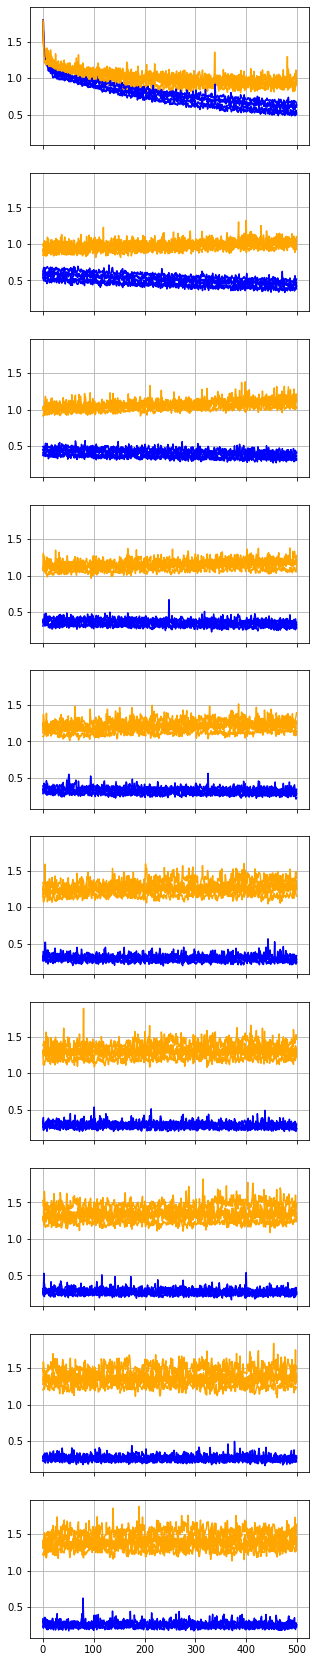

In [8]:
nb_metrics =  EPOCHS // EPOCHS_PER_METRICS

fig, axs = pl.subplots(nb_metrics, sharex=True, sharey=True)
fig.set_figheight(30)
fig.set_figwidth(5)

for i, history in enumerate(histories):
    current_history = i % nb_metrics
    axs[current_history].plot(histories[i].history['loss'], label='Training', color="blue")
    axs[current_history].plot(histories[i].history['val_loss'], label='Testing', color="orange")
    axs[current_history].grid()


metric  0 : 
------------

mean loss:  0.9464554122625171
mean accuracy:  0.6409440319166162
Precisions:  [0.82795699 0.8545985  0.43506494 0.41066601 0.55352709 0.4579194 ]
Recalls:  [0.5196319  0.9160632  0.70142379 0.76651376 0.57424242 0.74030303]
F-Score:  [0.63852243 0.88426404 0.5370311  0.53480557 0.5636945  0.56583671]

metric  1 : 
------------

mean loss:  1.0145035851934863
mean accuracy:  0.6682457989181839
Precisions:  [0.82343857 0.86482311 0.41801443 0.44311876 0.56359617 0.53958672]
Recalls:  [0.58883436 0.92132982 0.70351759 0.73256881 0.57939394 0.70424242]
F-Score:  [0.68665045 0.89218264 0.52442641 0.552213   0.57138588 0.61101617]

metric  2 : 
------------

mean loss:  1.1293453301556167
mean accuracy:  0.6790207708299956
Precisions:  [0.82044085 0.86520181 0.44423542 0.45341615 0.56426644 0.57256858]
Recalls:  [0.60969325 0.91375905 0.69221106 0.73669725 0.6019697  0.69575758]
F-Score:  [0.69953894 0.88881774 0.54116877 0.56134219 0.58250861 0.62818057]

metric

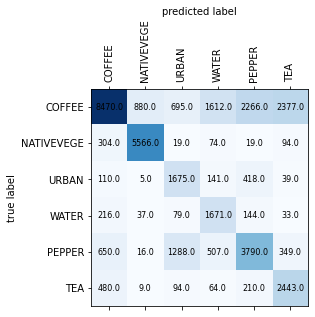

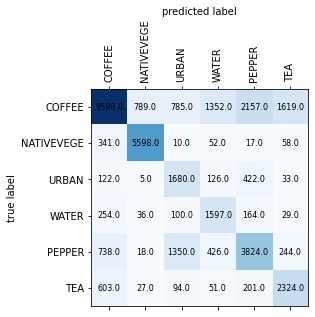

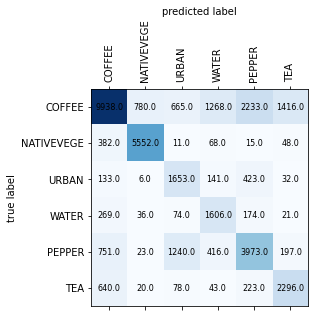

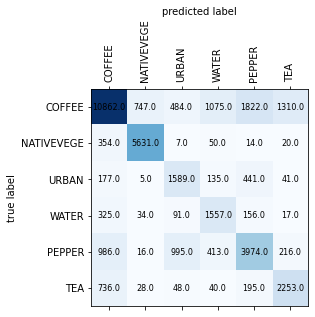

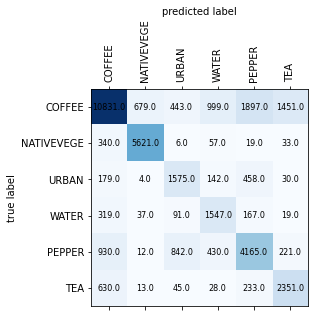

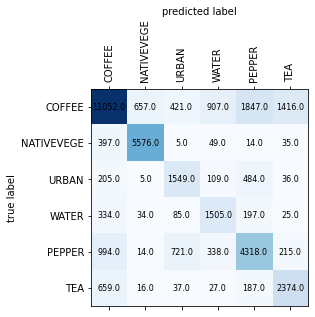

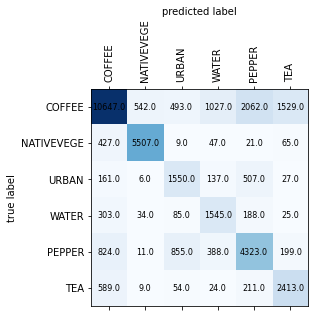

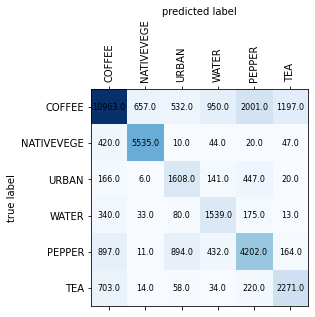

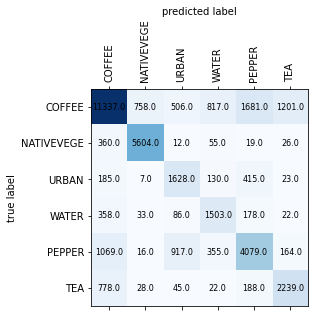

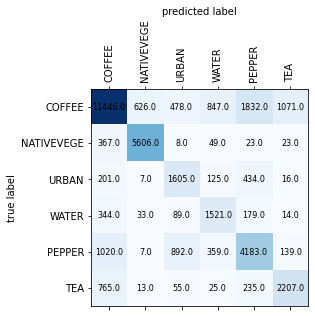

In [9]:
nb_metrics =  EPOCHS // EPOCHS_PER_METRICS

for metric in range(nb_metrics):
    pl.figure(metric)
    plot_confusion_matrix(conf_matrices[metric], labels)
    recall, precision, fscore = recall_precision_fscore_from_confusion_matrix(conf_matrices[metric])

    print("\nmetric ", metric, ": ")
    print("------------\n")
    print("mean loss: ", mean_losses[metric])
    print("mean accuracy: ", mean_accuracies[metric])    
    print("Precisions: ", precision)
    print("Recalls: ", recall)
    print("F-Score: ", fscore)